In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

model_directory = './job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#get tukey results
tukey_dict = tukey_multi_metrics(gather_df, col_indices=col_indices)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
#setup comparison matrix and overlaps
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, tukey_analysis_dict, mean_w=0, median_w=0, tukey_w=100)
overlapping_models = get_overlap(agg_comp_dict, N=1)

/home/sliu426/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1730: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
/usr/local/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:780: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


In [3]:
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

gather_df

ROC AUC Keck_Pria_AS_Retest  \
model                       set           fold                                        
RandomForest_c              train_metrics fold 0                           1.000000   
                                          fold 1                           1.000000   
                                          fold 2                           1.000000   
                                          fold 3                           1.000000   
                                          fold 4                           1.000000   
                                          Folds Mean                       1.000000   
                                          Folds Median                     1.000000   
                            test_metrics  fold 0                           0.866549   
                                          fold 1                           0.916986   
                                          fold 2                           0.960439   
                                          fold 3                           0.941003   
                                          fold 4                           0.820920   
                                          Folds Mean                       0.901179   
                                          Folds Median                     0.916986   
RandomForest_h              train_metrics fold 0                           1.000000   
                                          fold 1                           1.000000   
                                          fold 2                           1.000000   
                                          fold 3                           1.000000   
                                          fold 4                           1.000000   
                                          Folds Mean                       1.000000   
                                          Folds Median                     1.000000   
                            test_metrics  fold 0                           0.836690   
                                          fold 1                           0.894237   
                                          fold 2                           0.836346   
                                          fold 3                           0.908211   
                                          fold 4                           0.731993   
                                          Folds Mean                       0.841495   
                                          Folds Median                     0.836690   
RandomForest_b              train_metrics fold 0                           1.000000   
                                          fold 1                           1.000000   
...                                                                             ...   
Docking_ad4                 val_metrics   Folds Mean                       0.347340   
                                          Folds Median                     0.370328   
                            test_metrics  fold 0                           0.417773   
                                          fold 1                           0.299700   
                                          fold 2                           0.270545   
                                          fold 3                           0.378352   
                                          fold 4                           0.370328   
                                          Folds Mean                       0.347340   
                                          Folds Median                     0.370328   
ConsensusDocking_rocauc_opt train_metrics fold 0                           0.356835   
                                          fold 1                           0.419315   
                                          fold 2                           0.420418   
                                          fold 3                           0.402279   
                                          fold 4      

---
## Uninversal Confidence Intervals

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


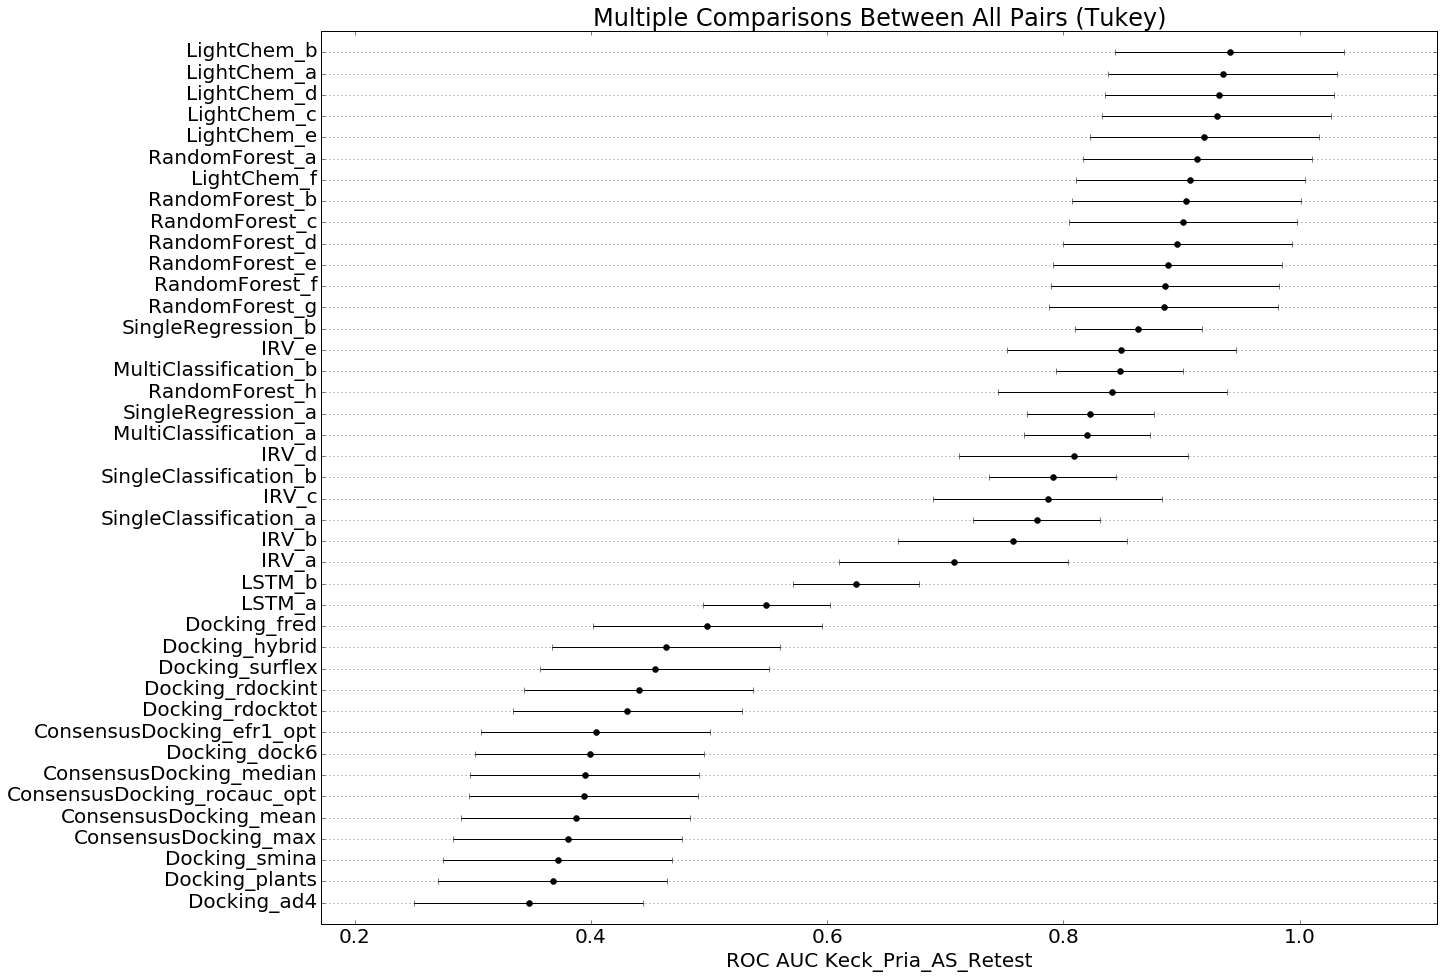

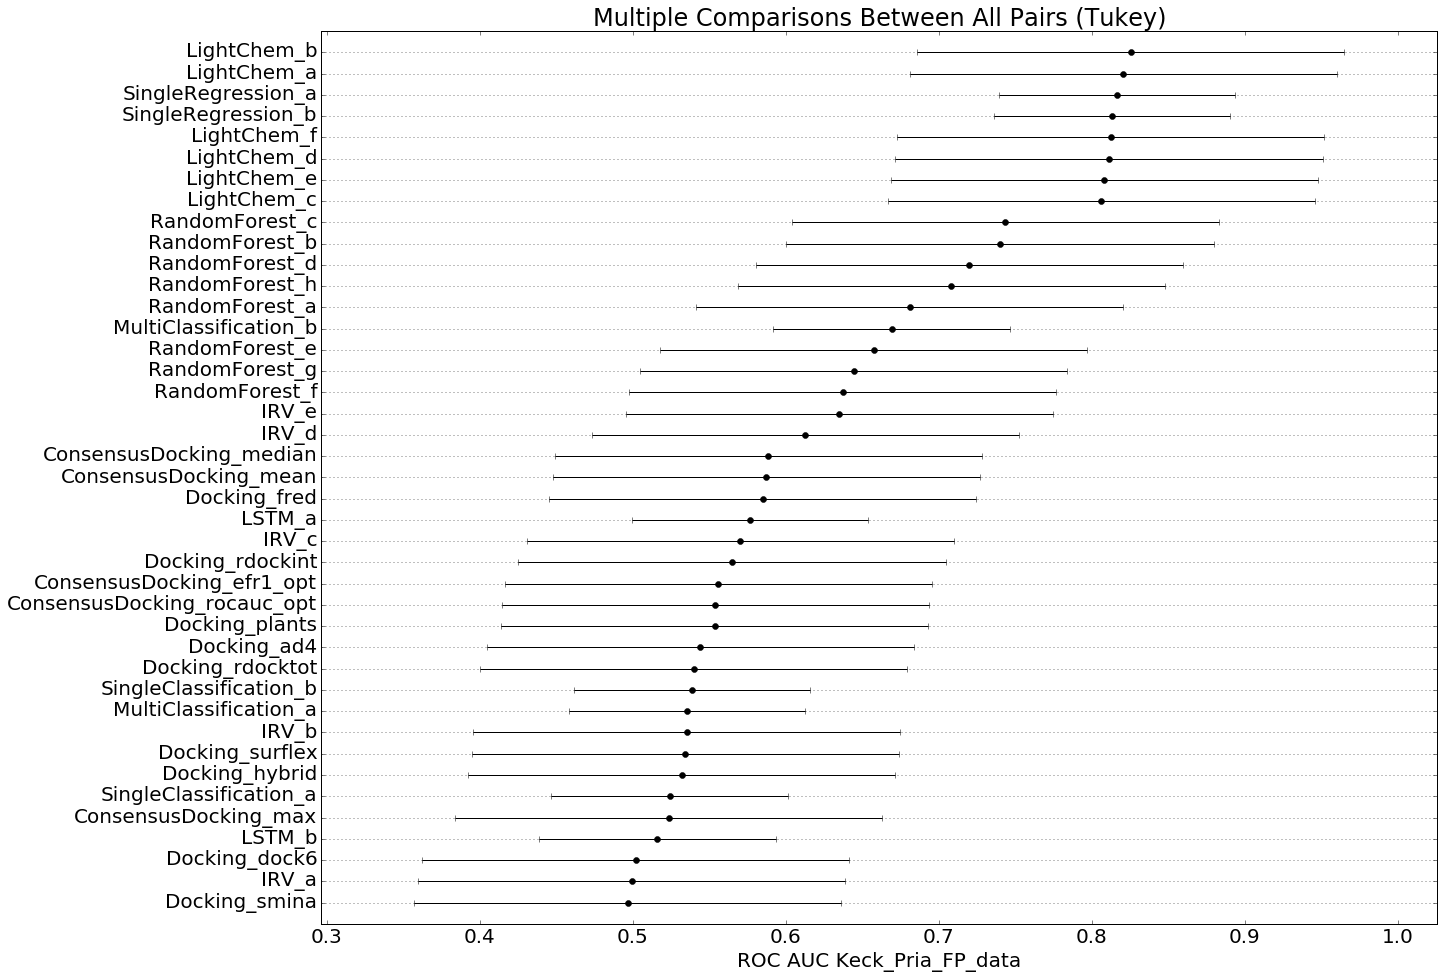

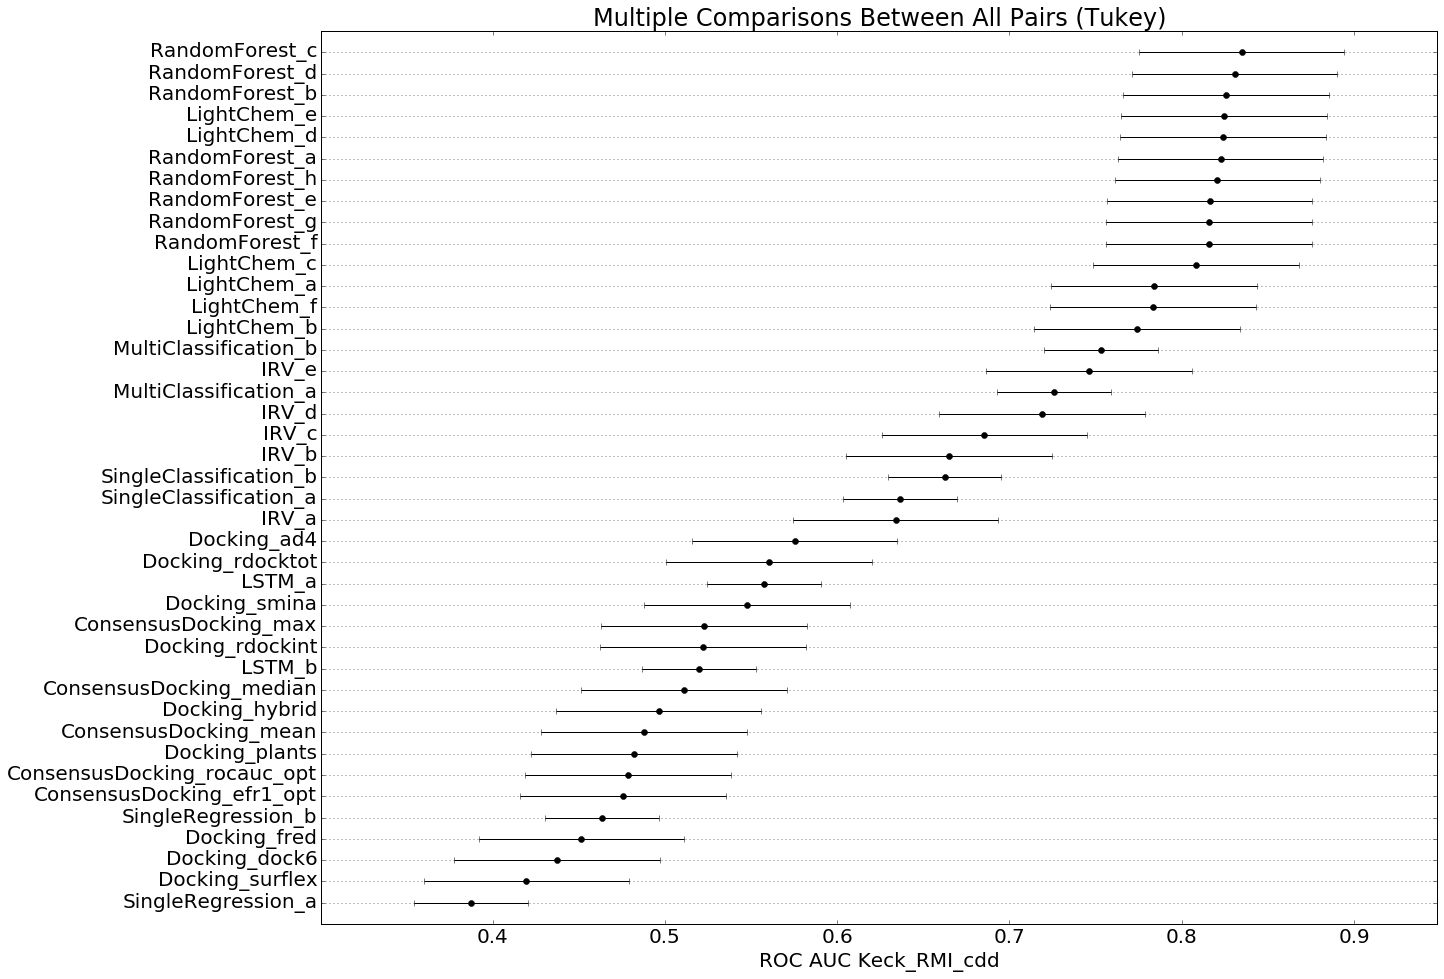

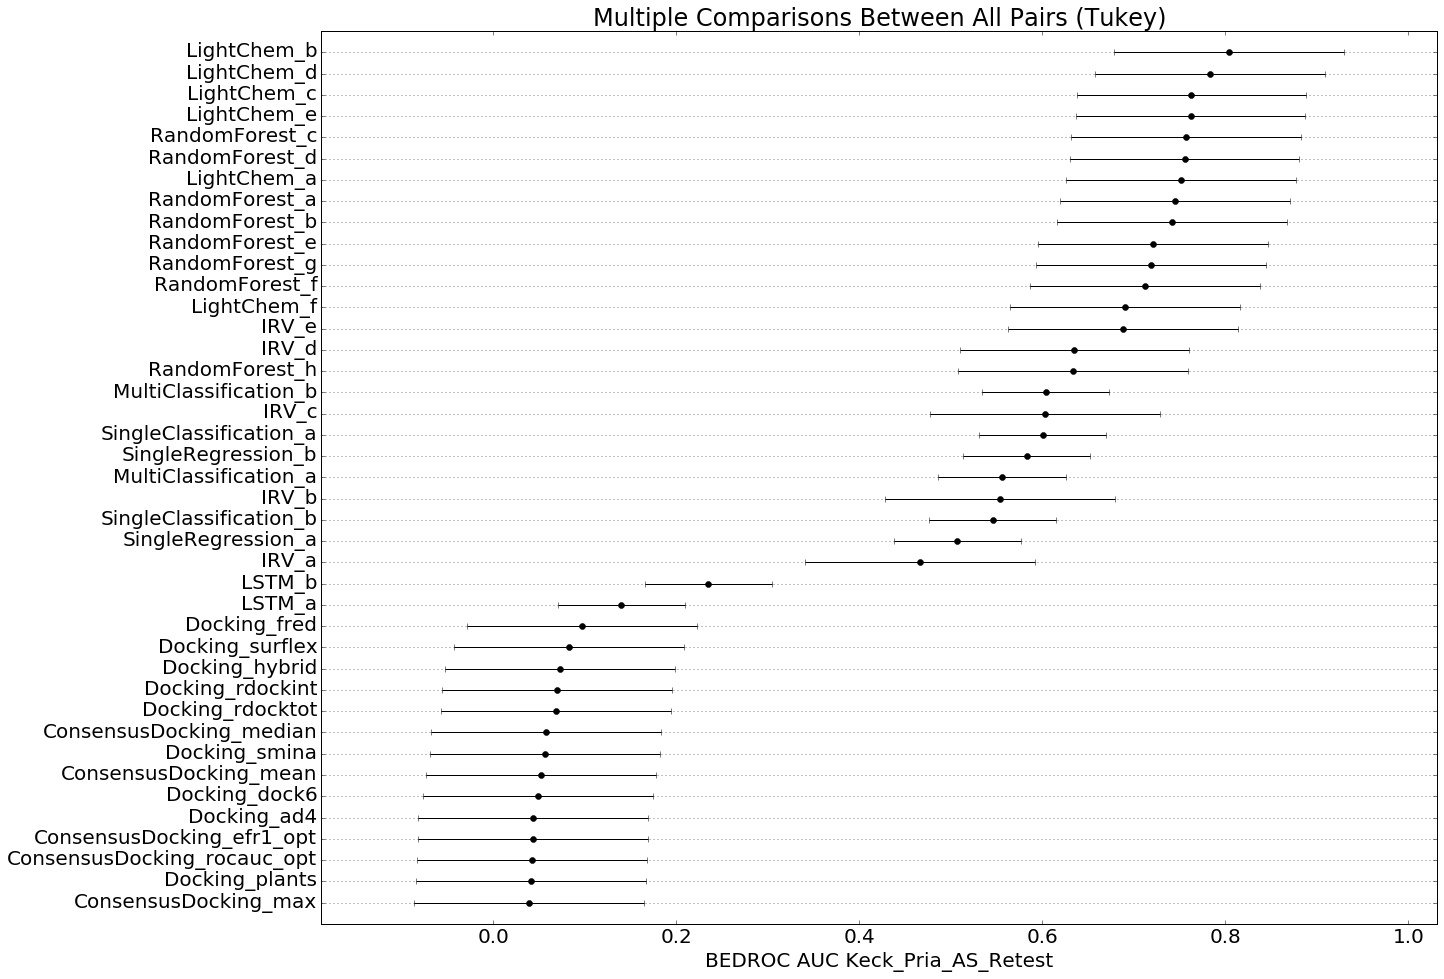

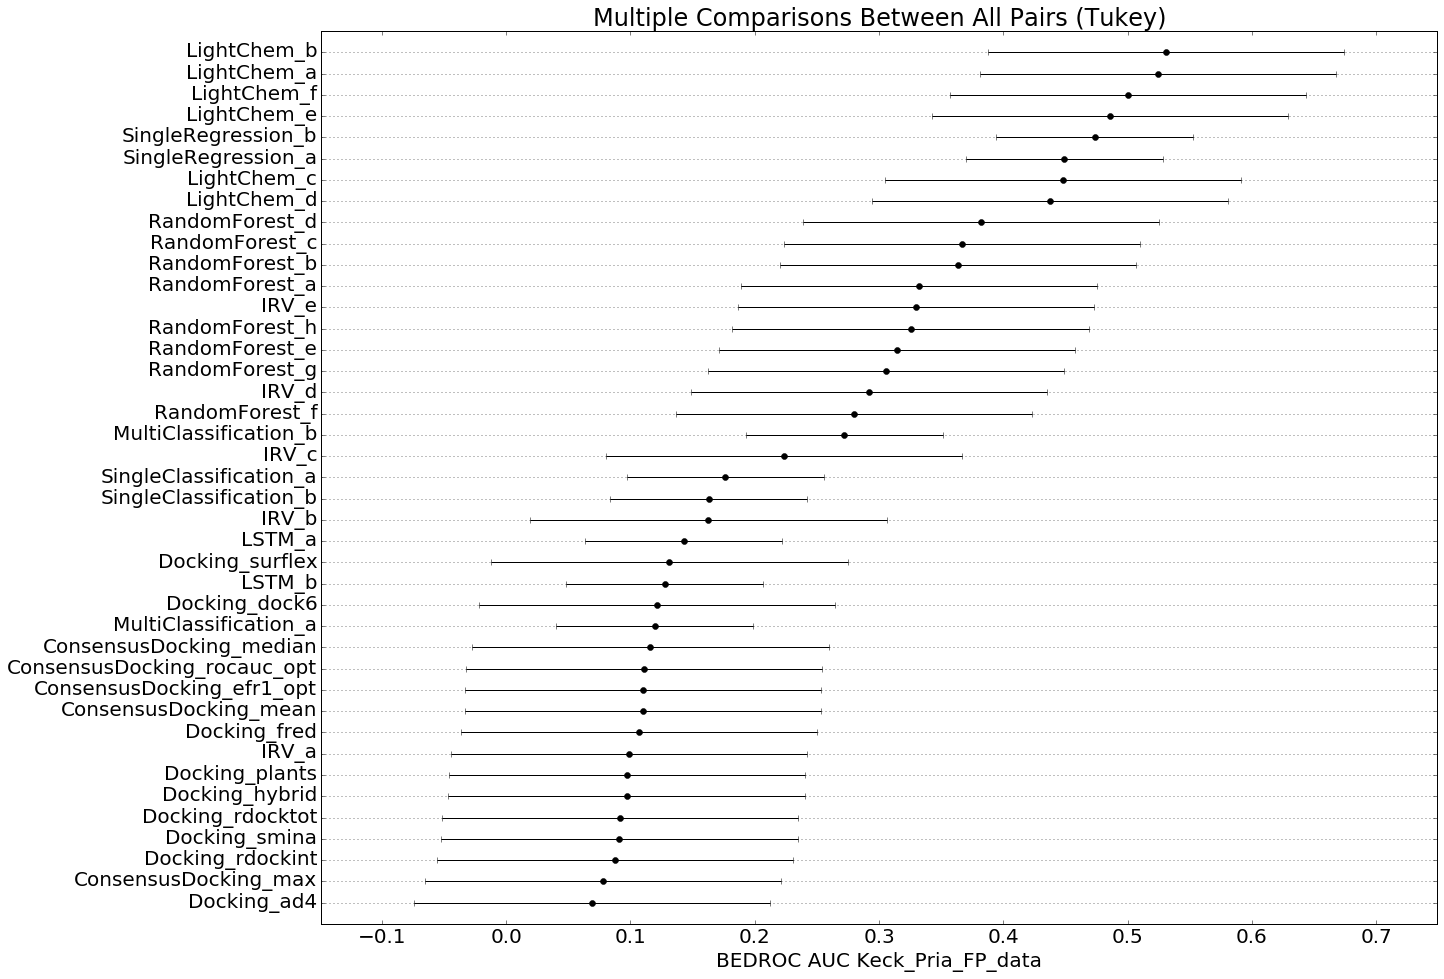

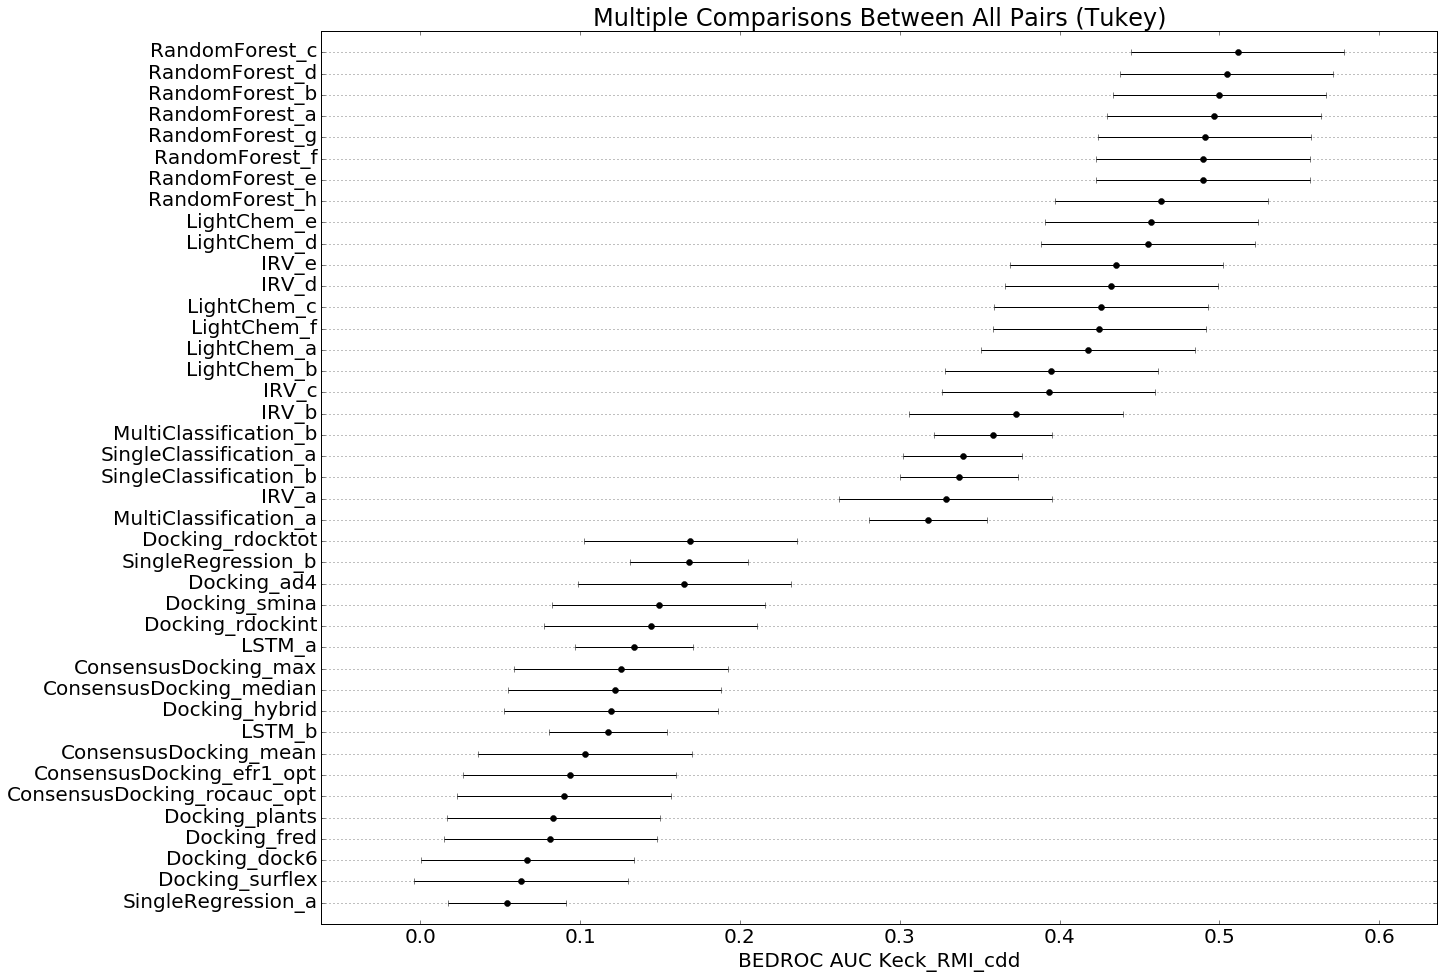

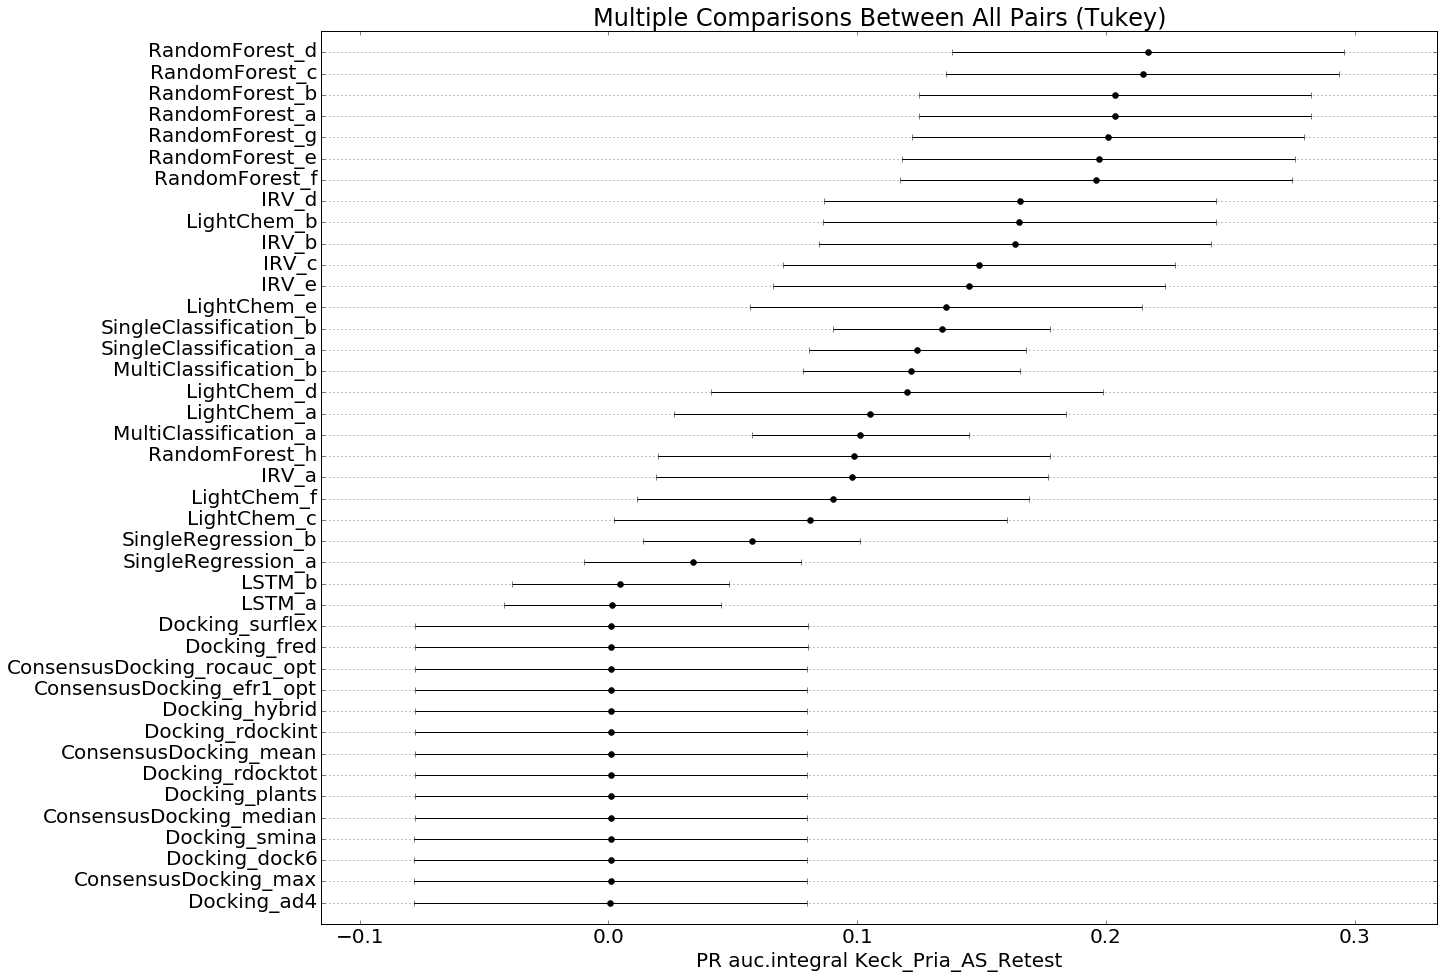

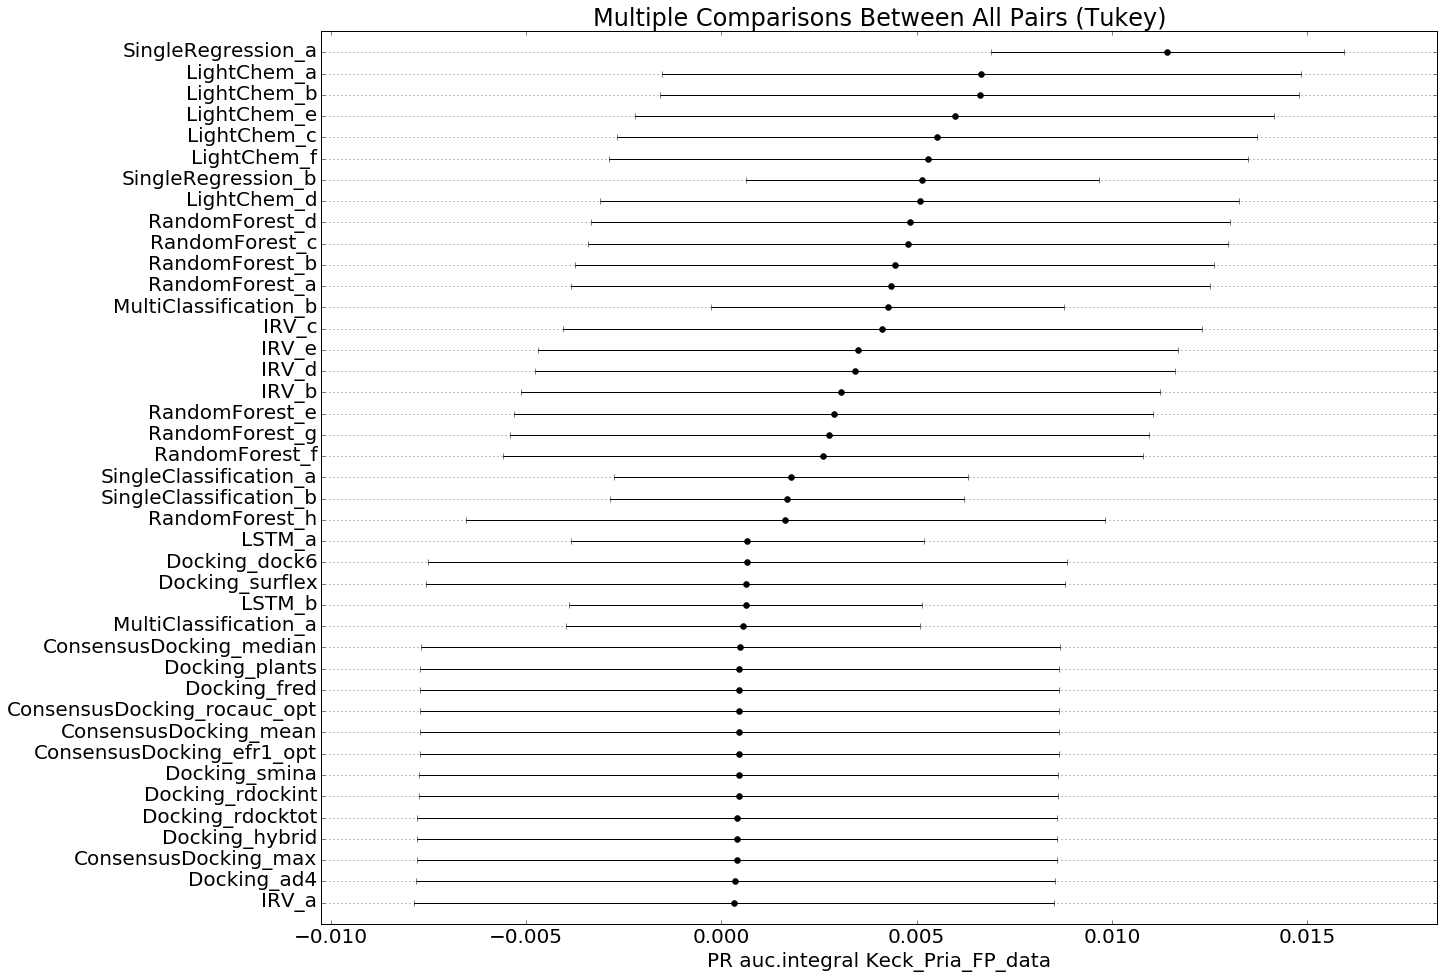

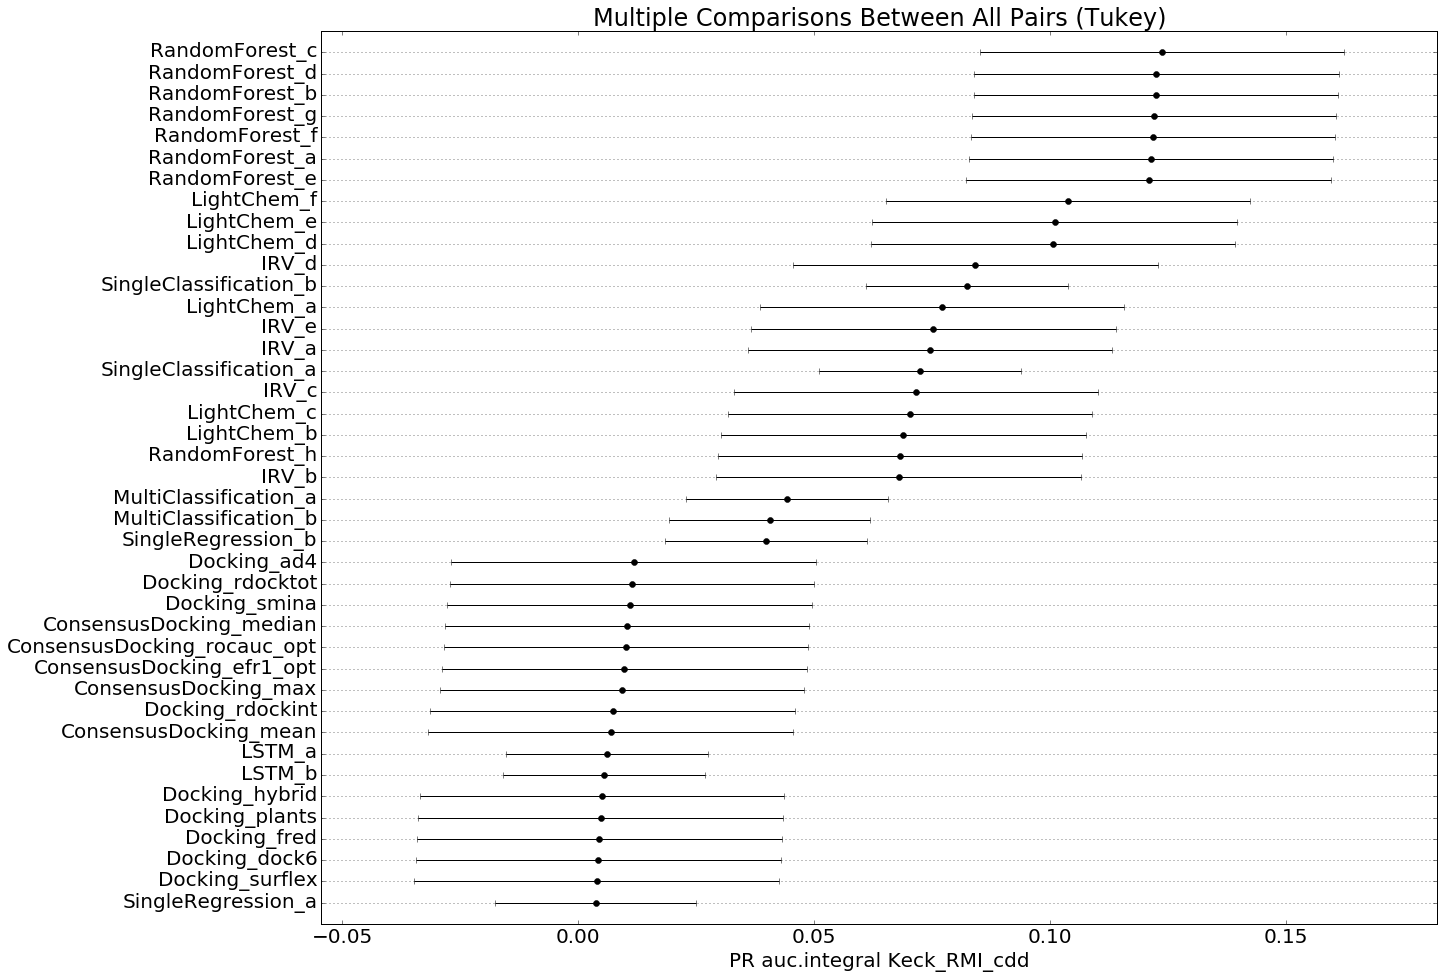

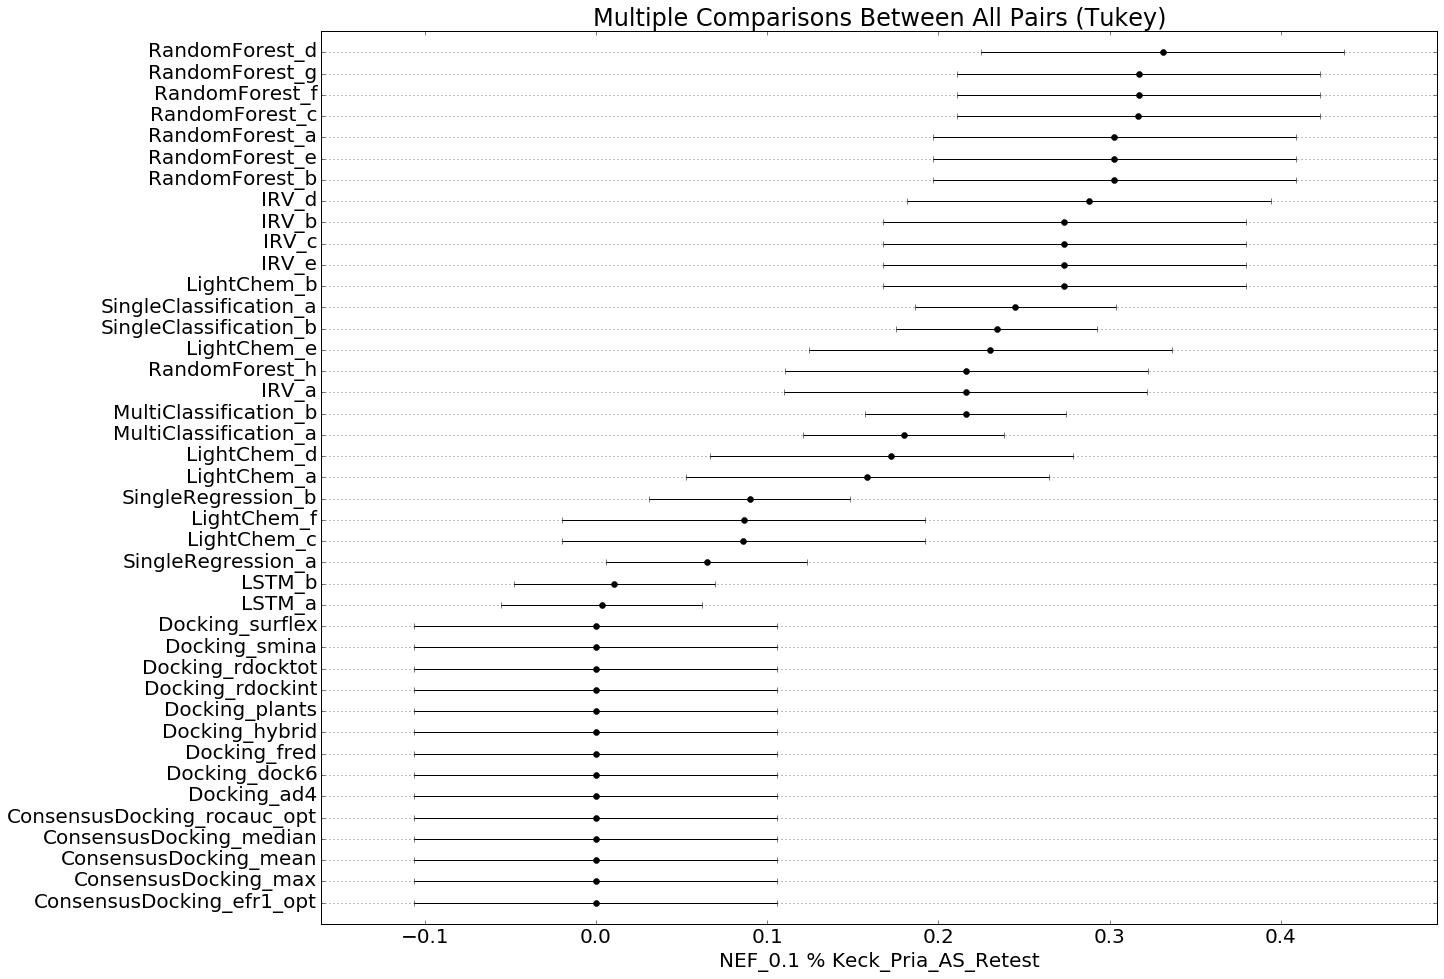

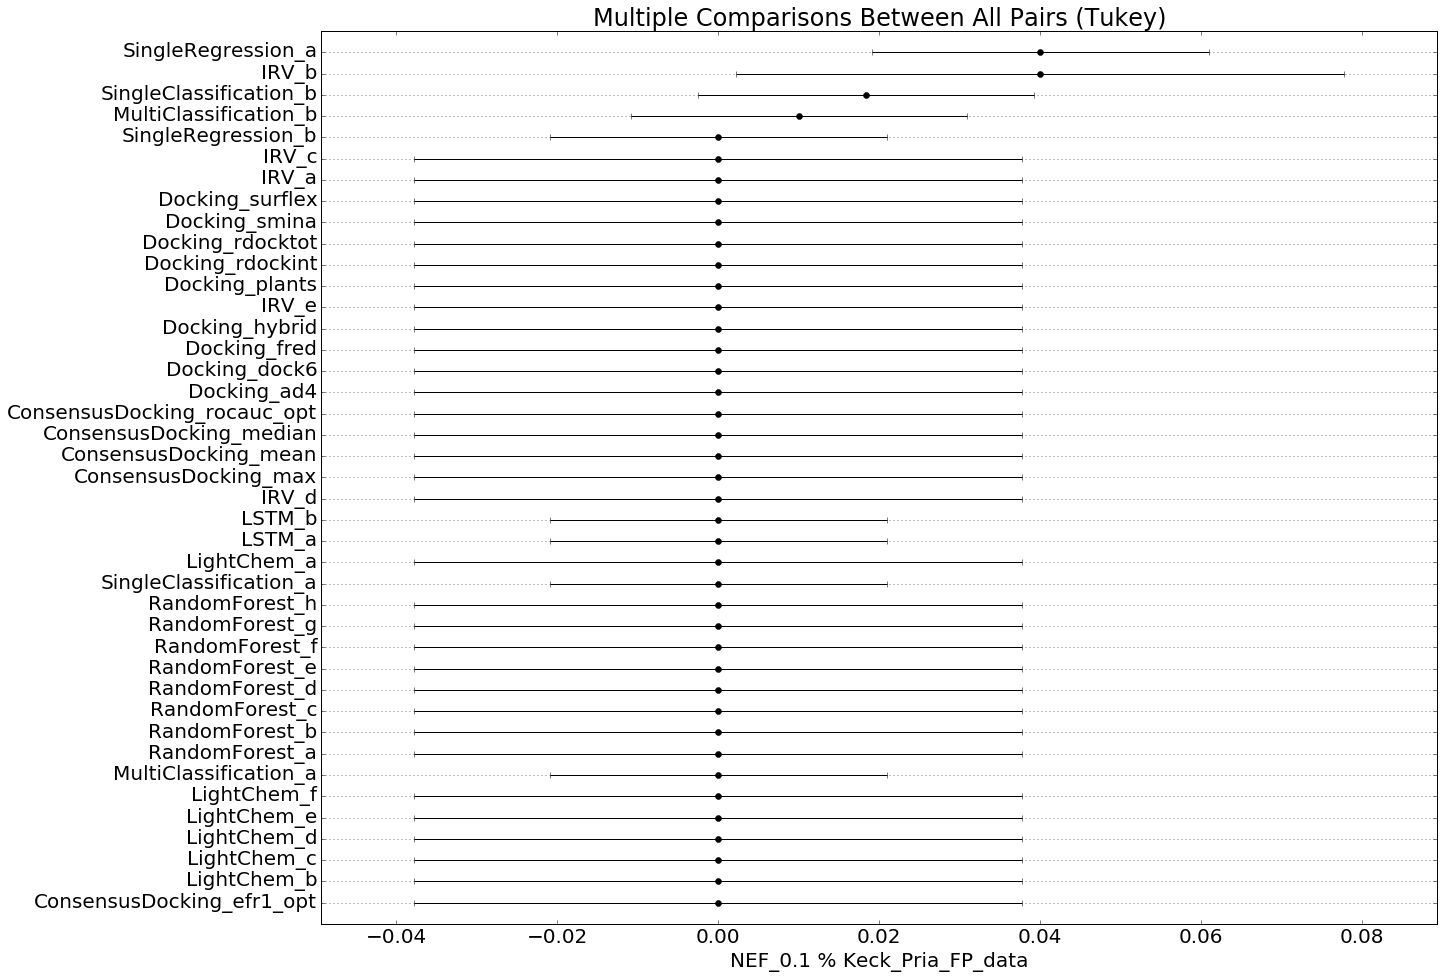

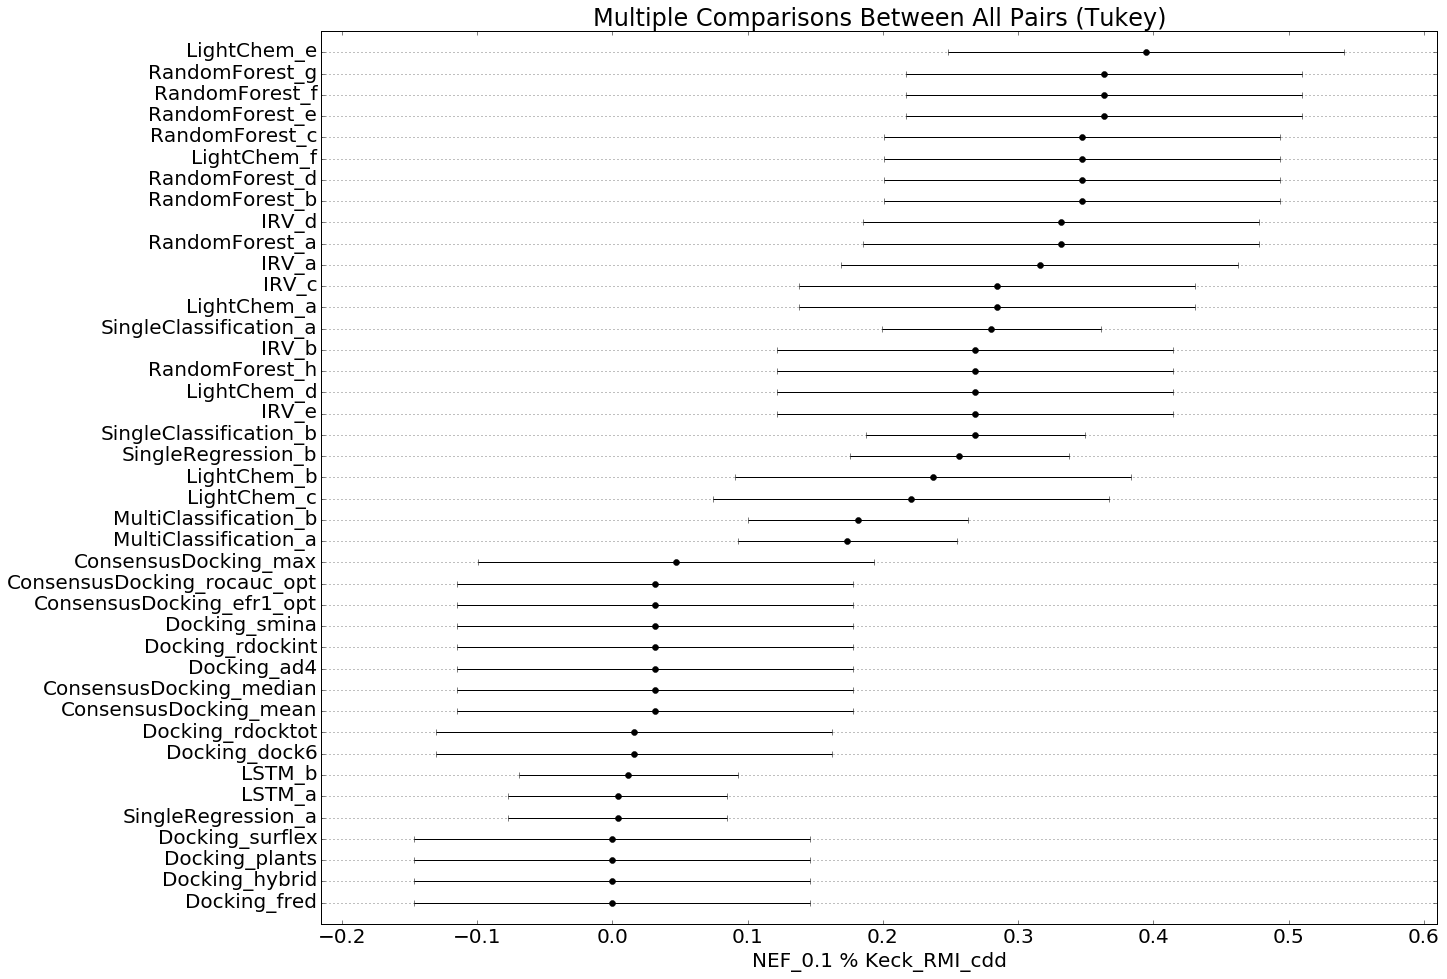

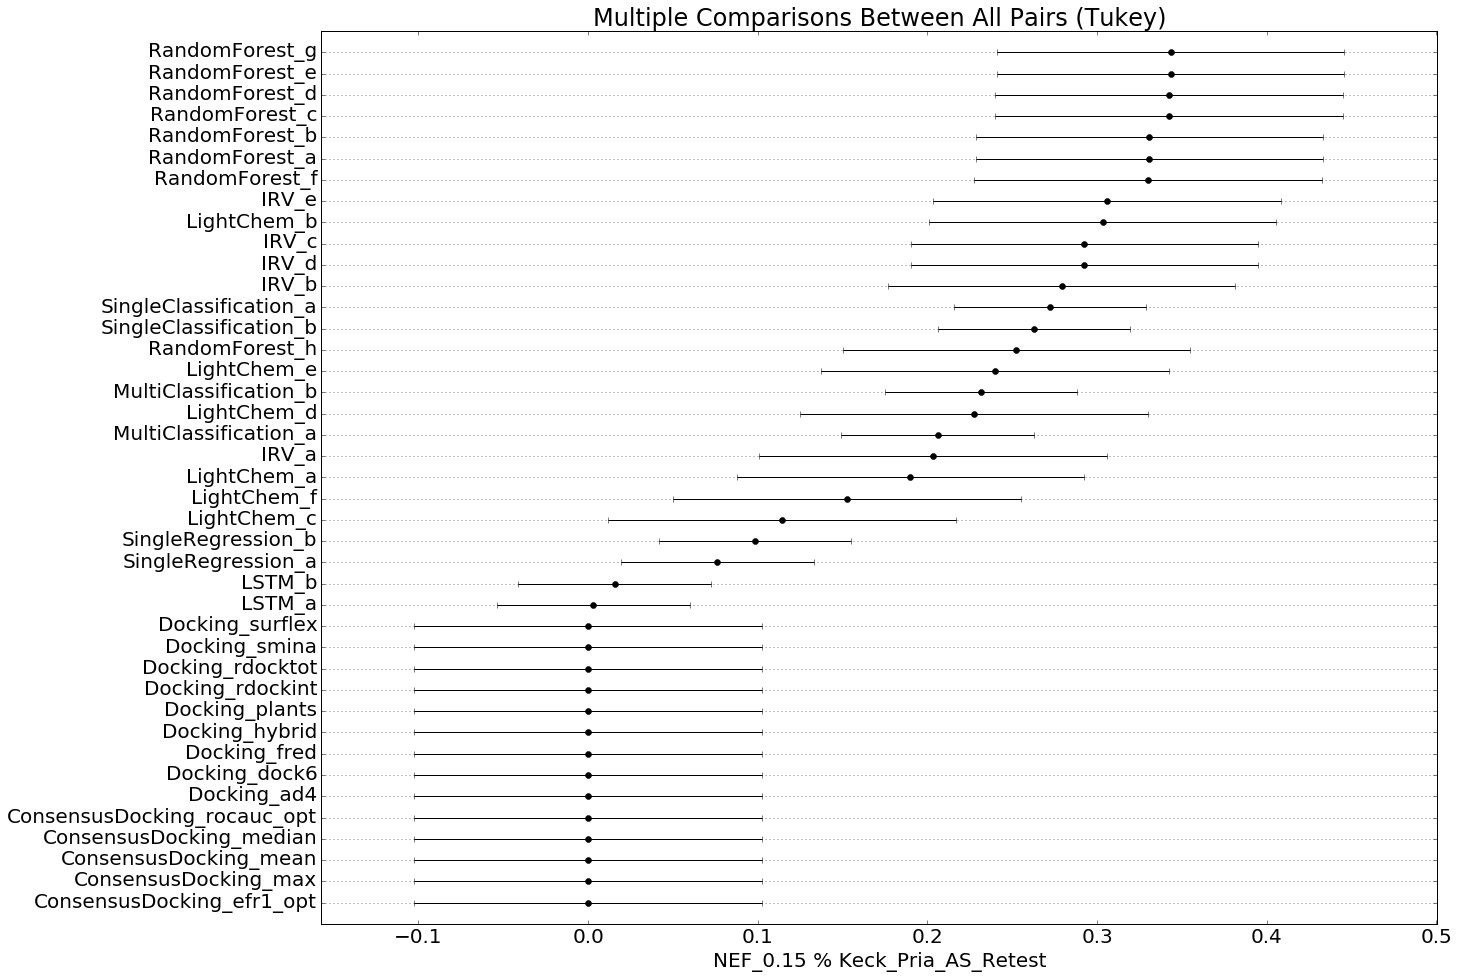

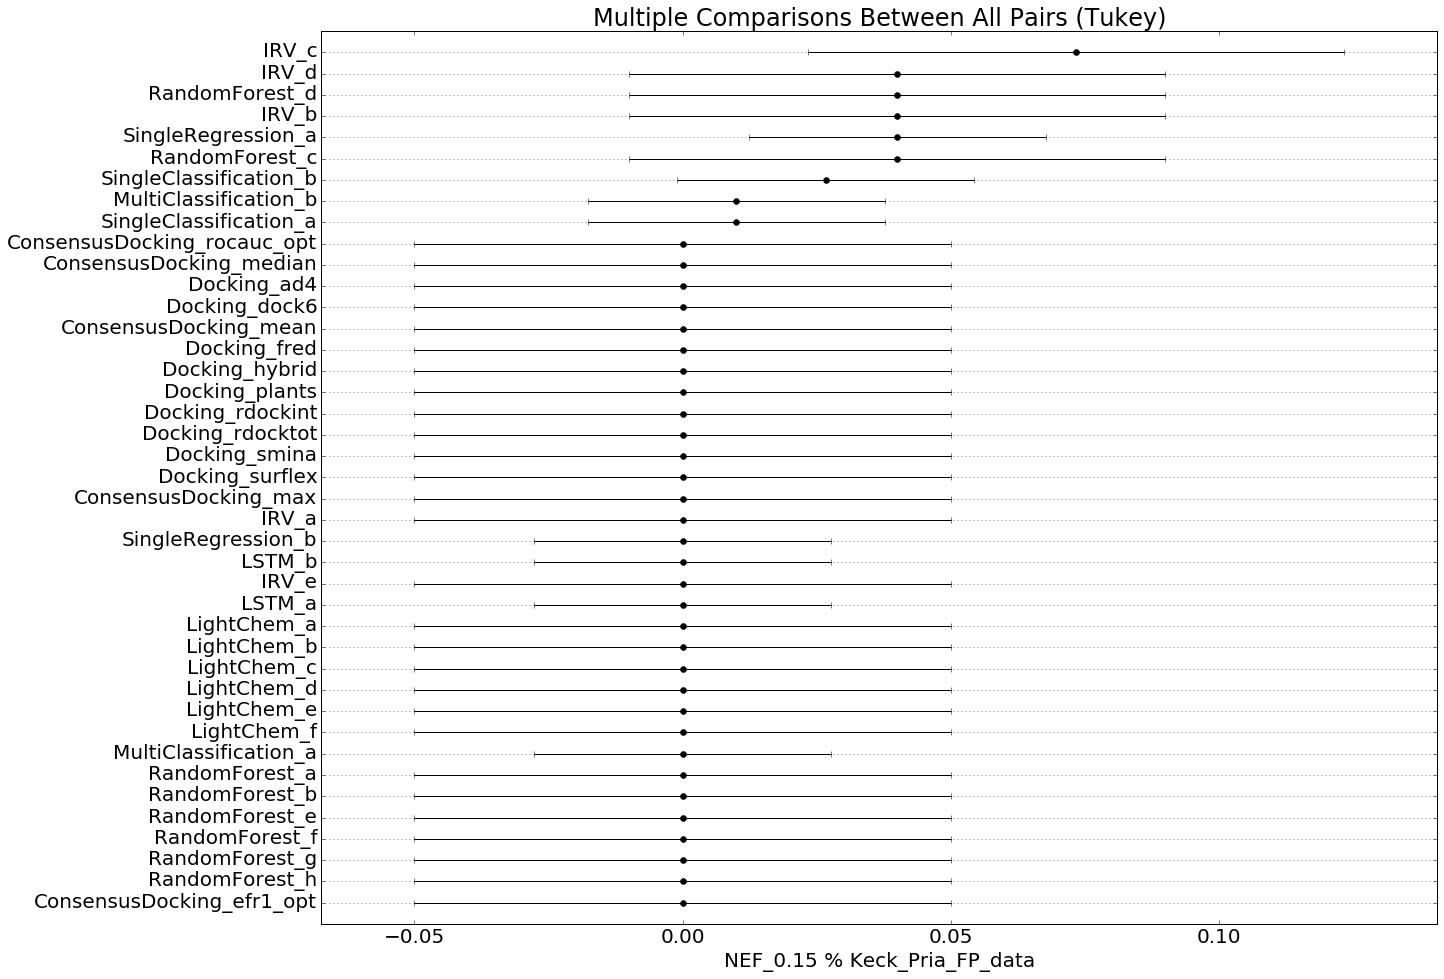

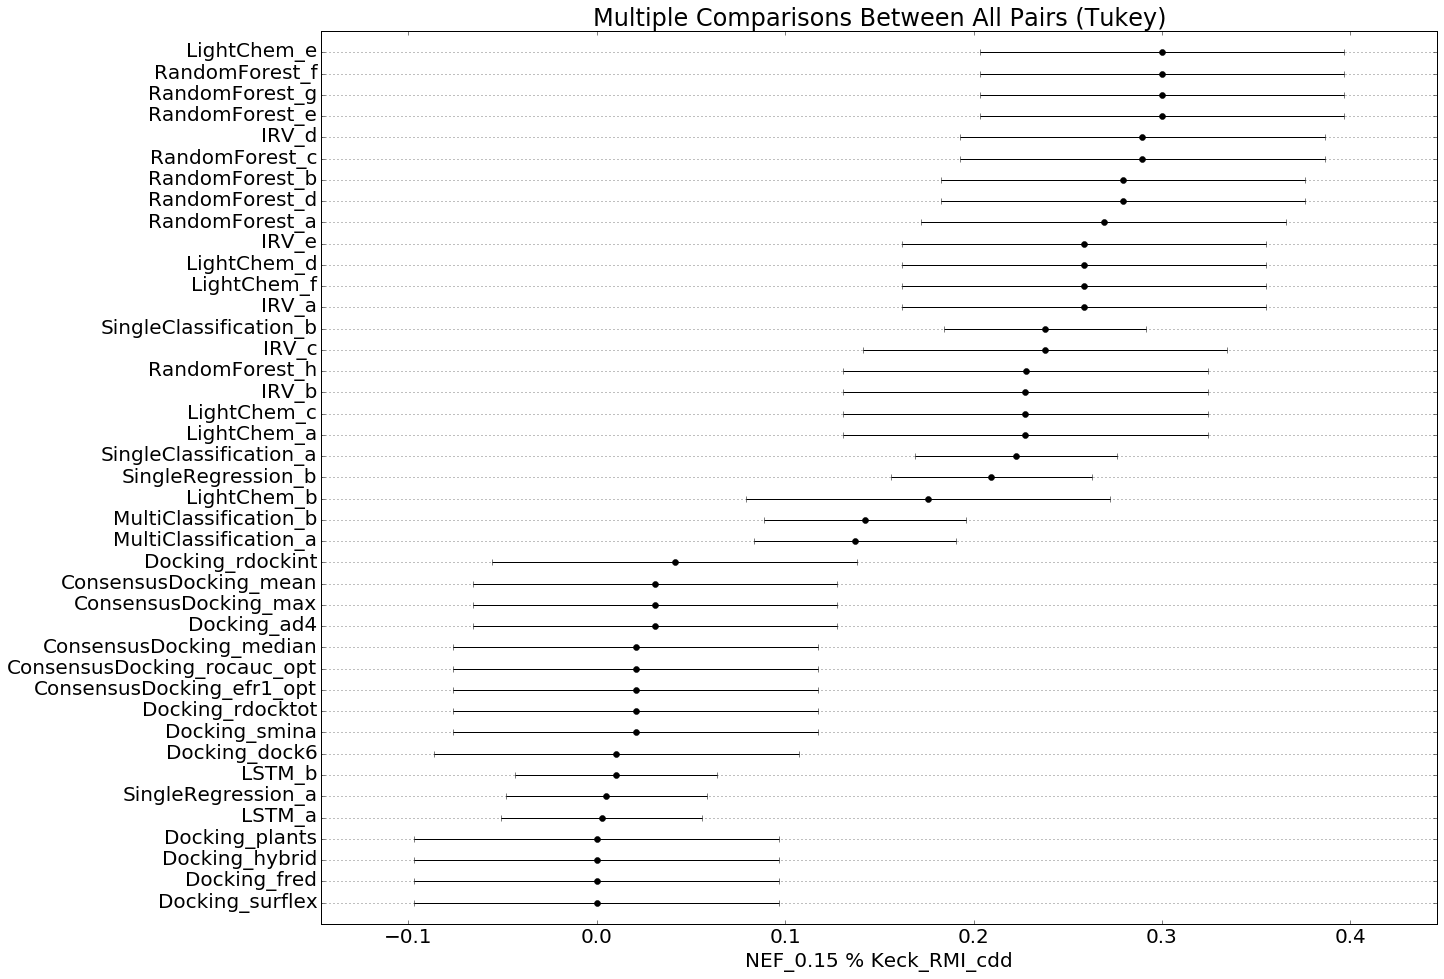

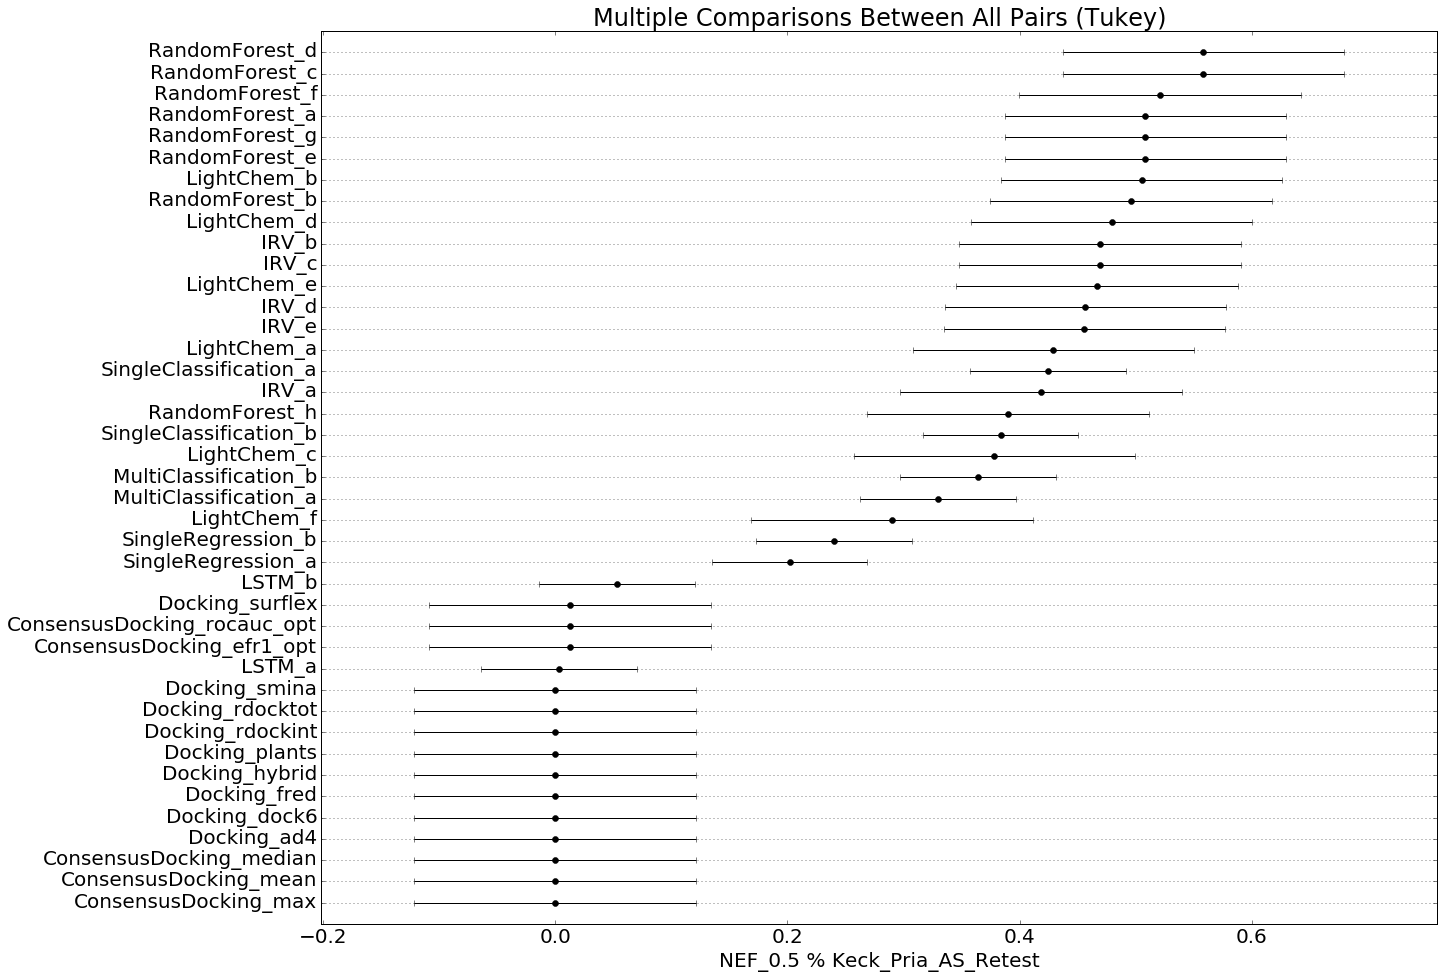

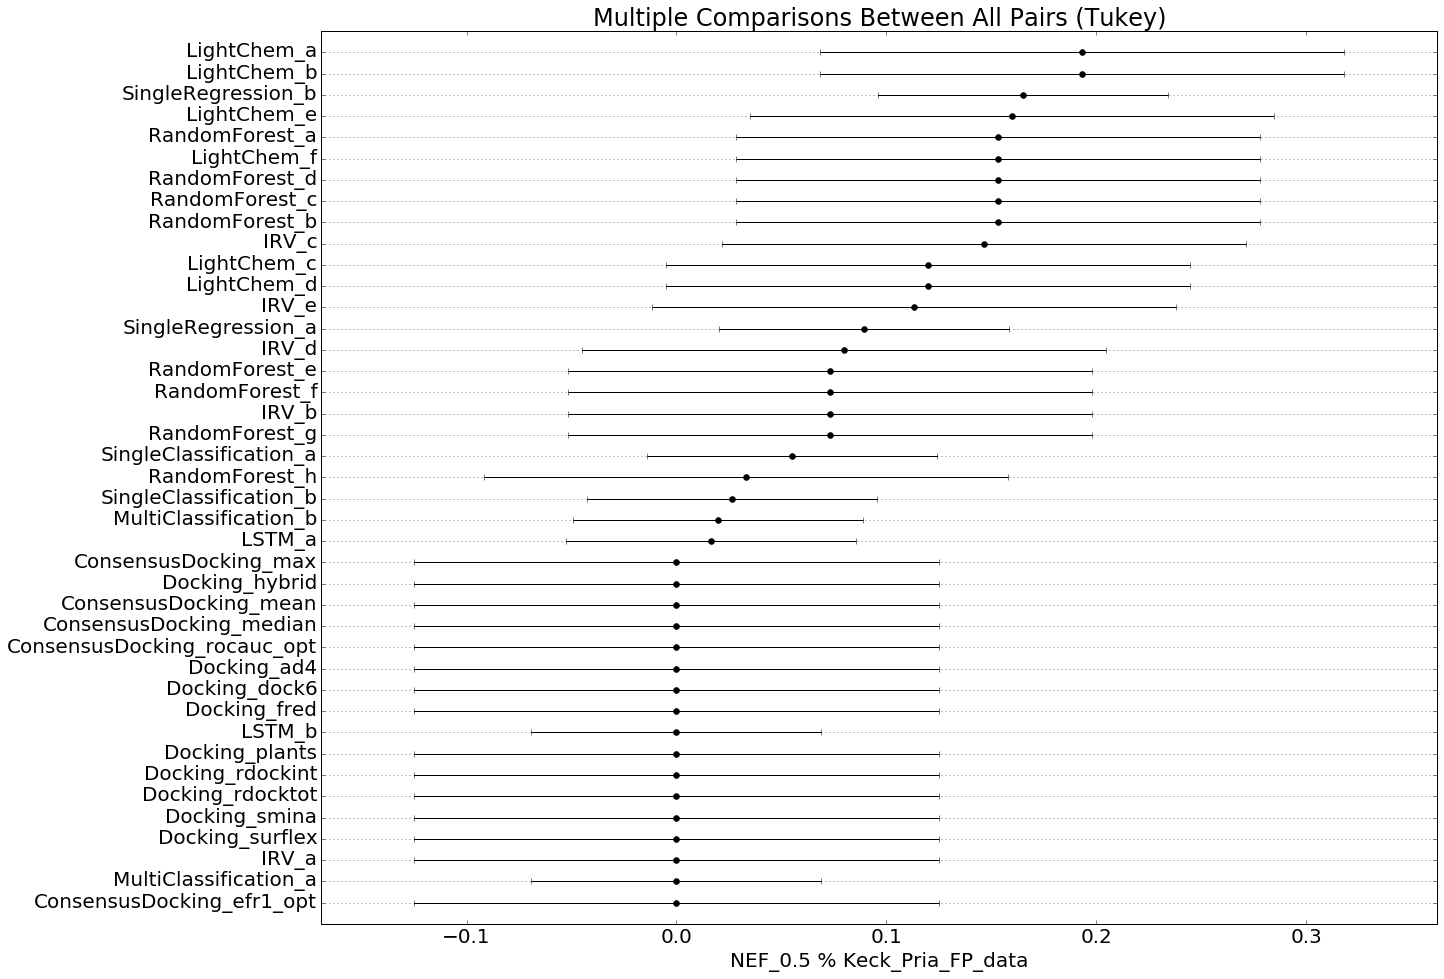

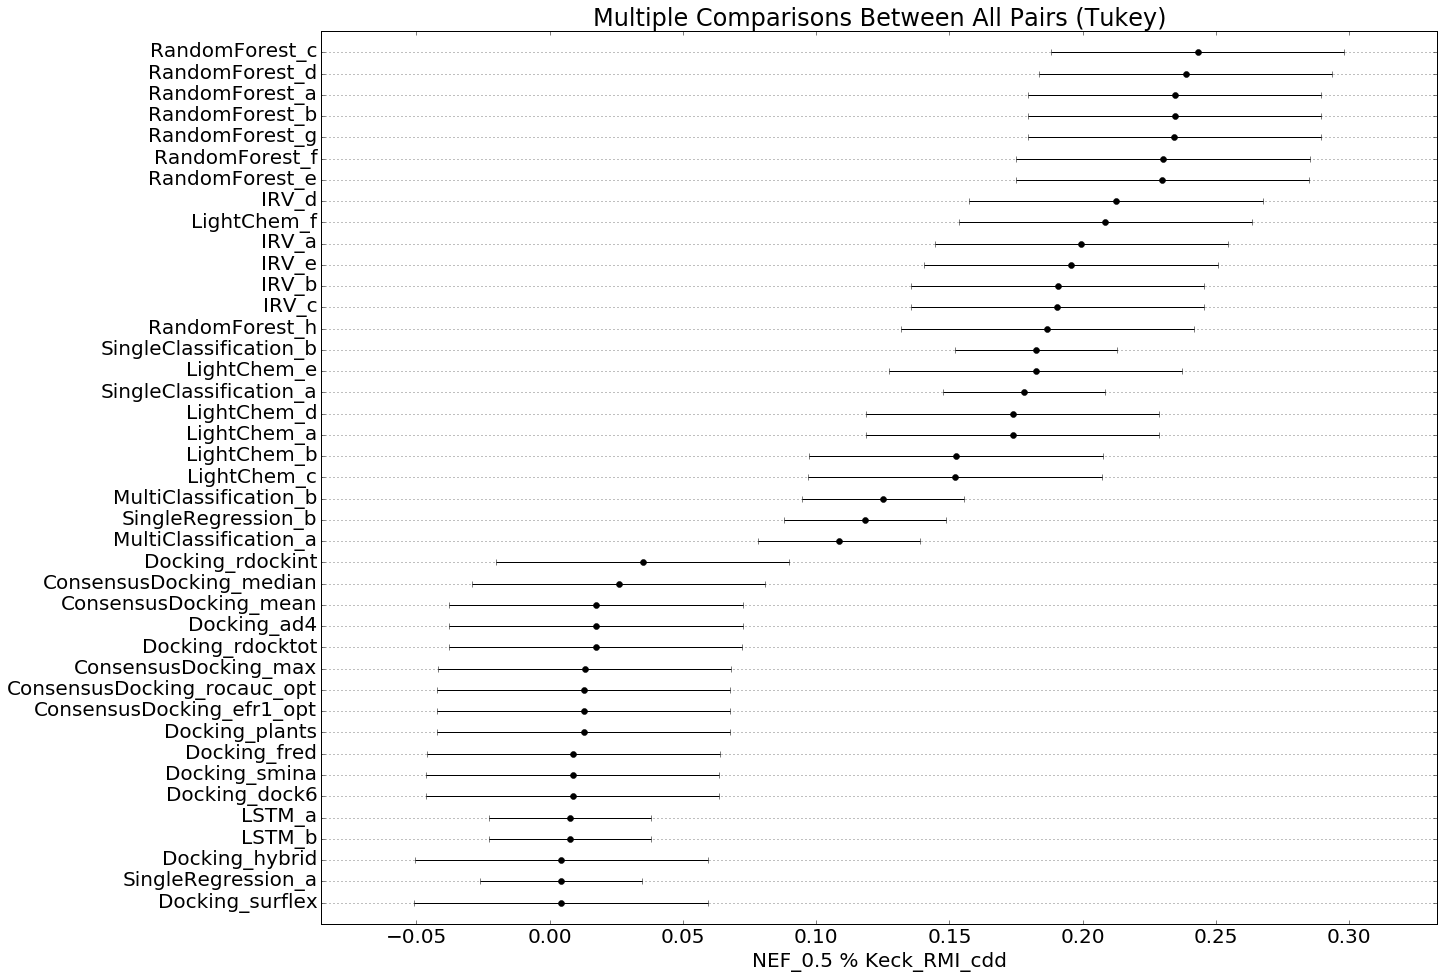

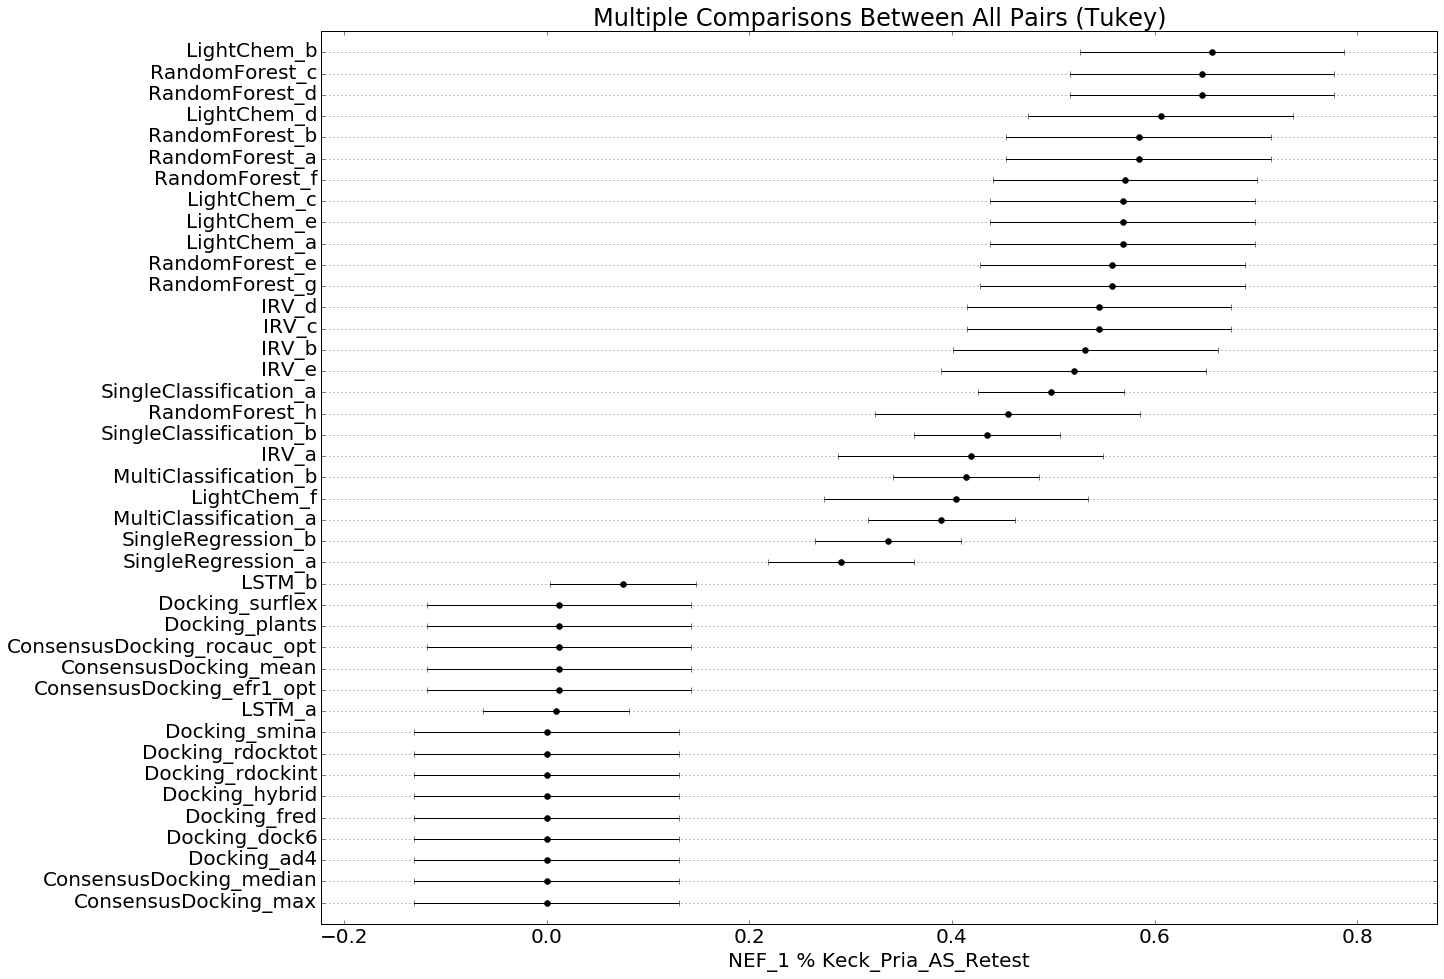

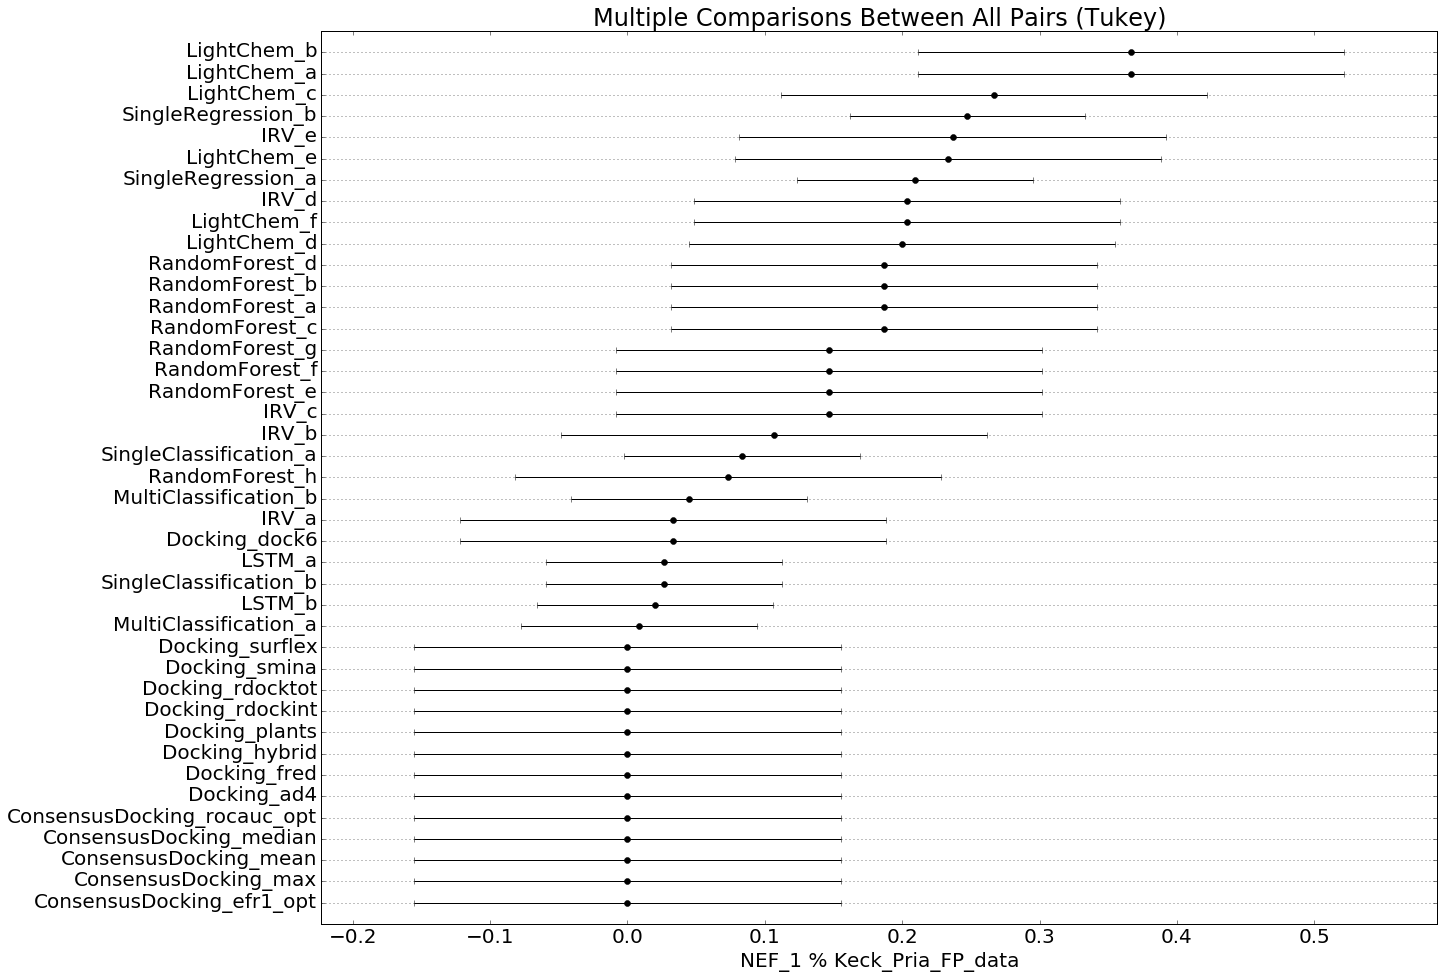

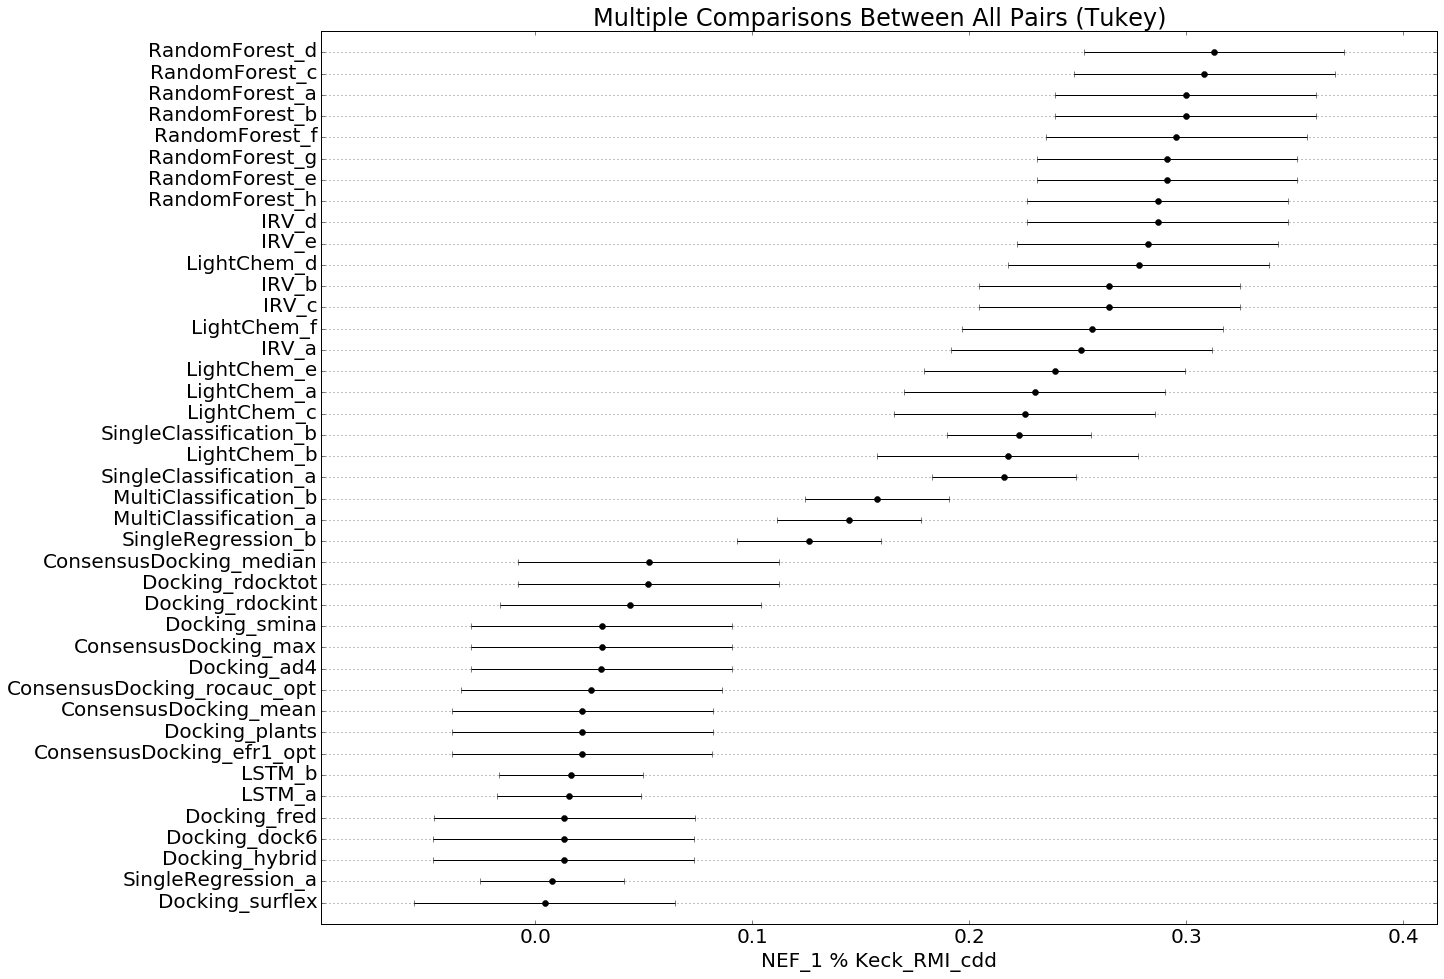

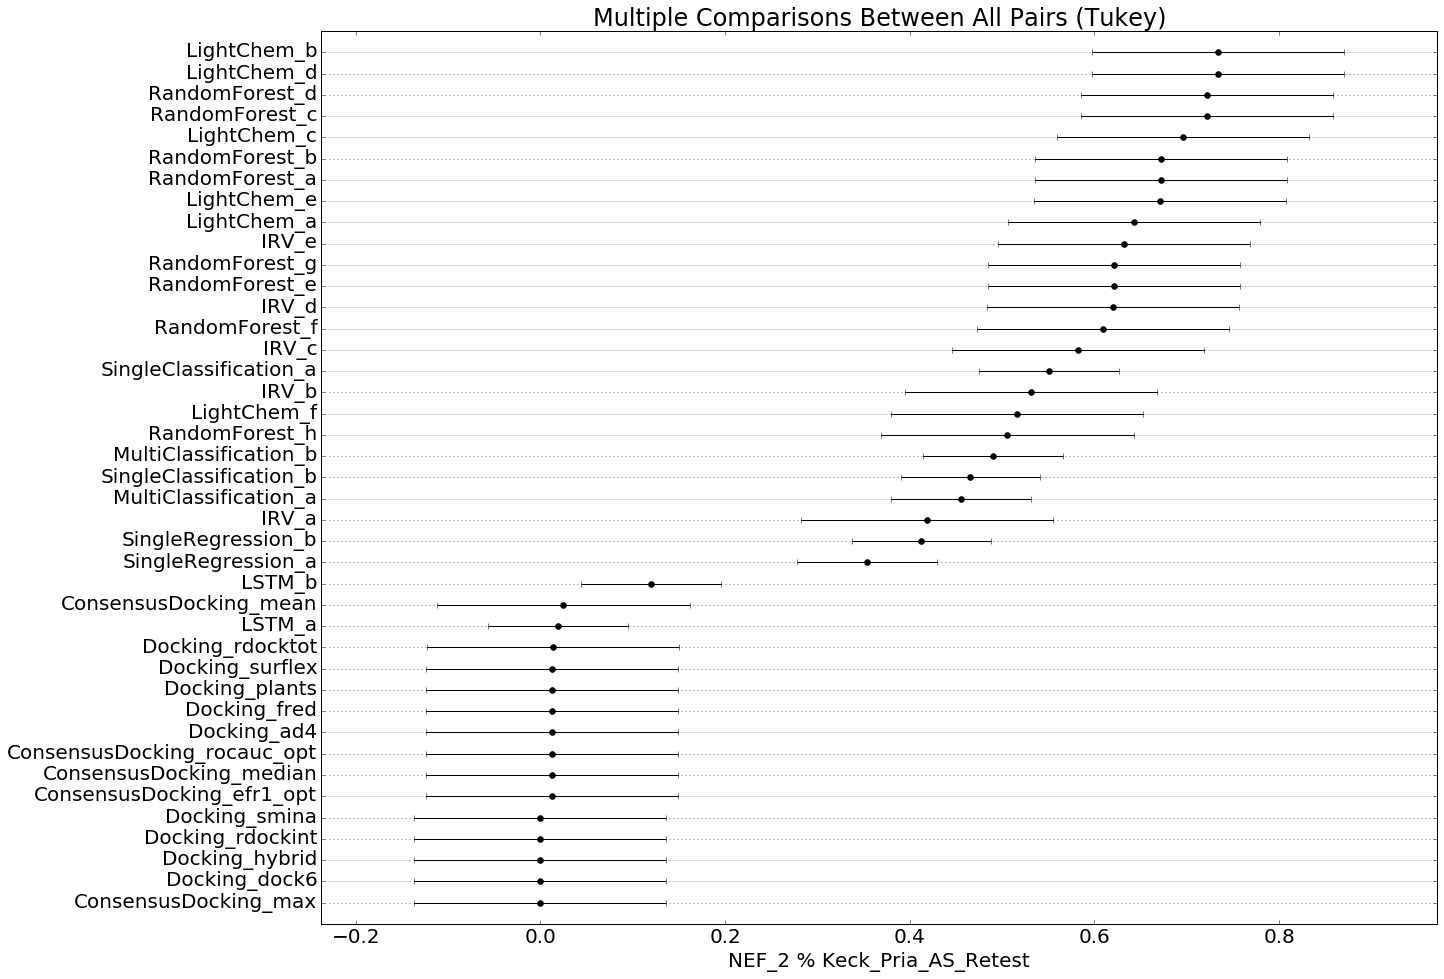

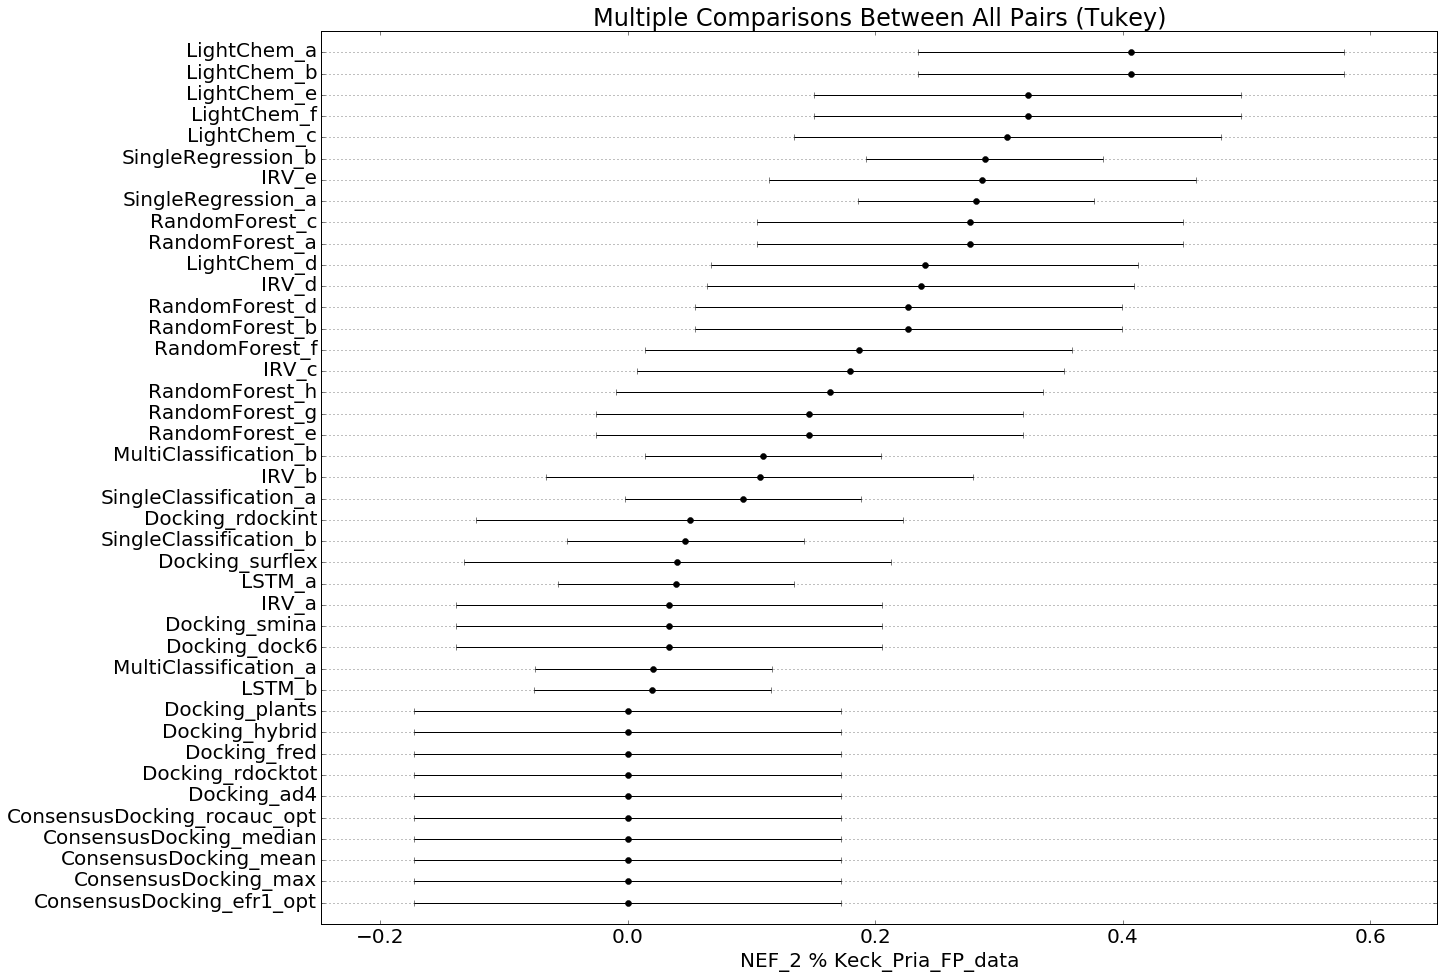

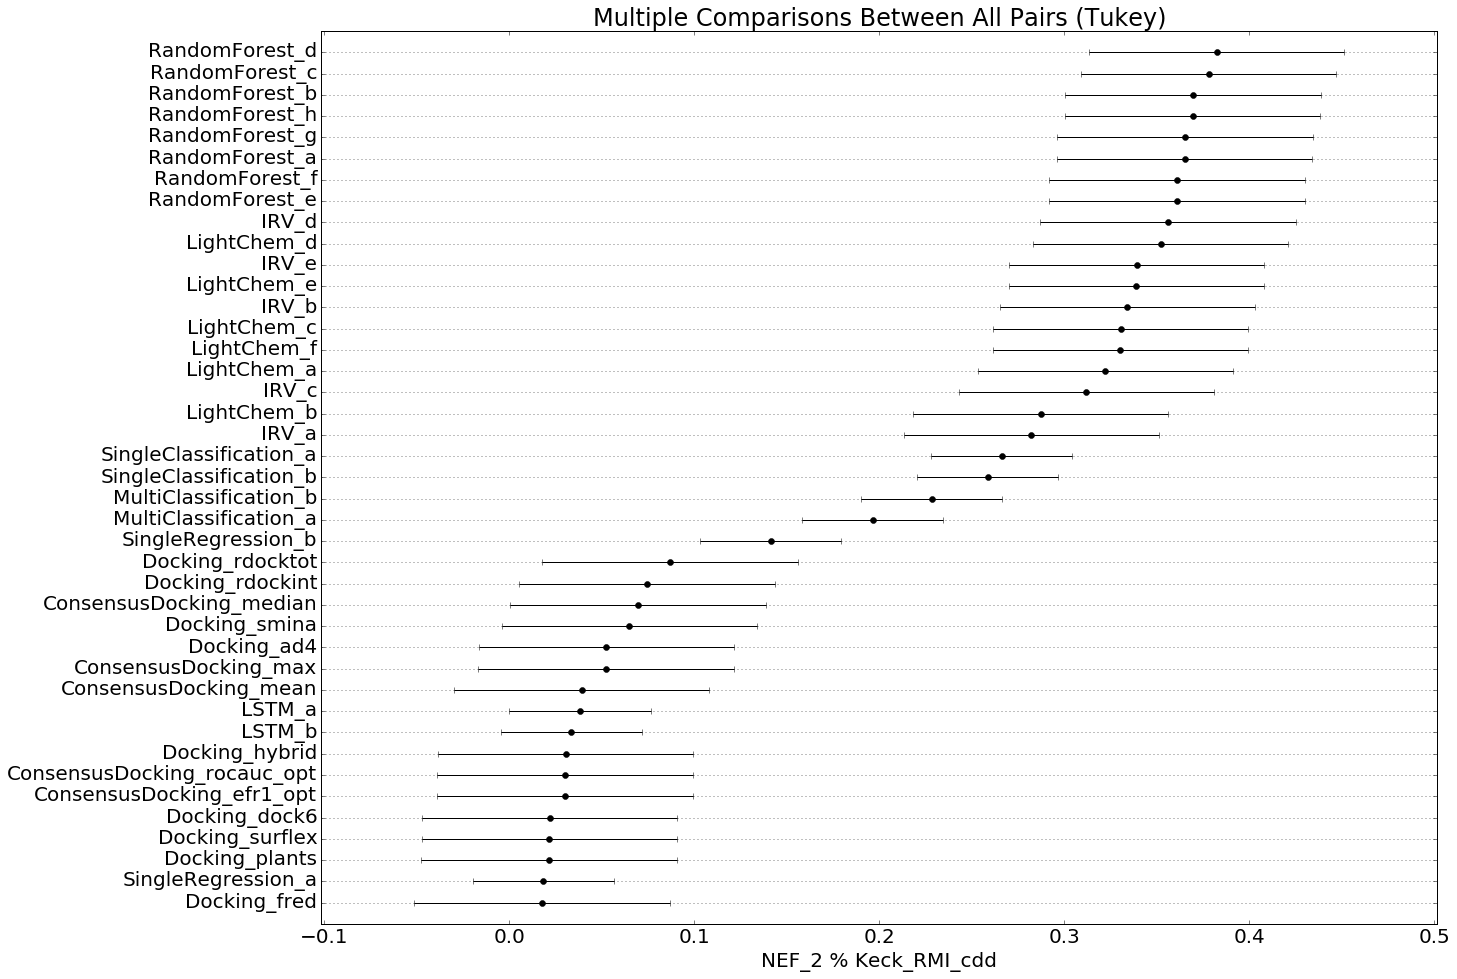

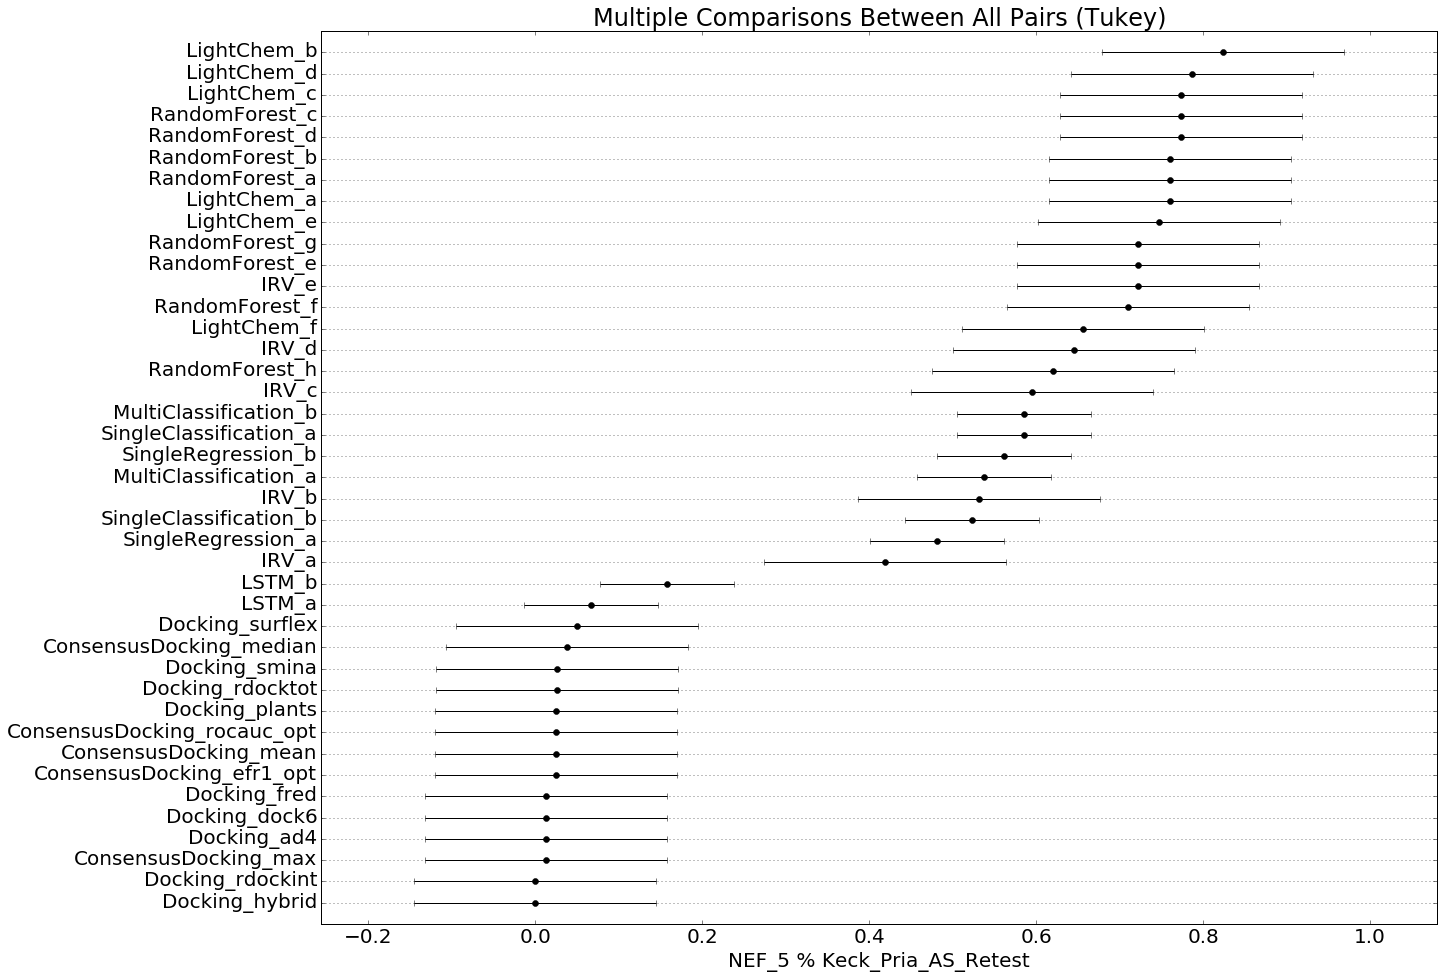

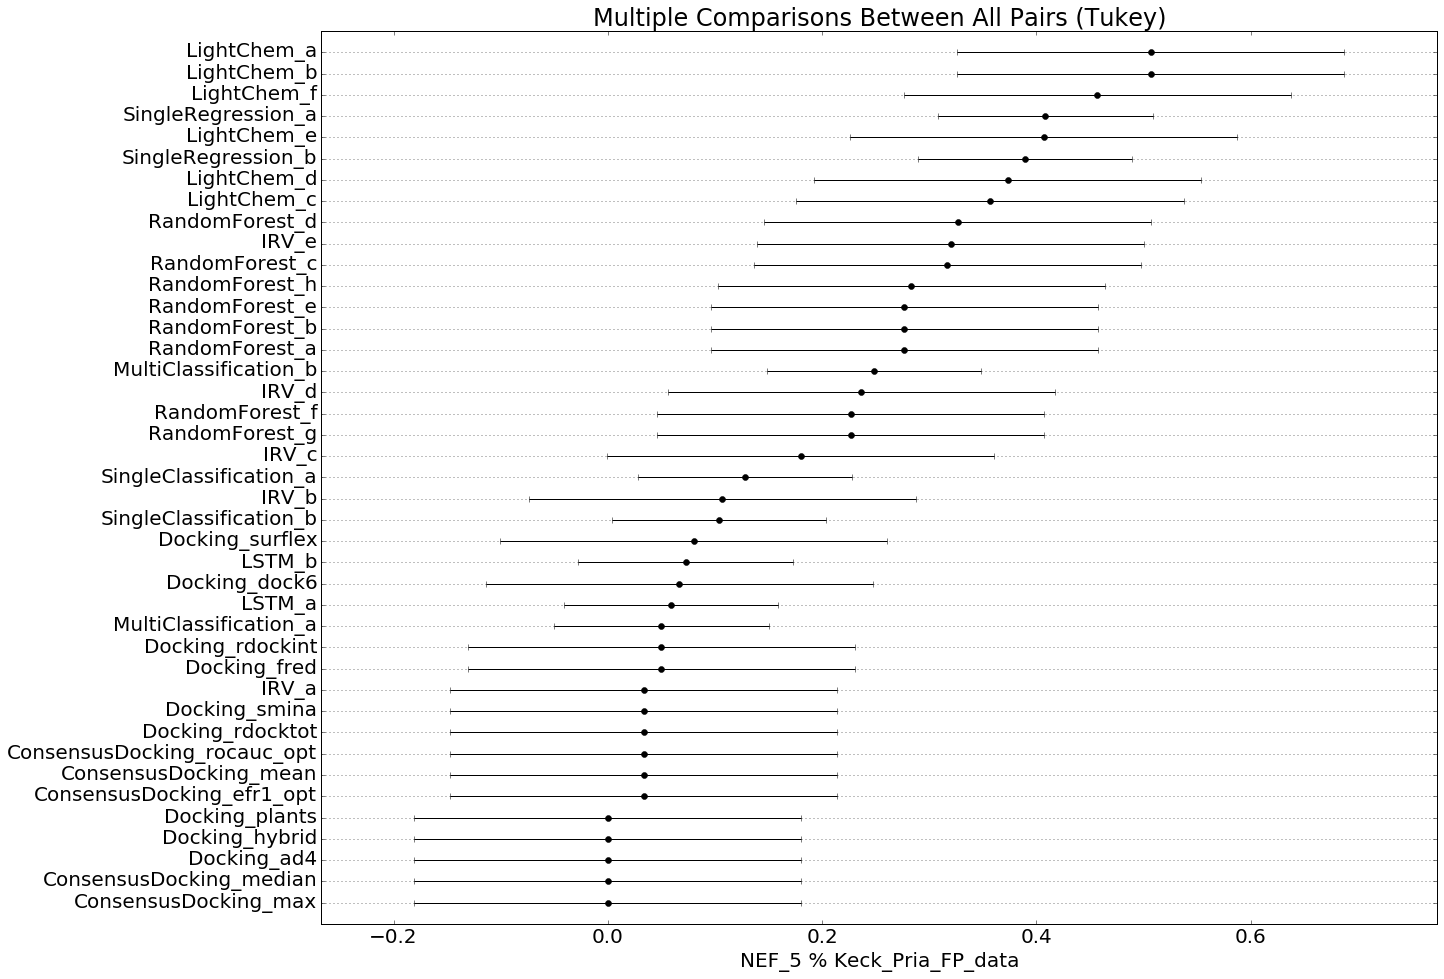

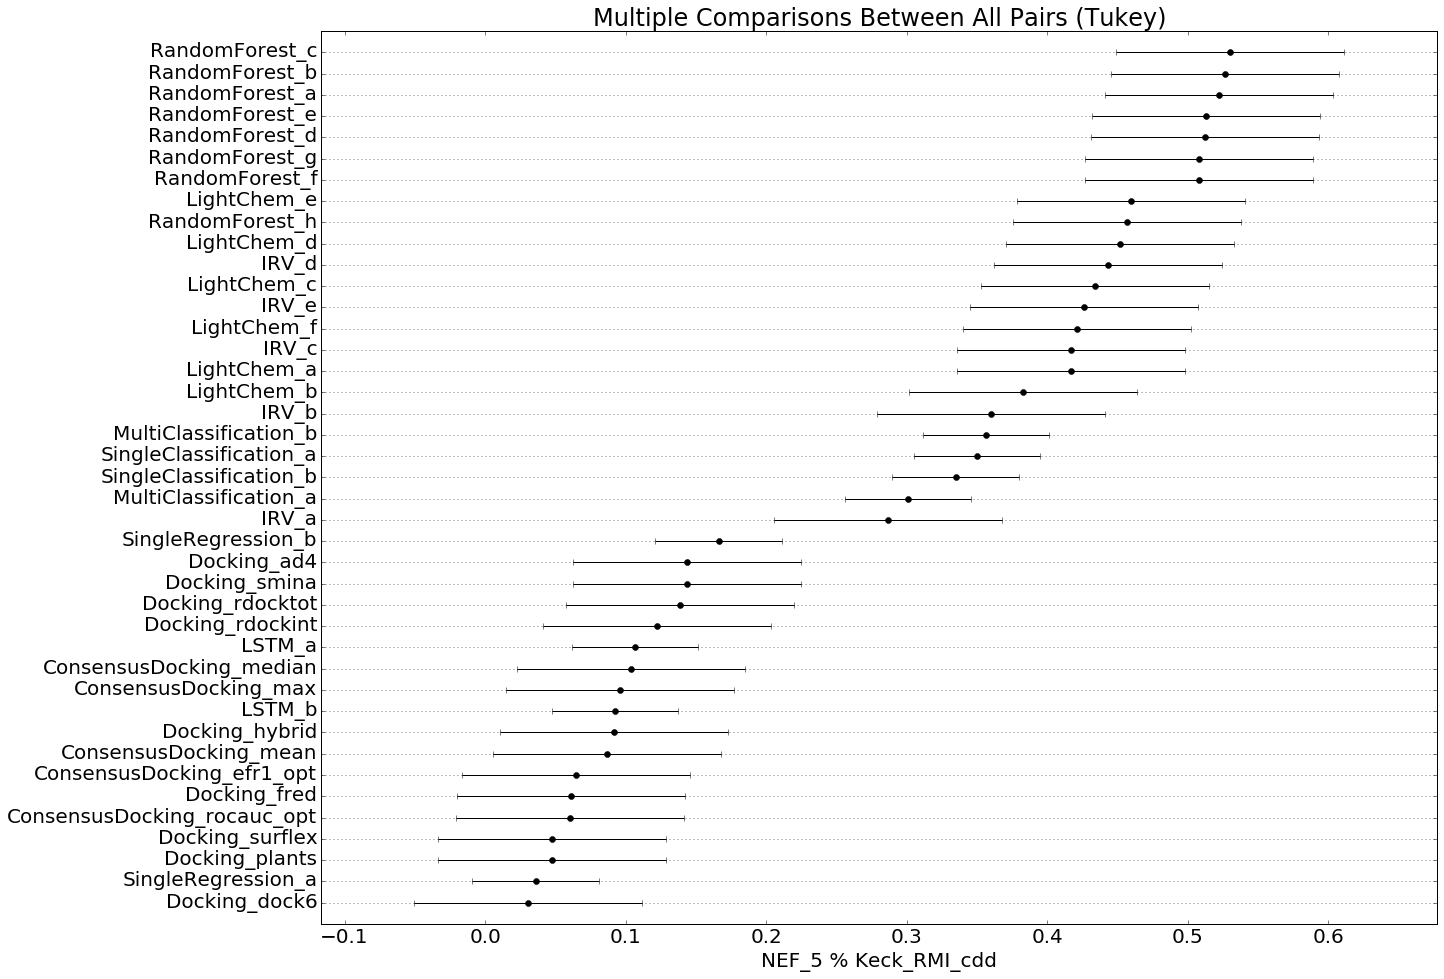

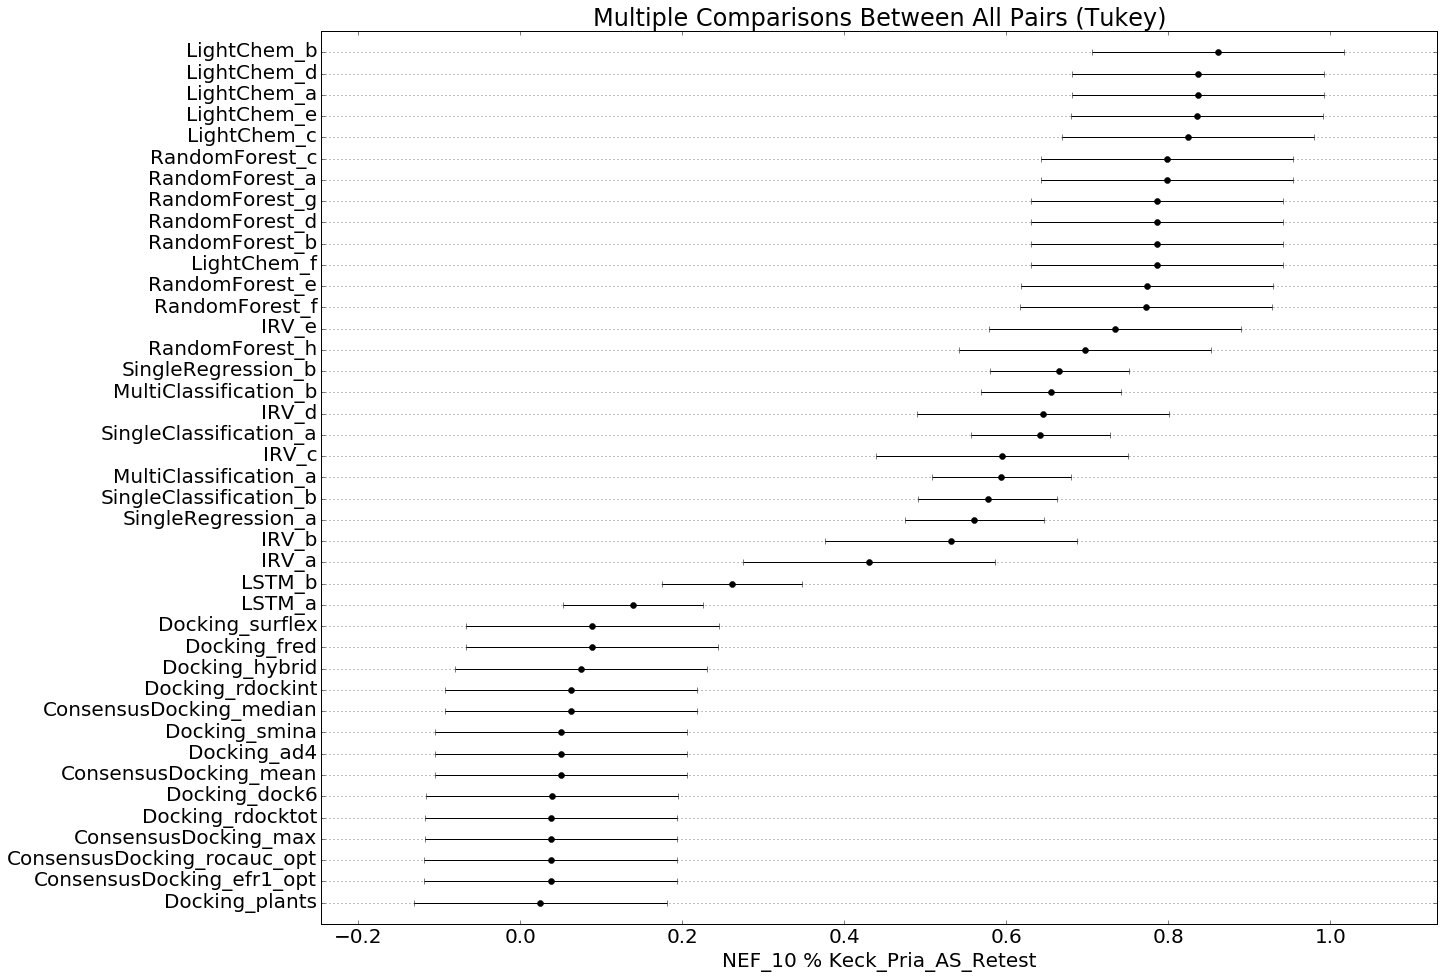

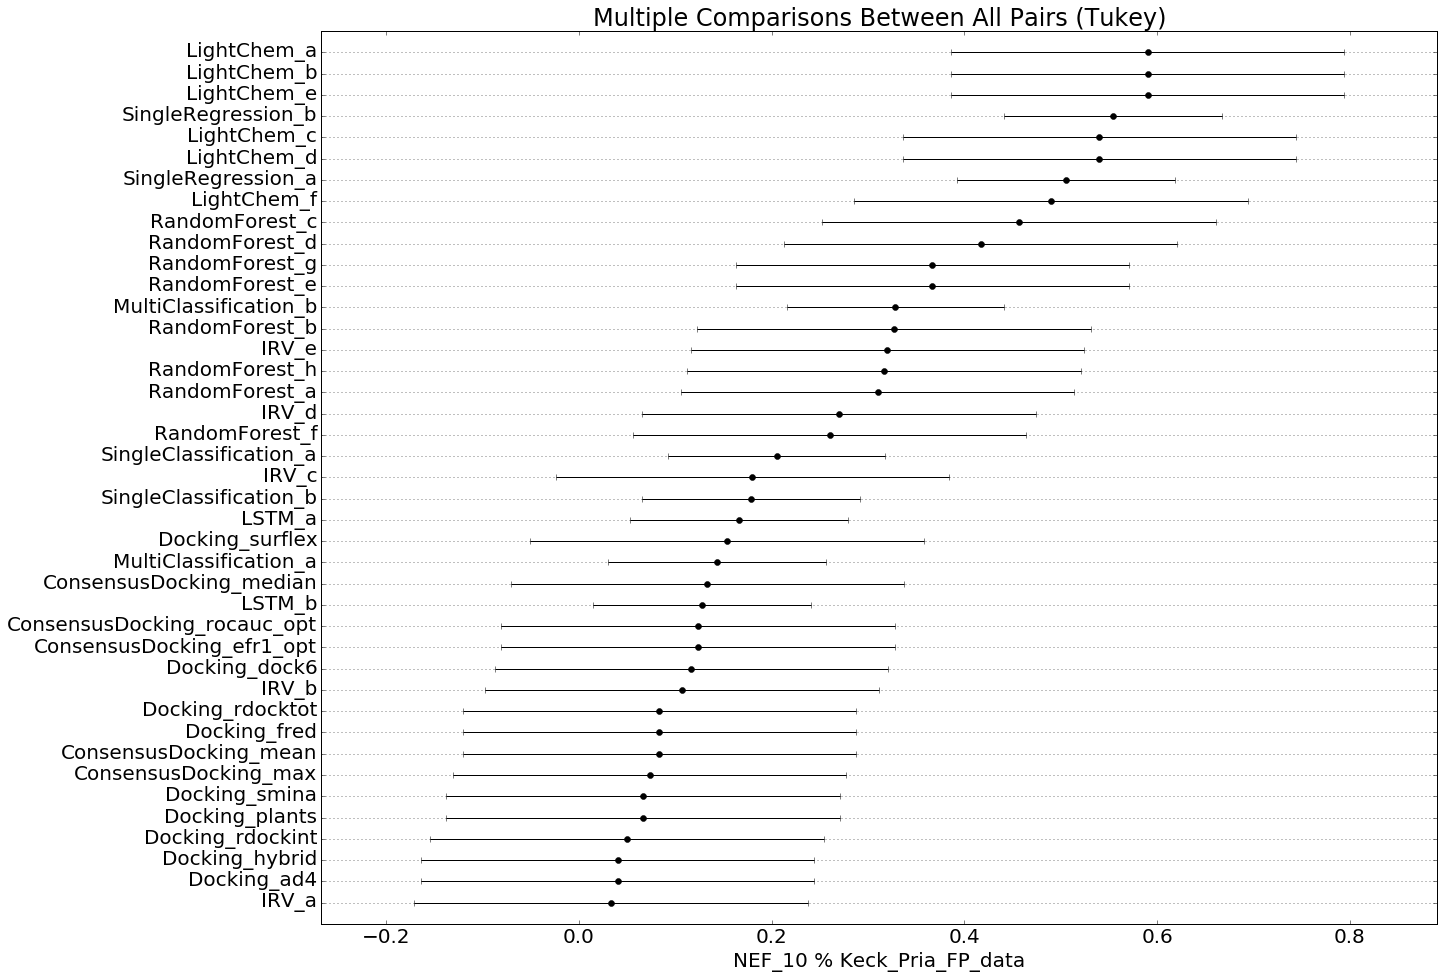

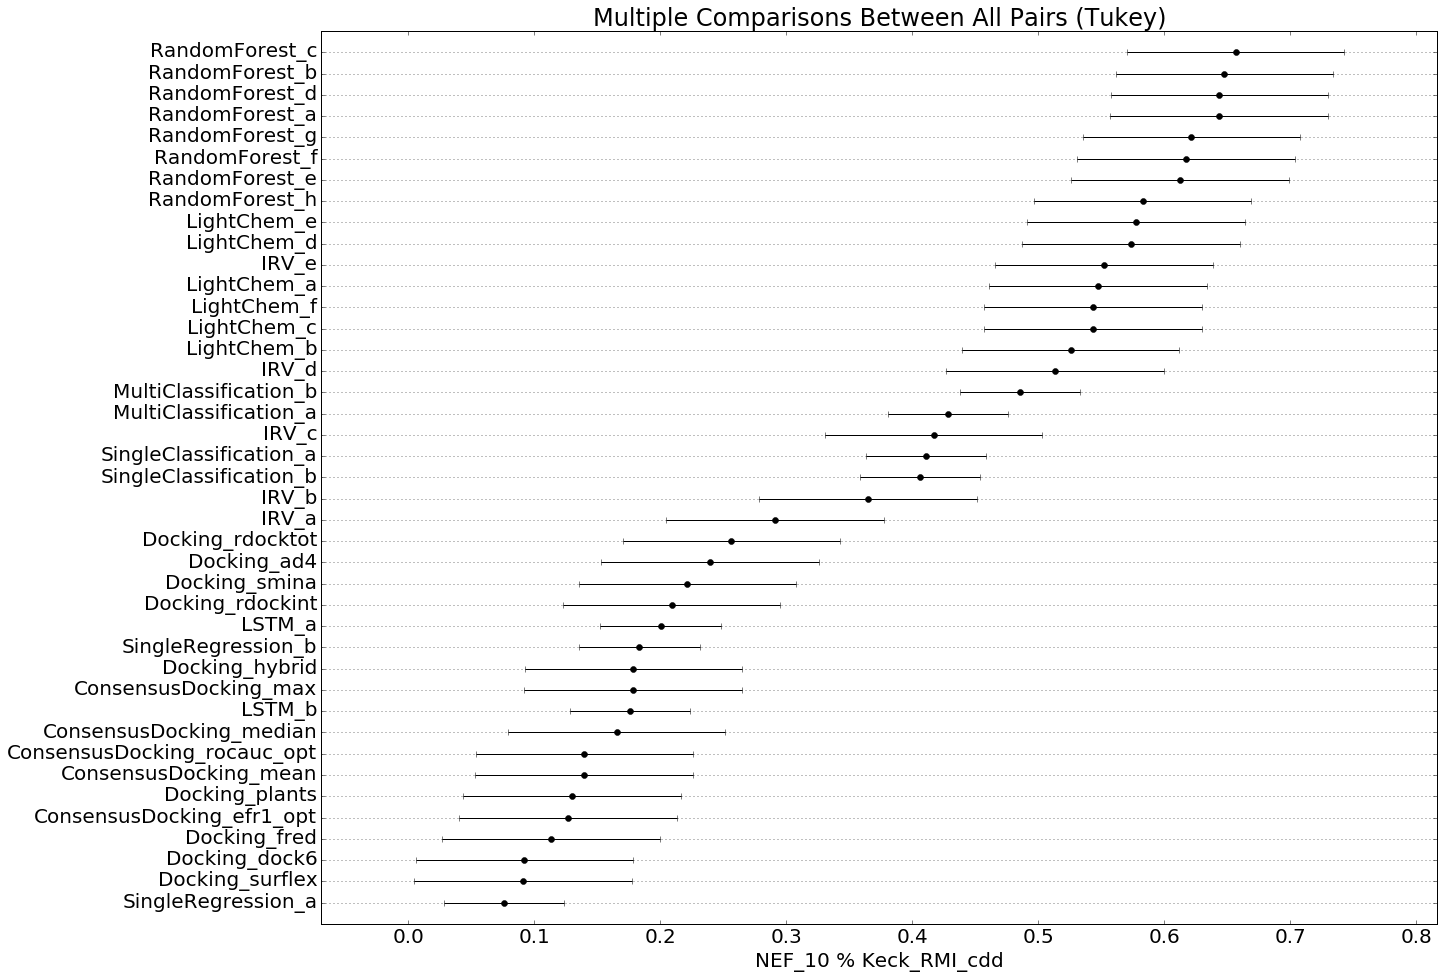

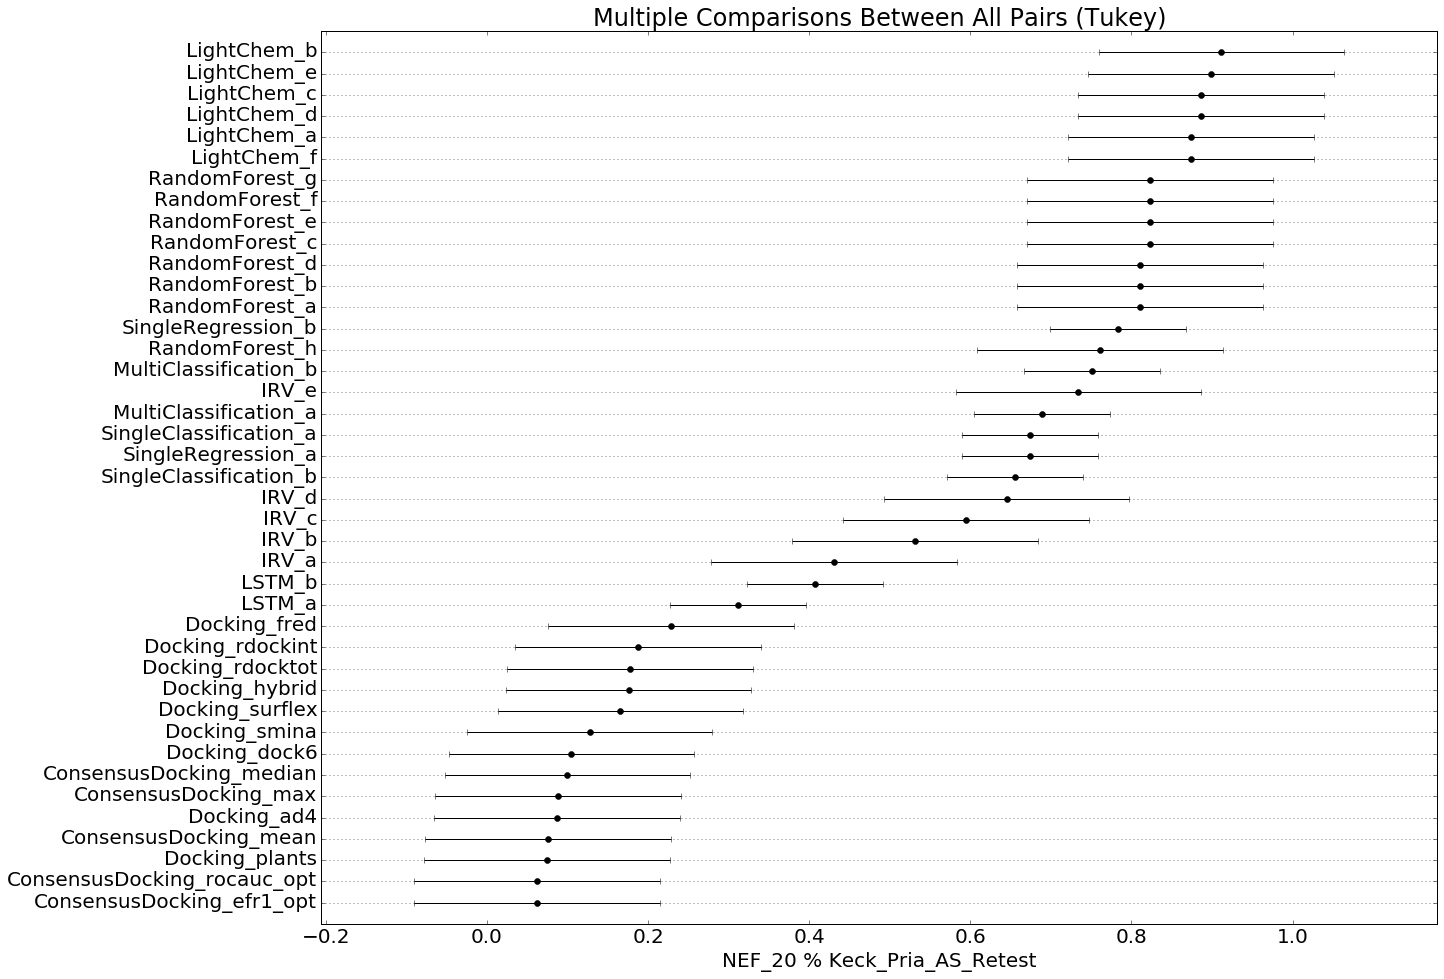

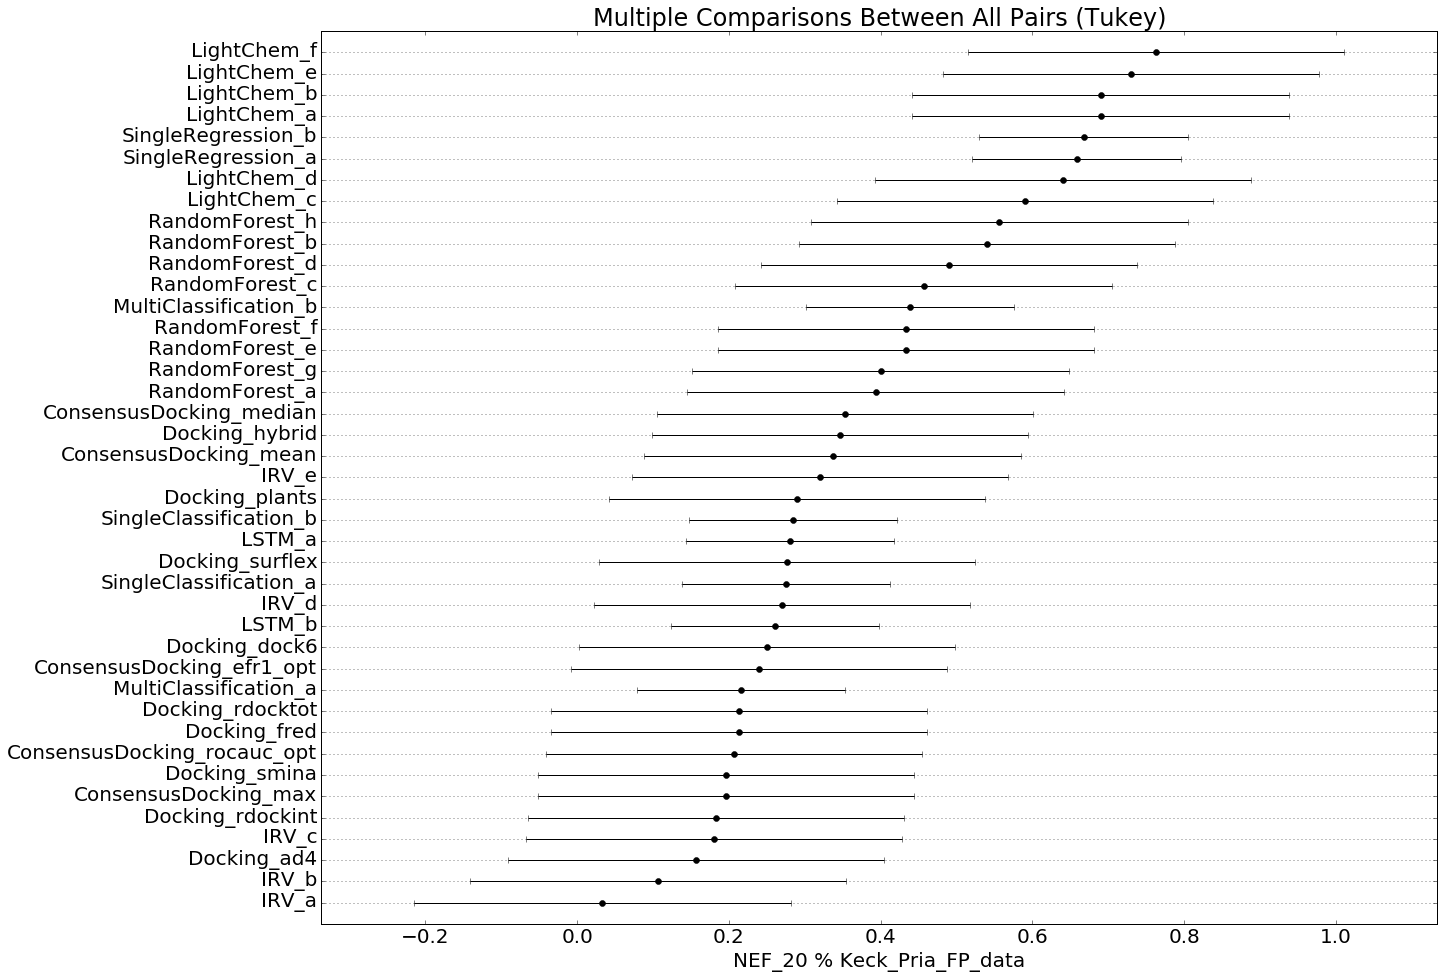

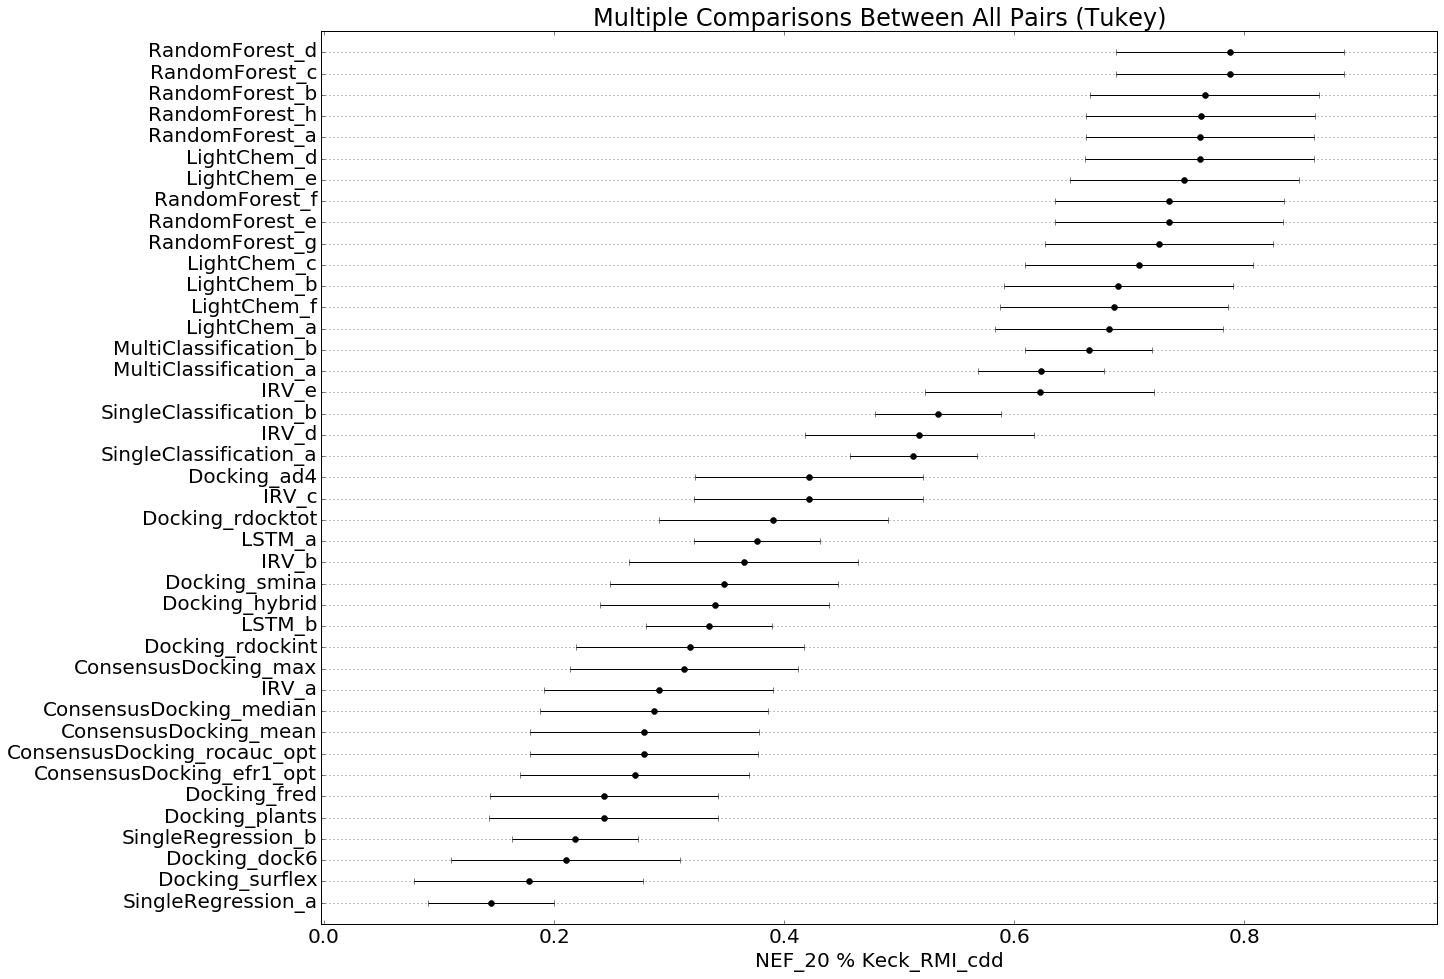

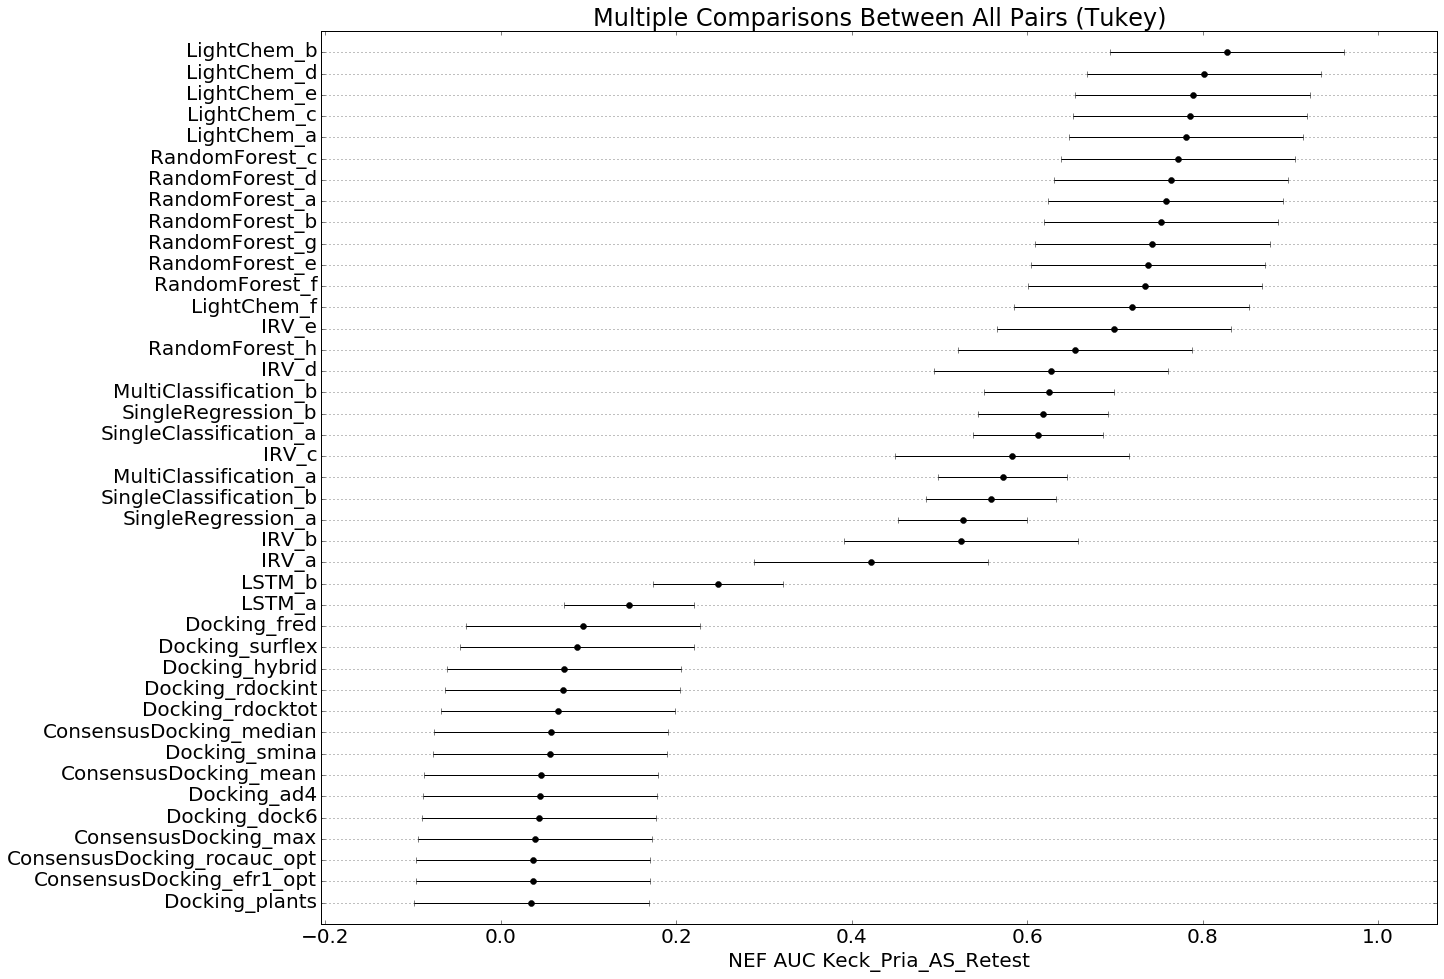

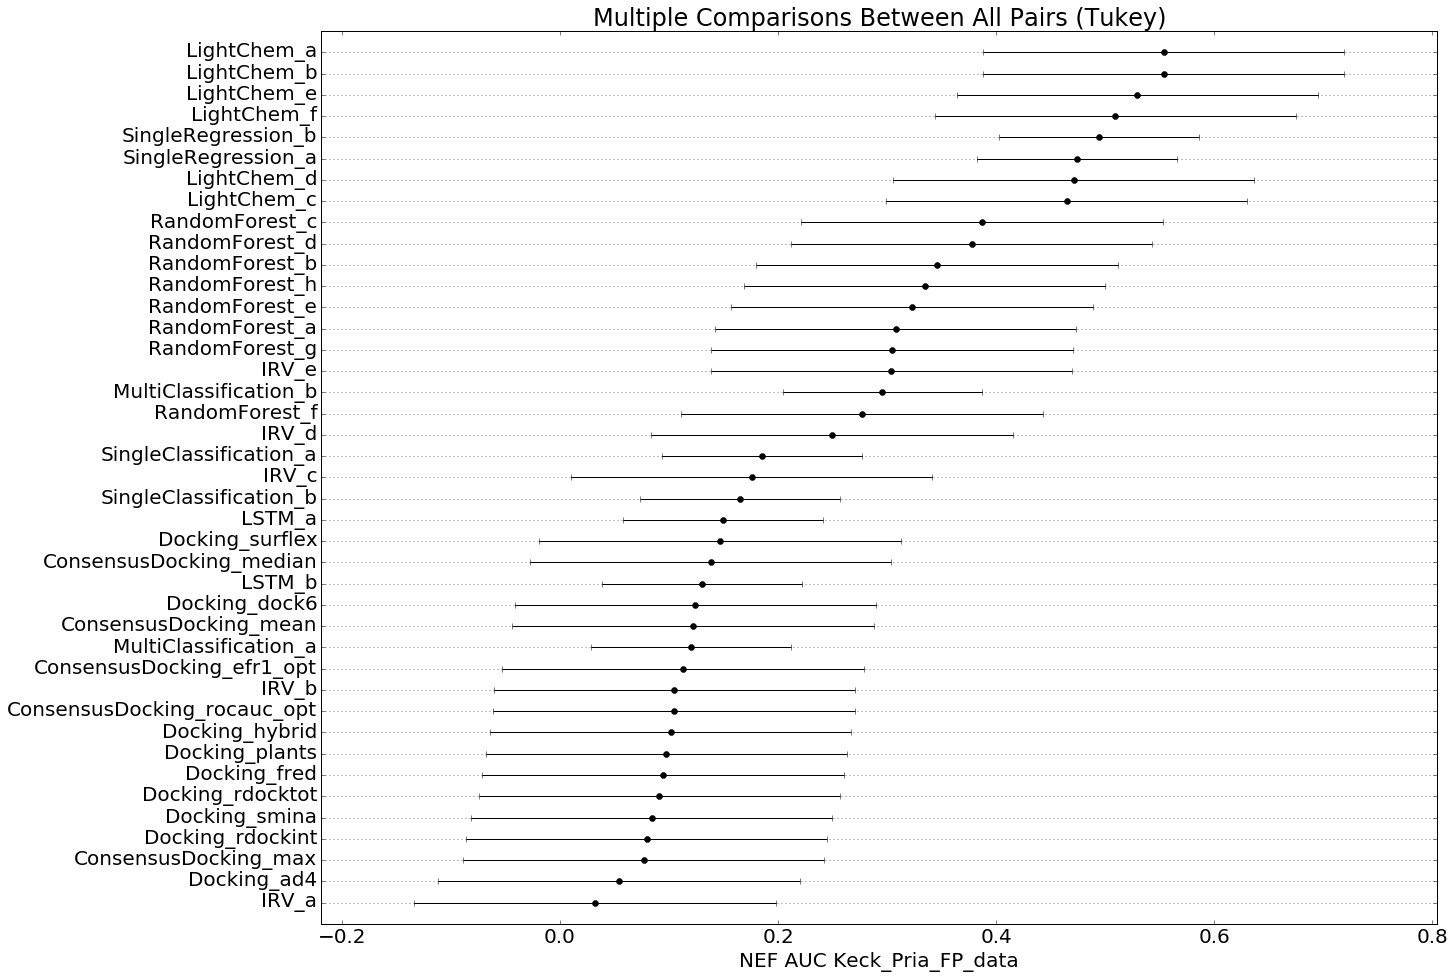

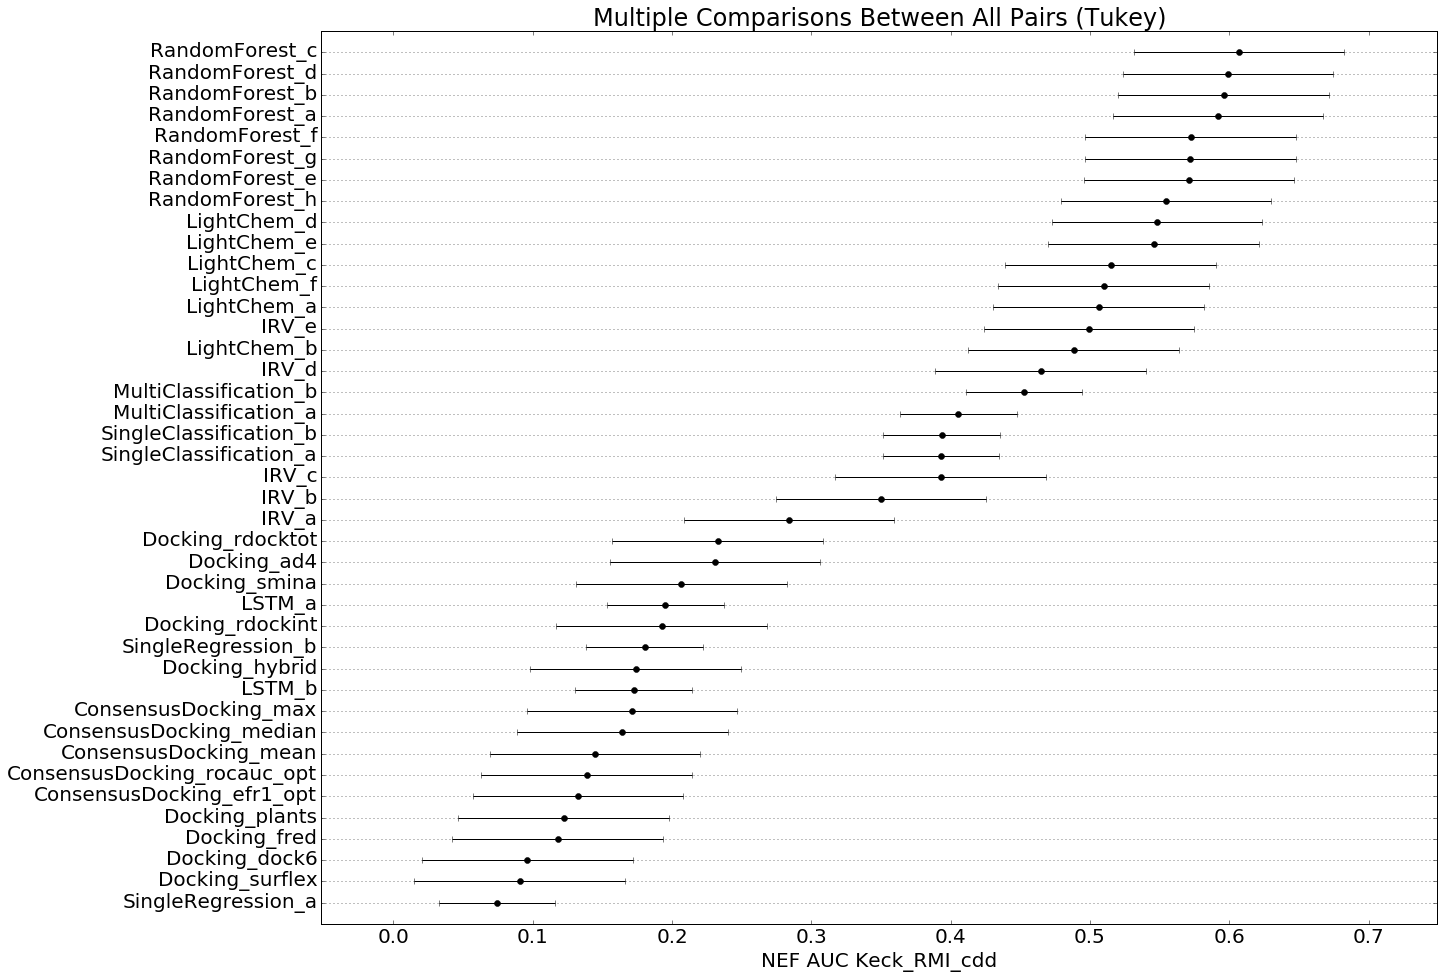

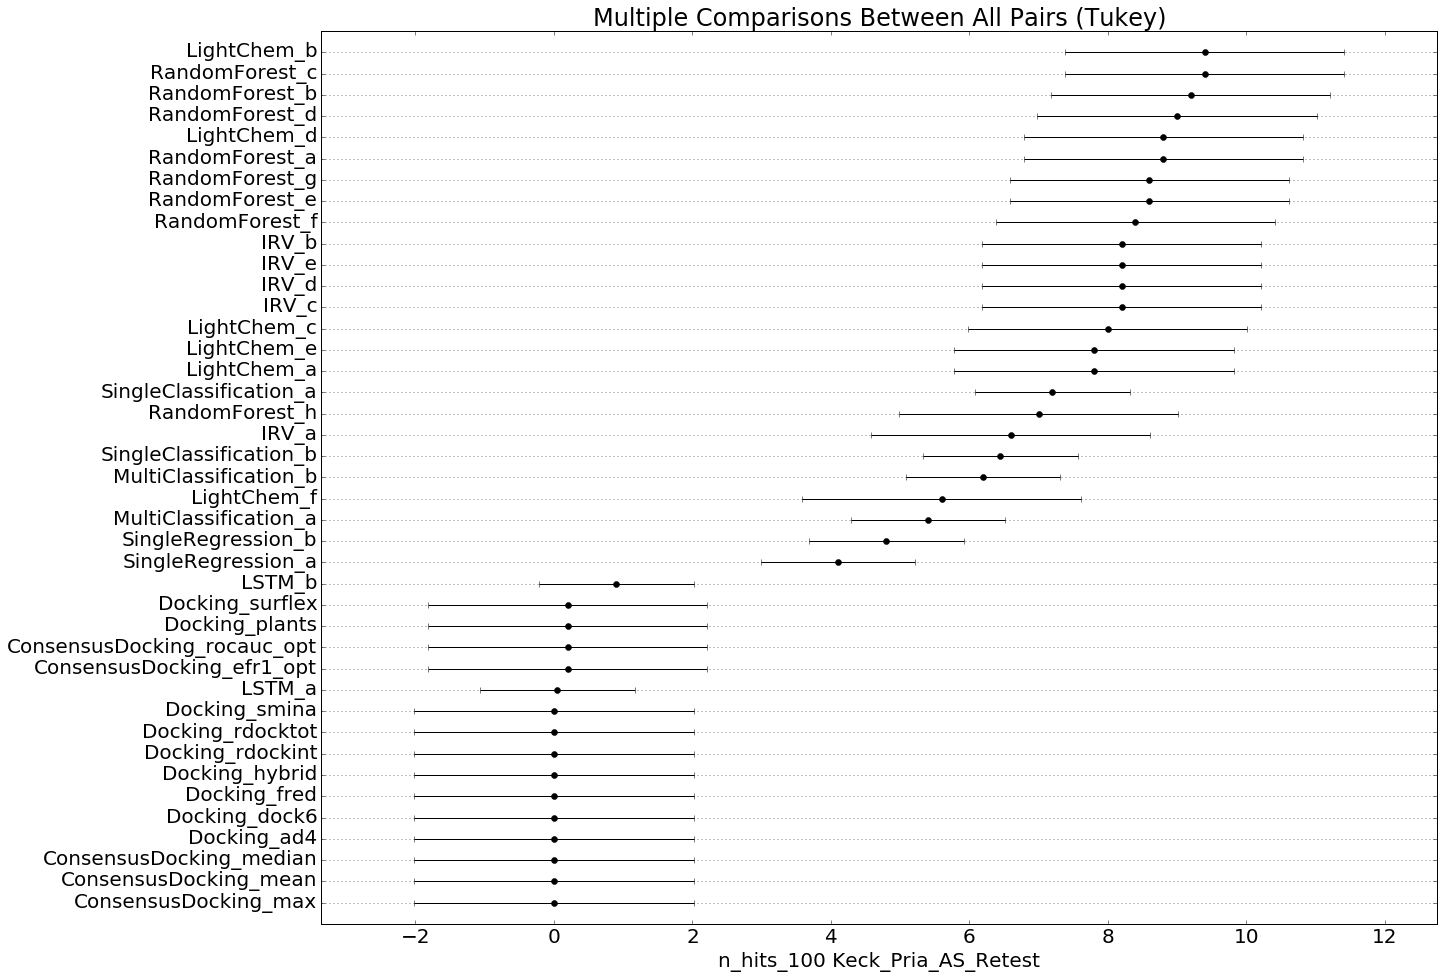

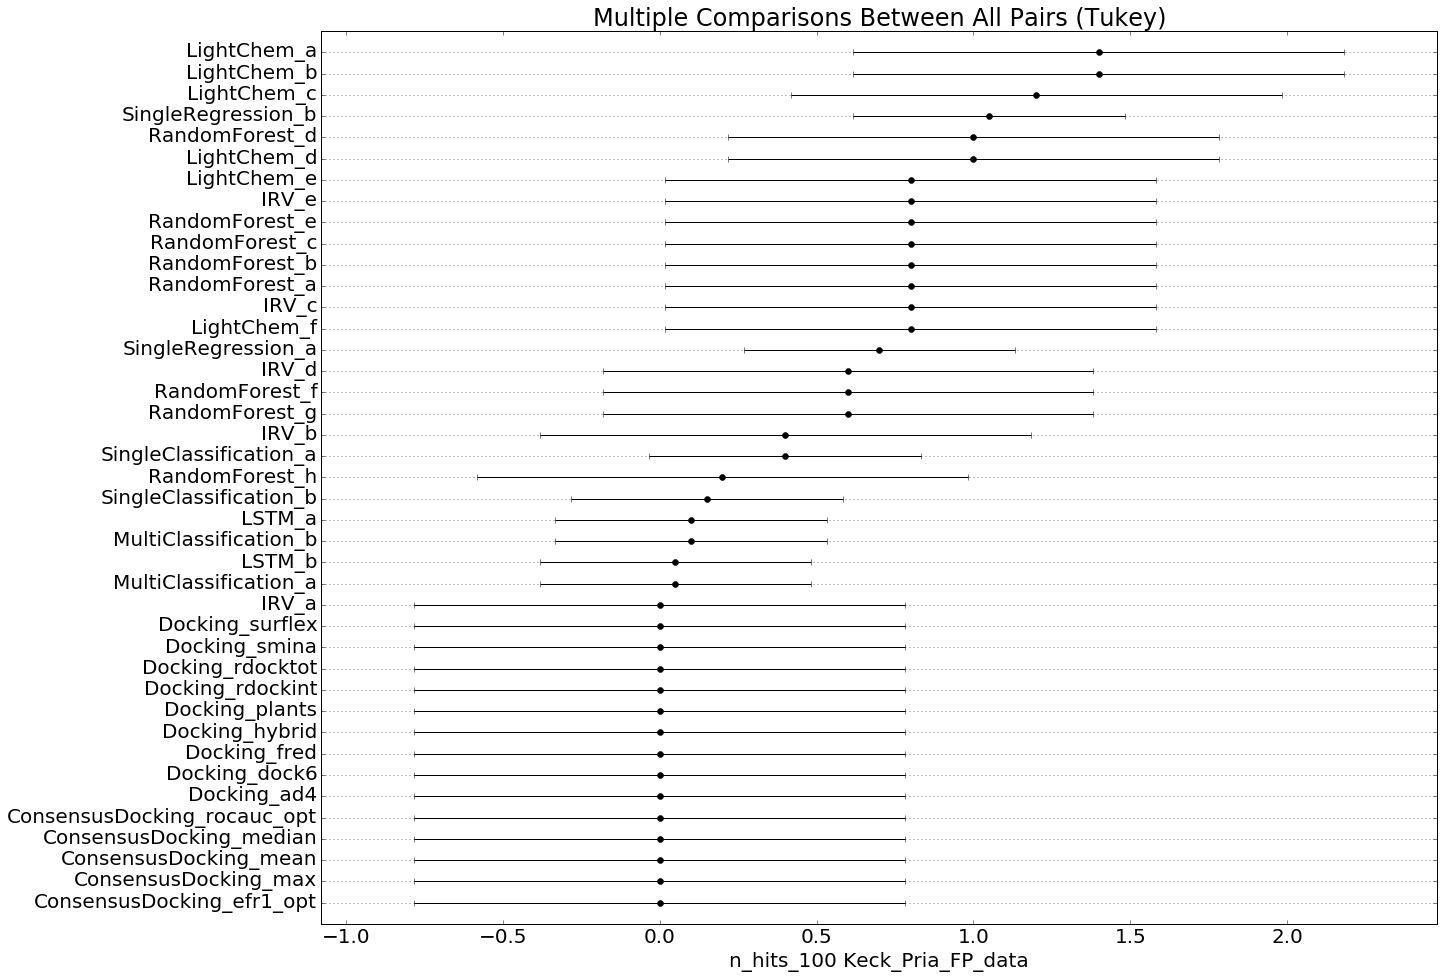

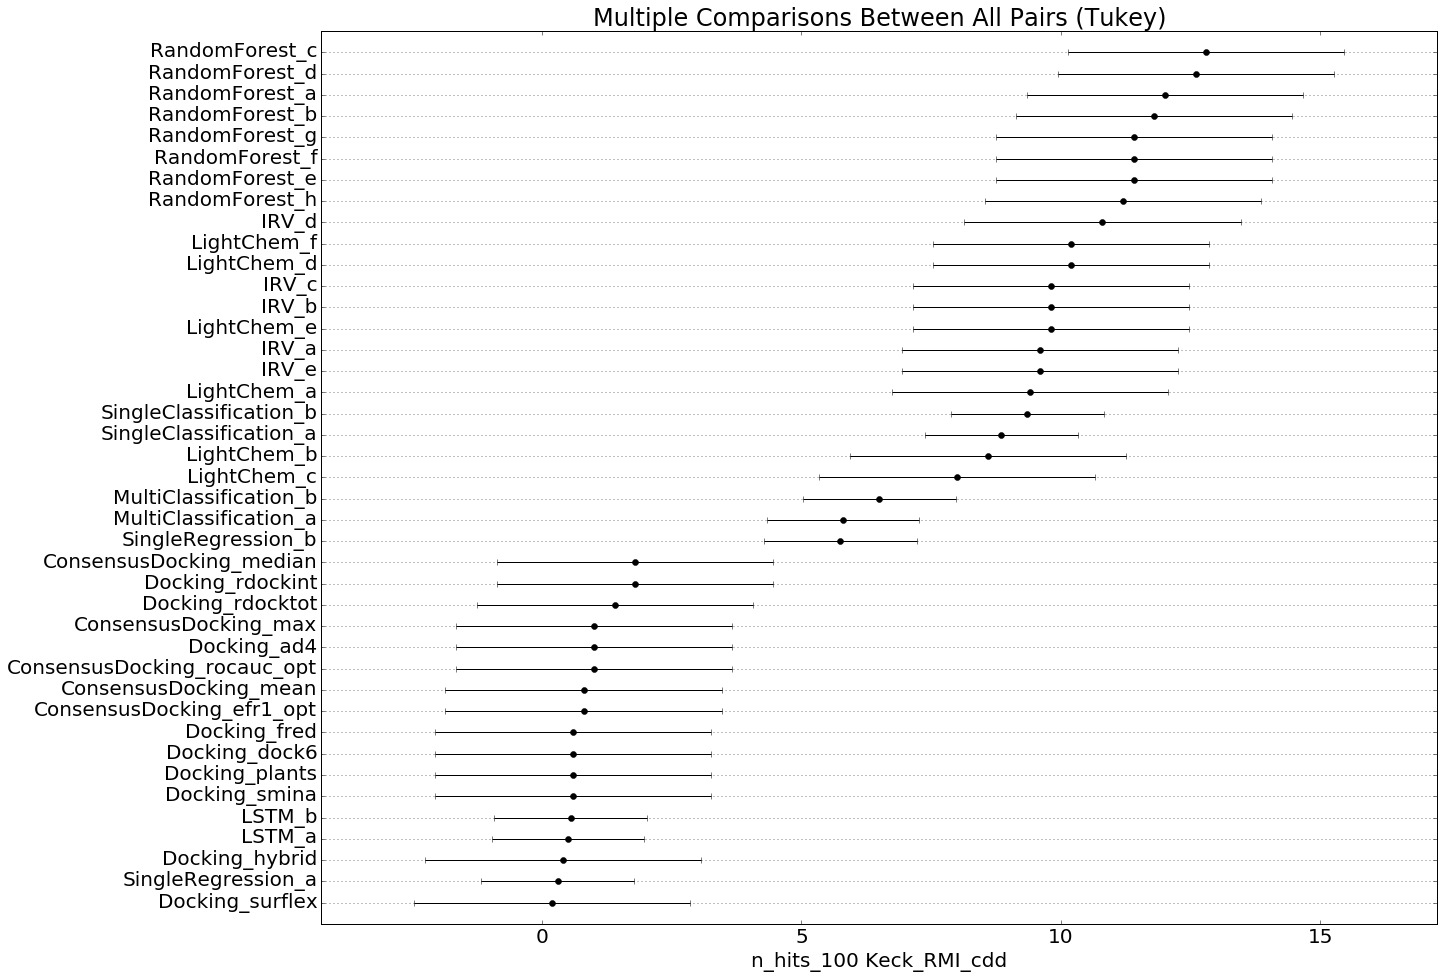

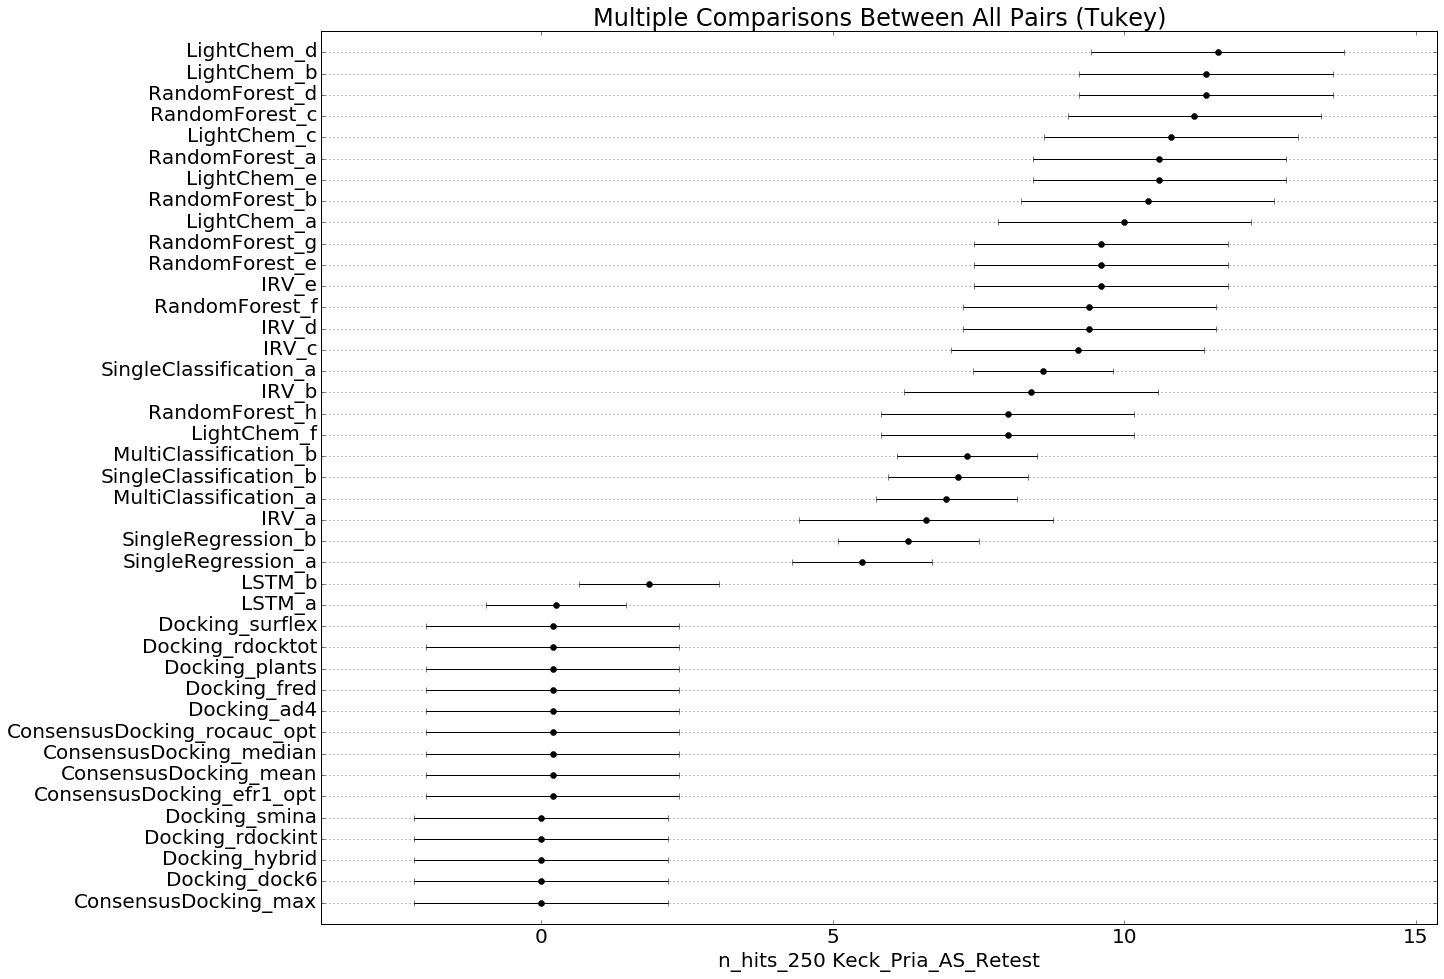

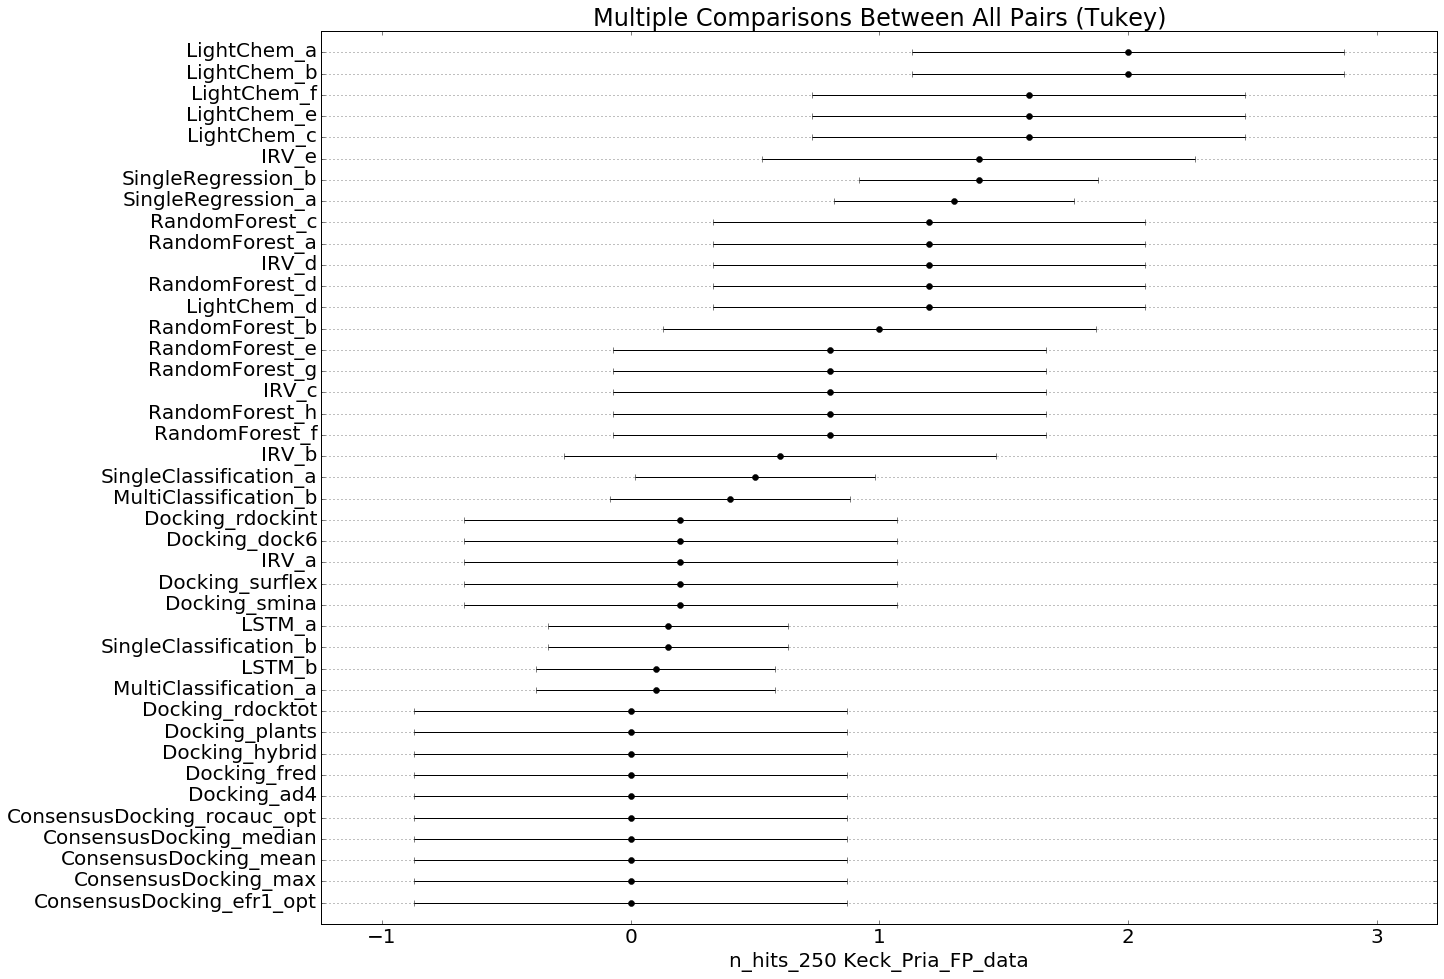

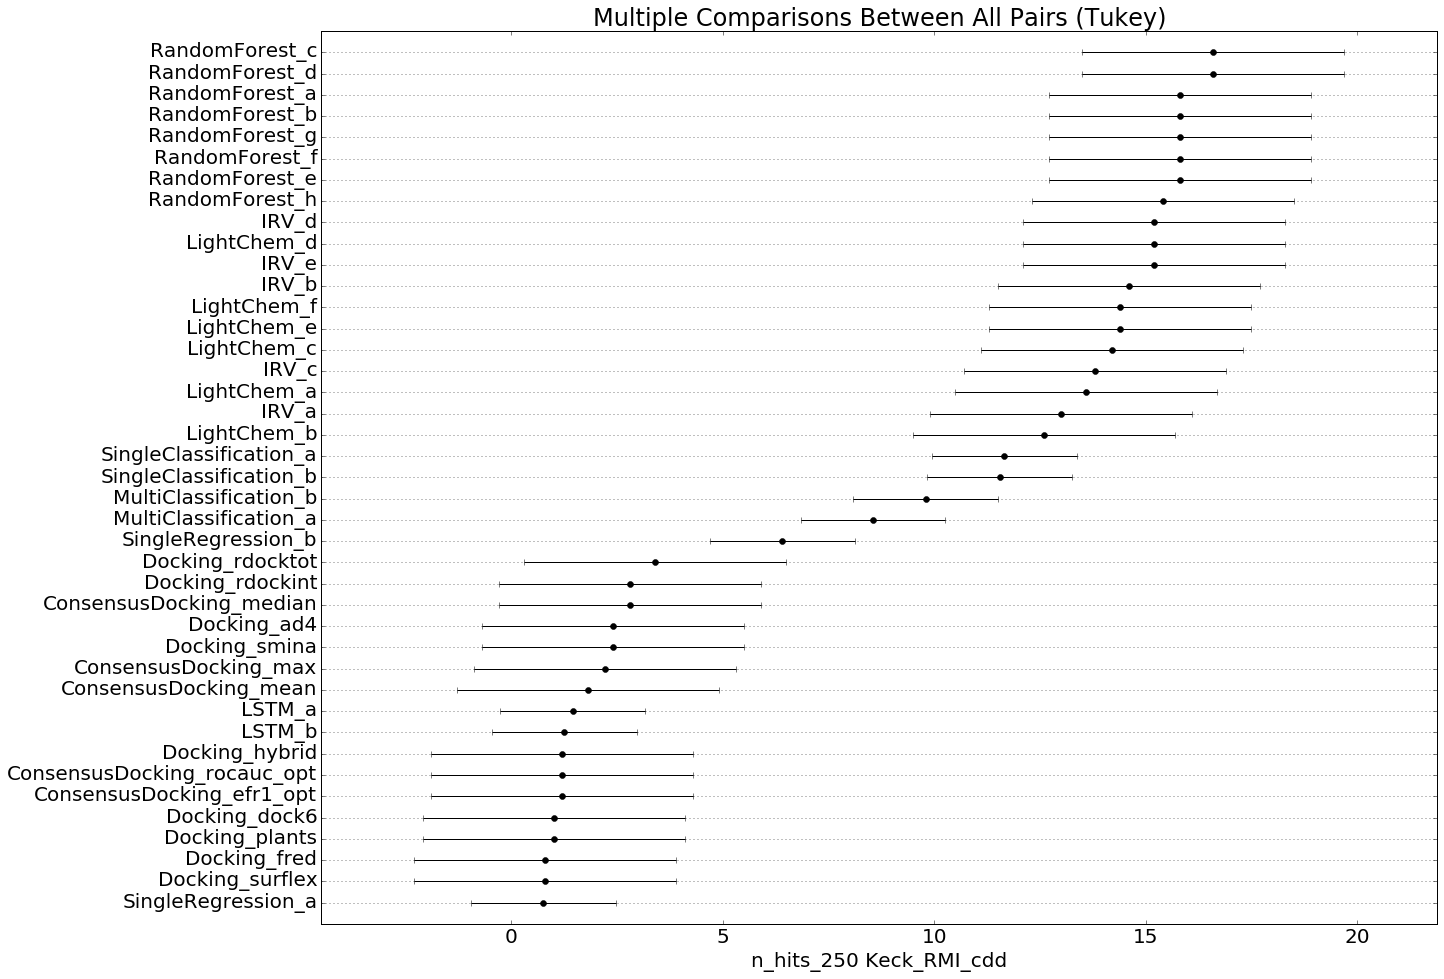

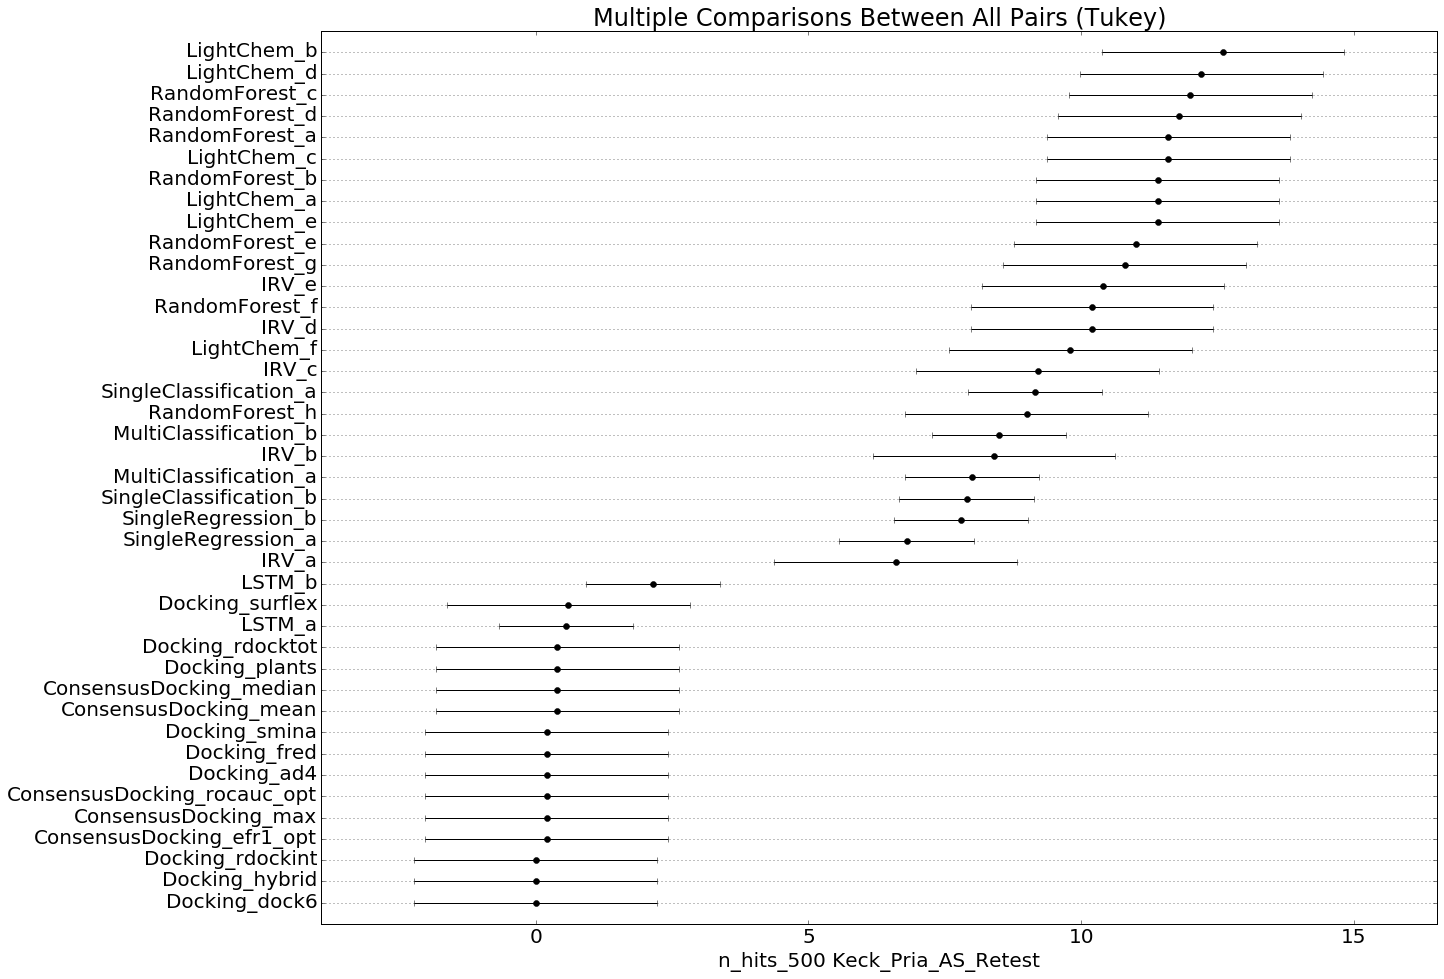

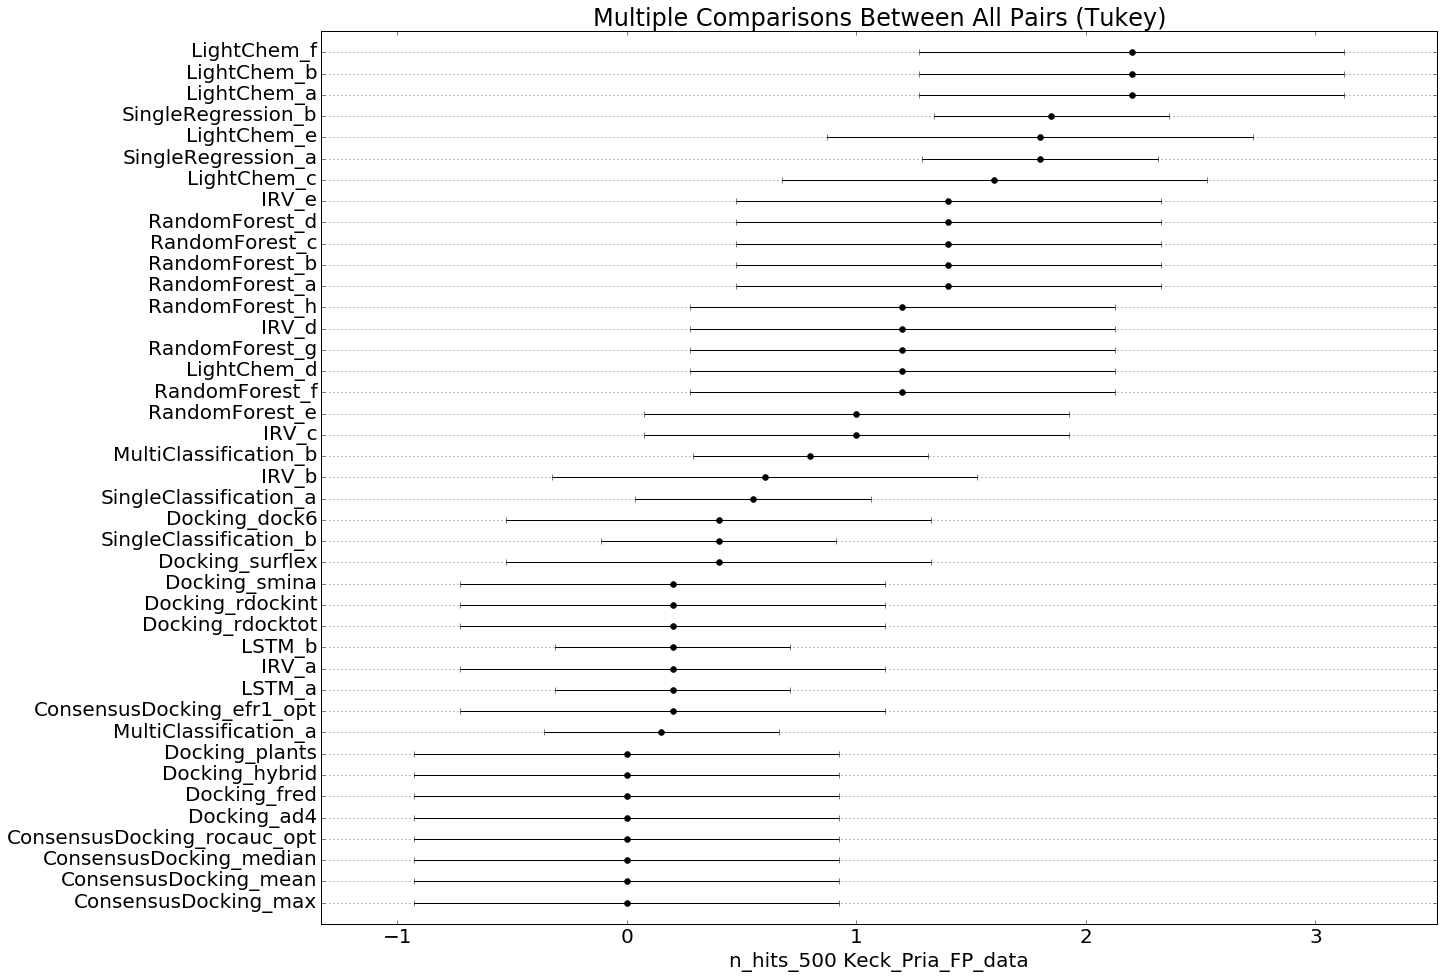

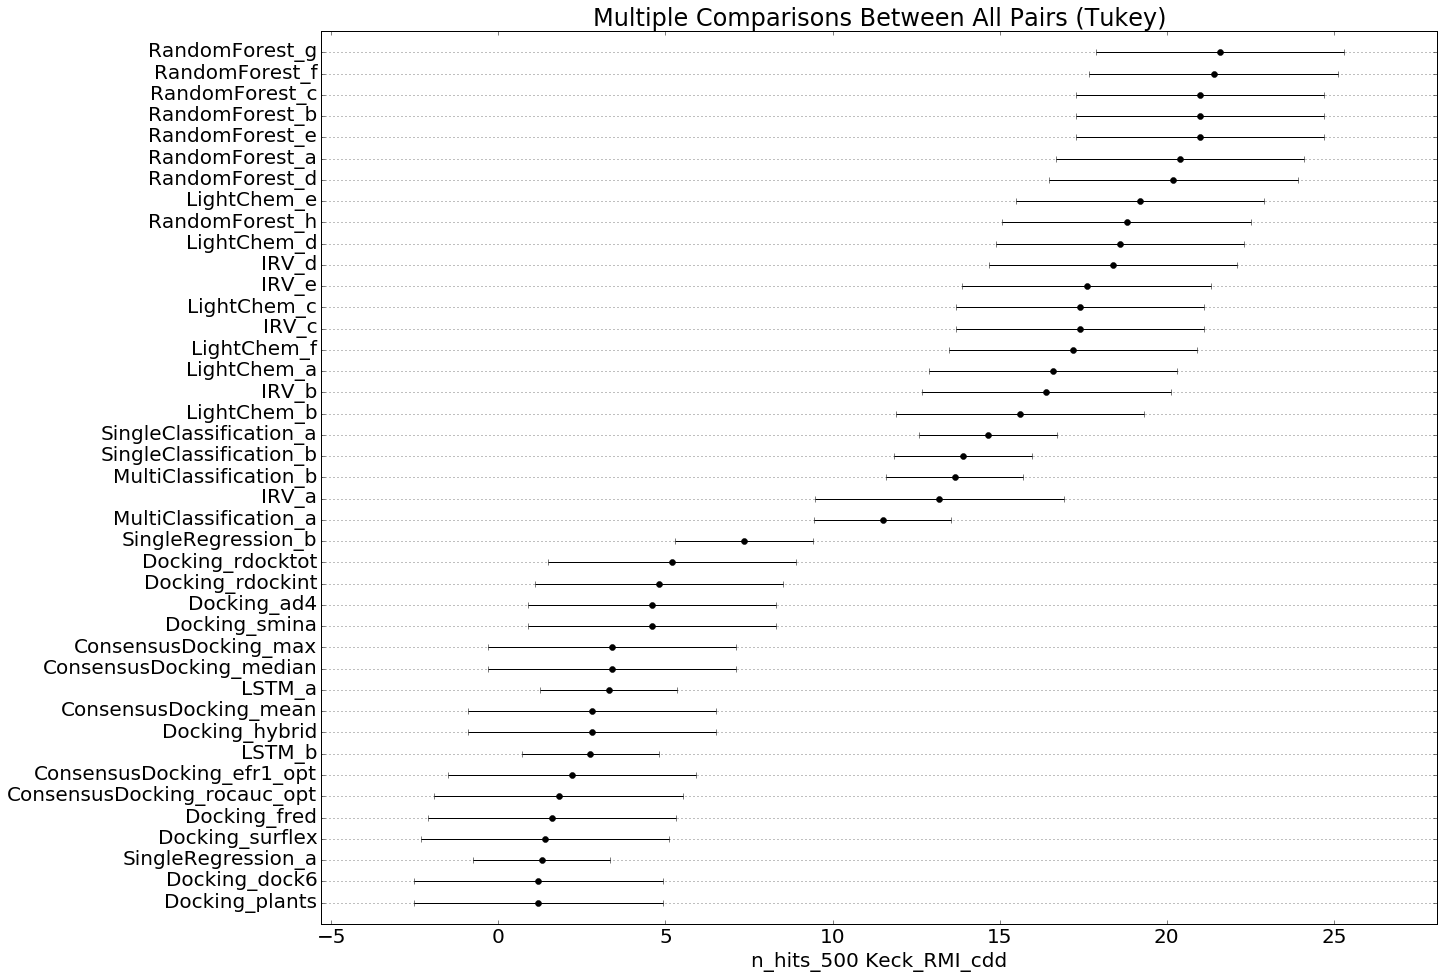

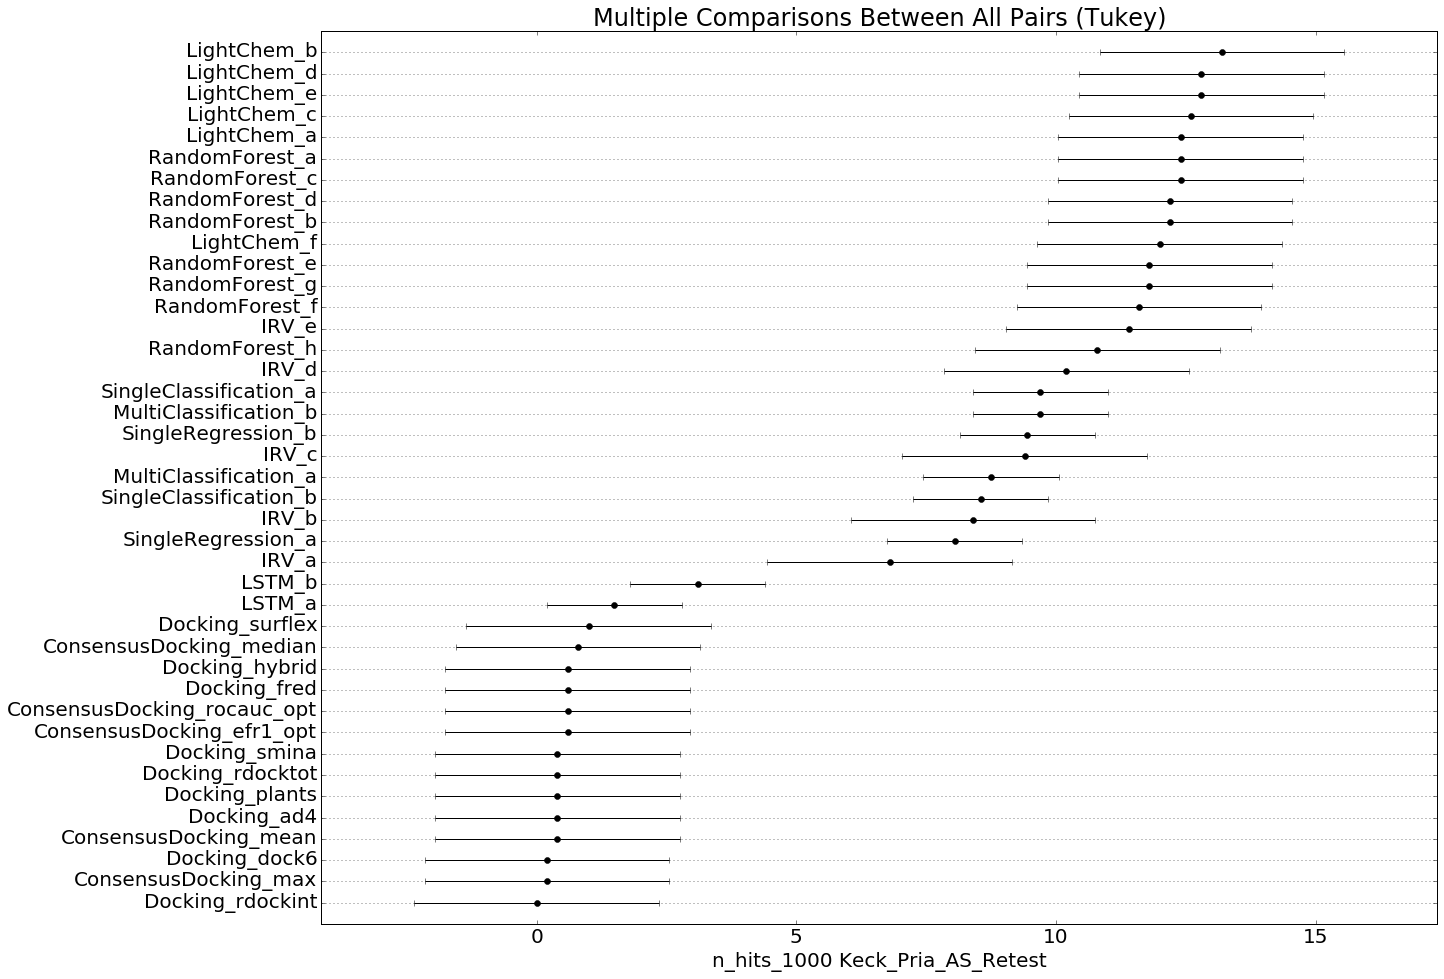

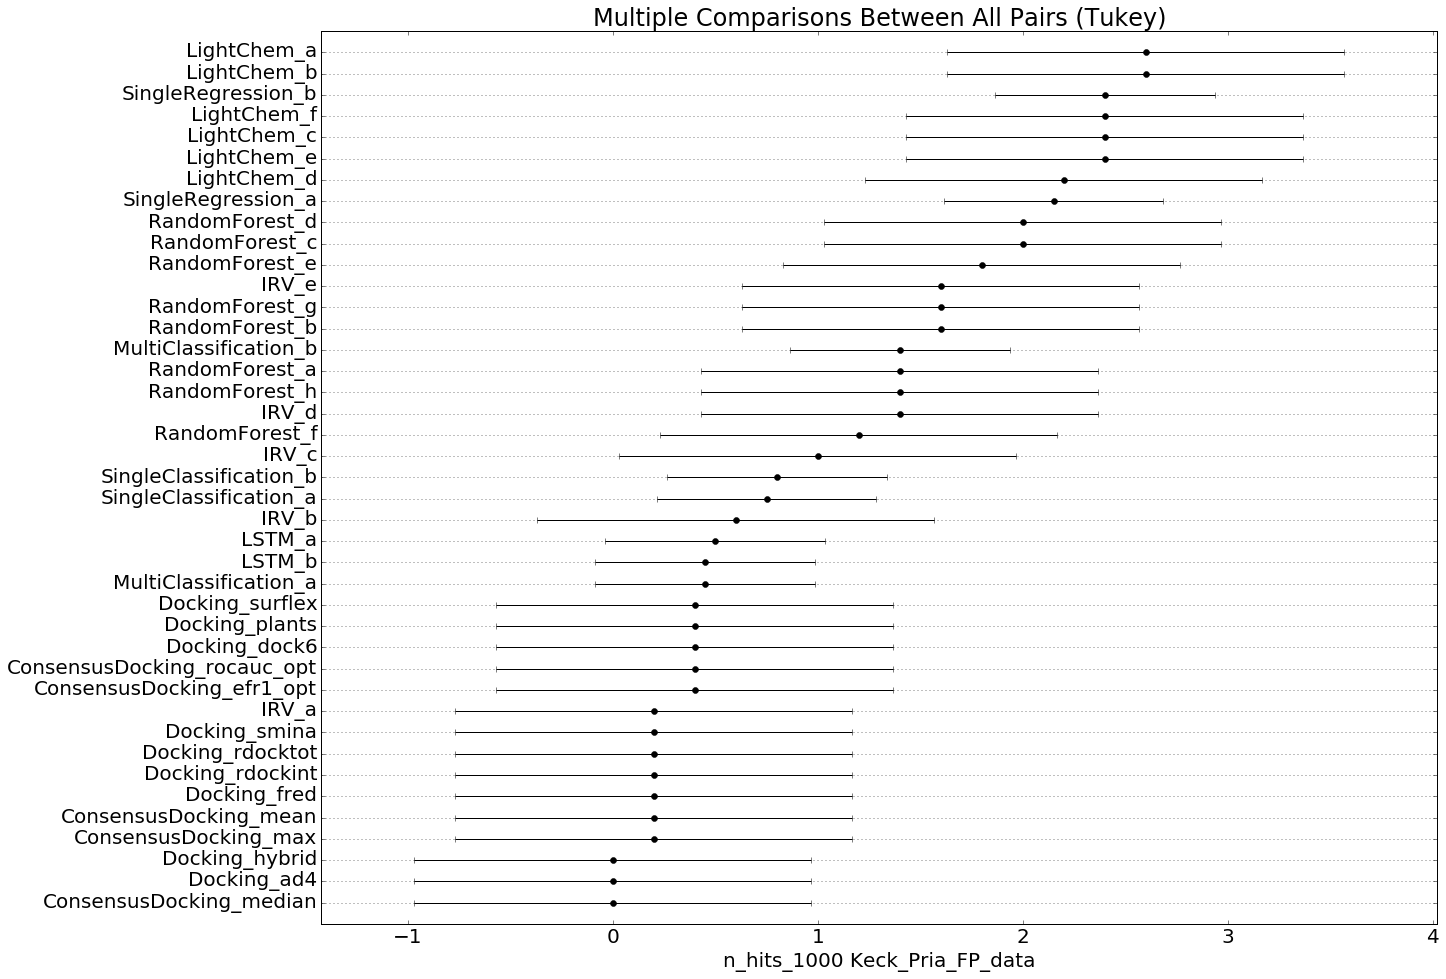

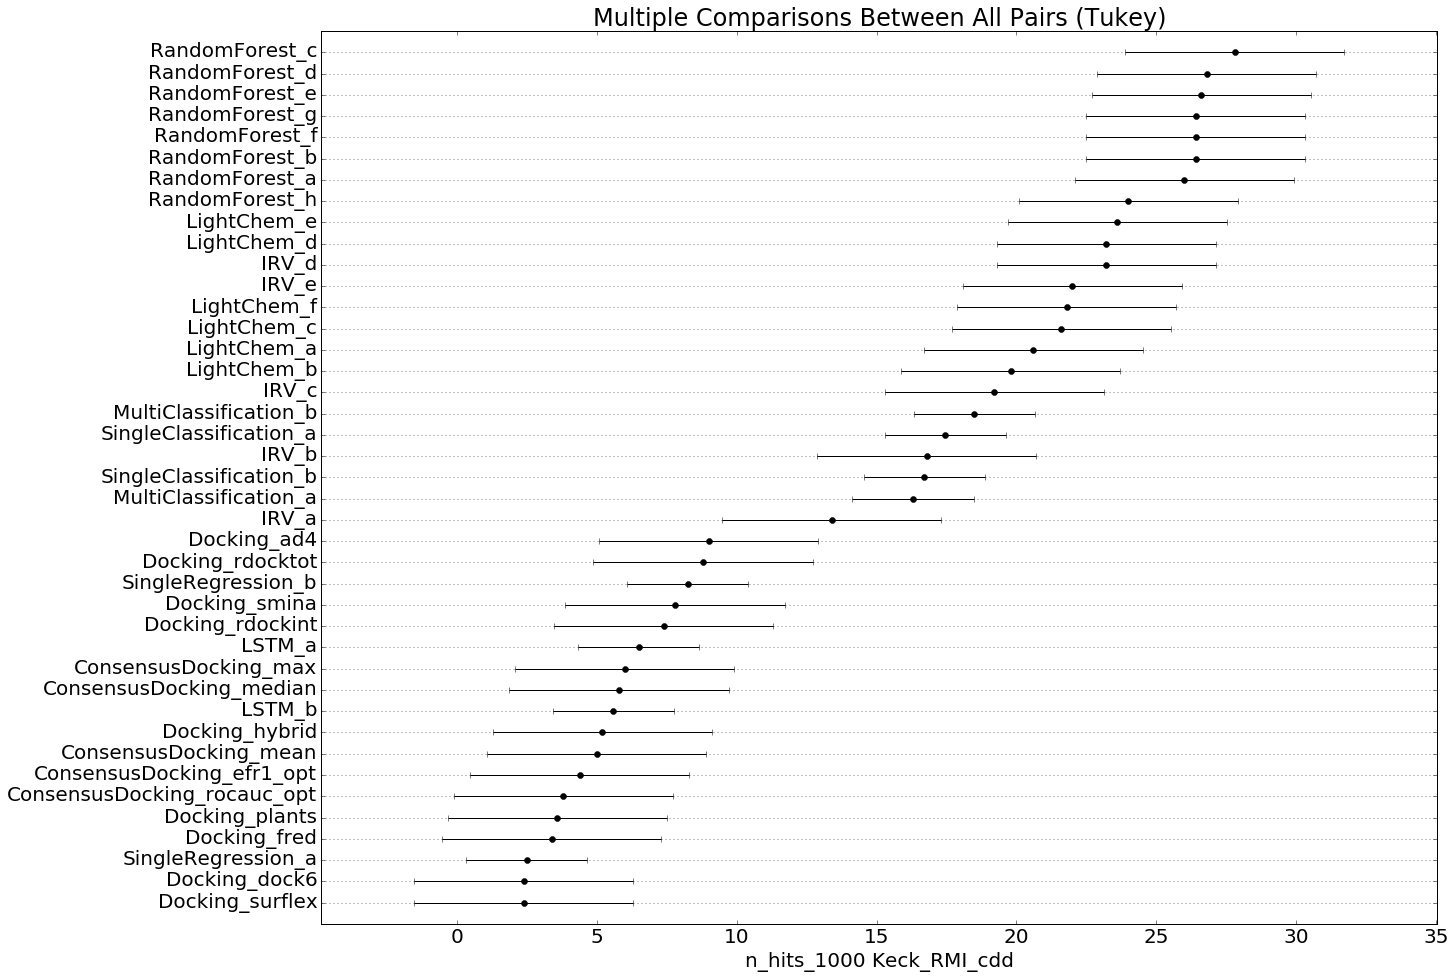

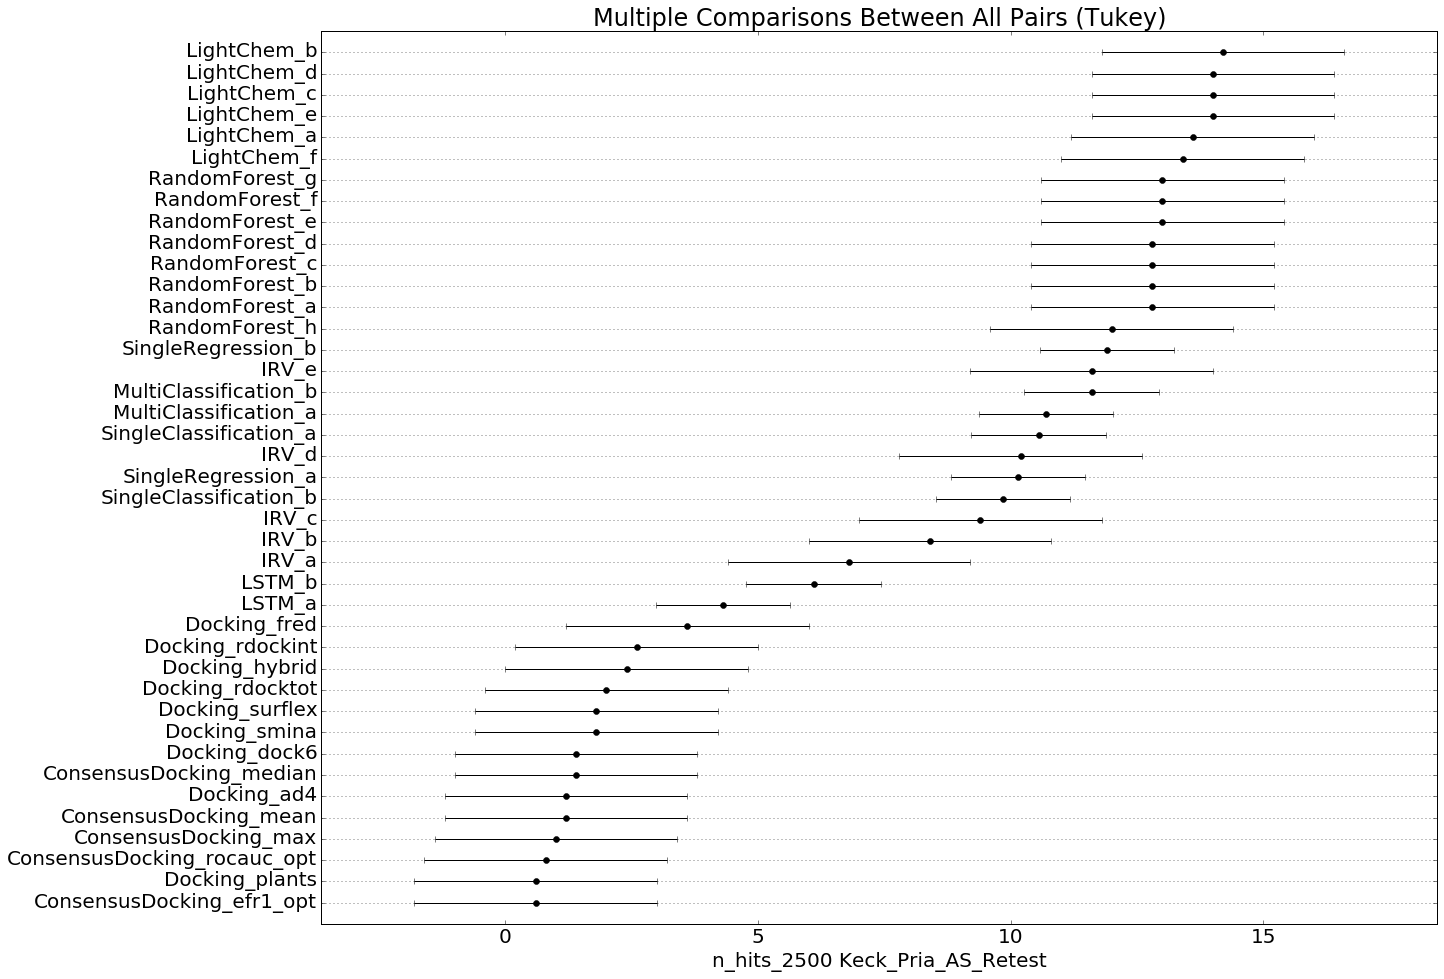

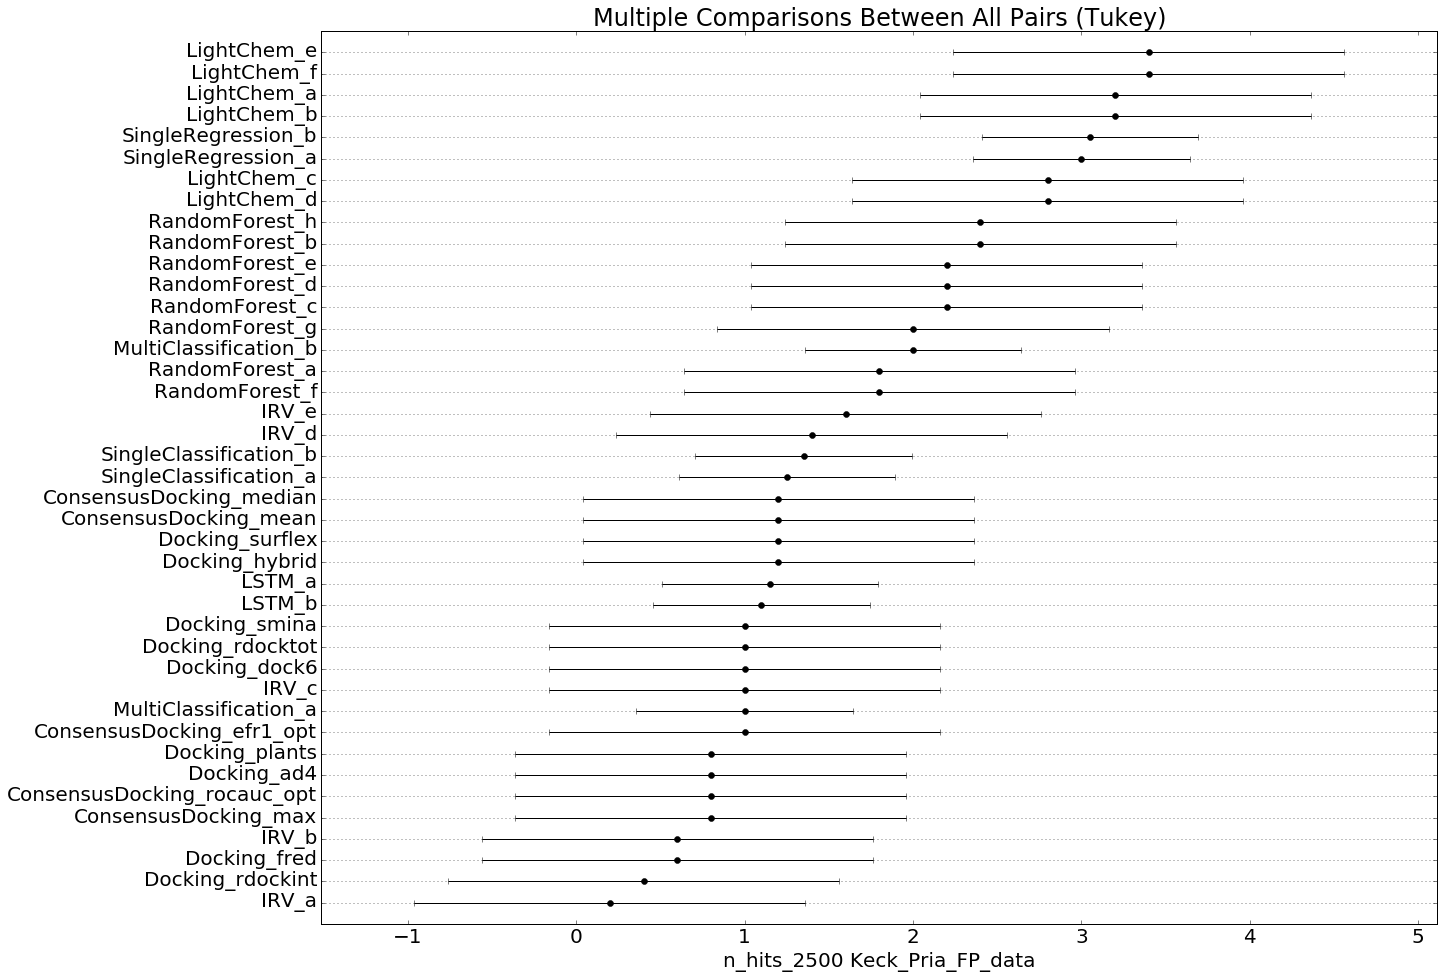

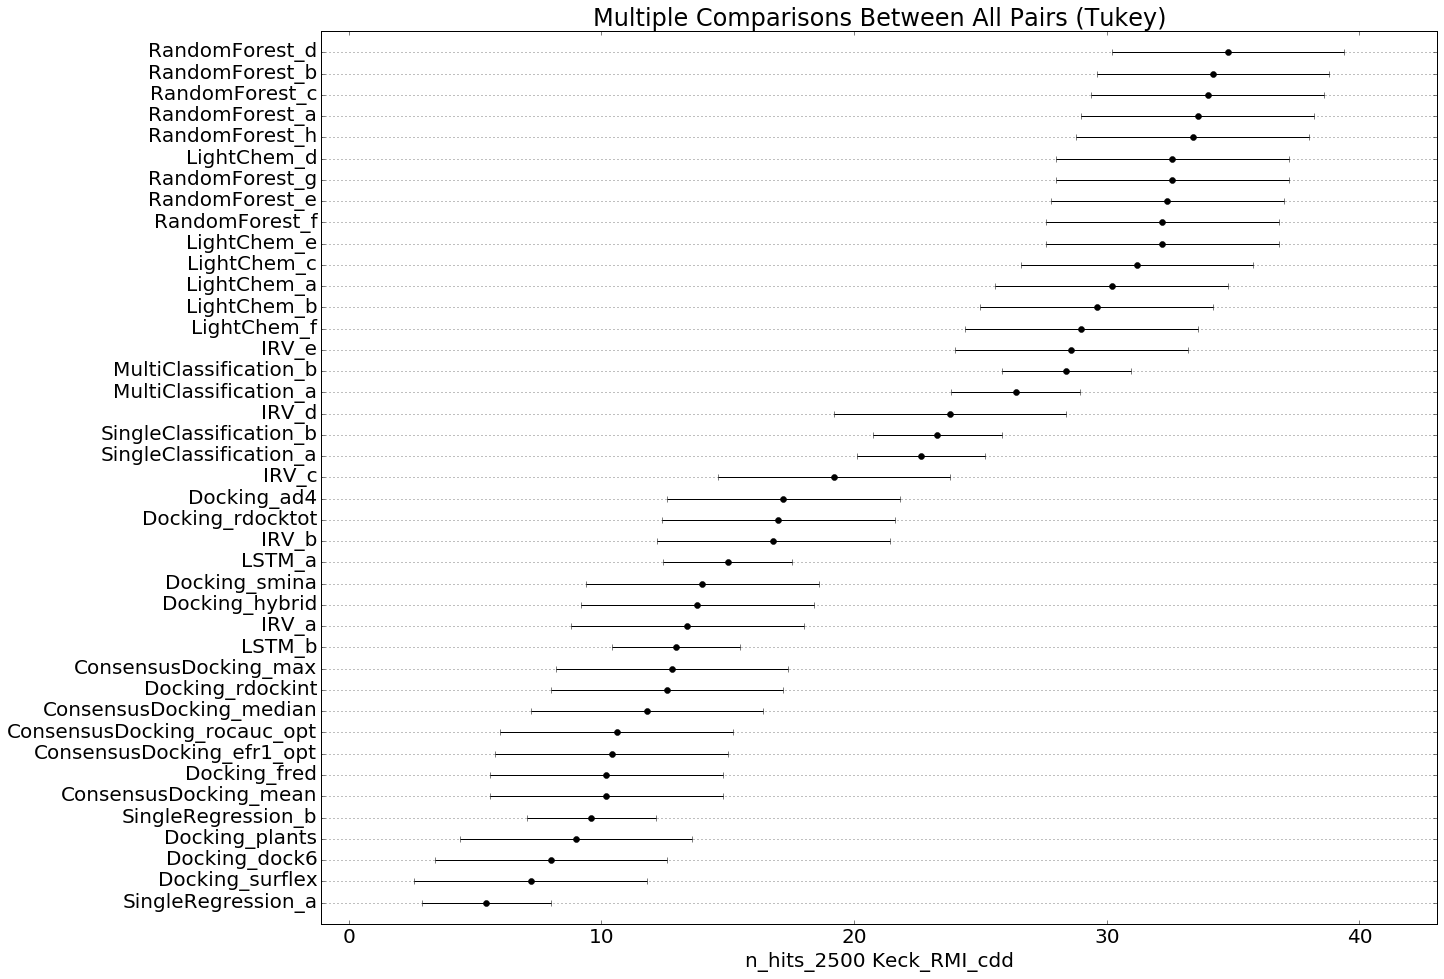

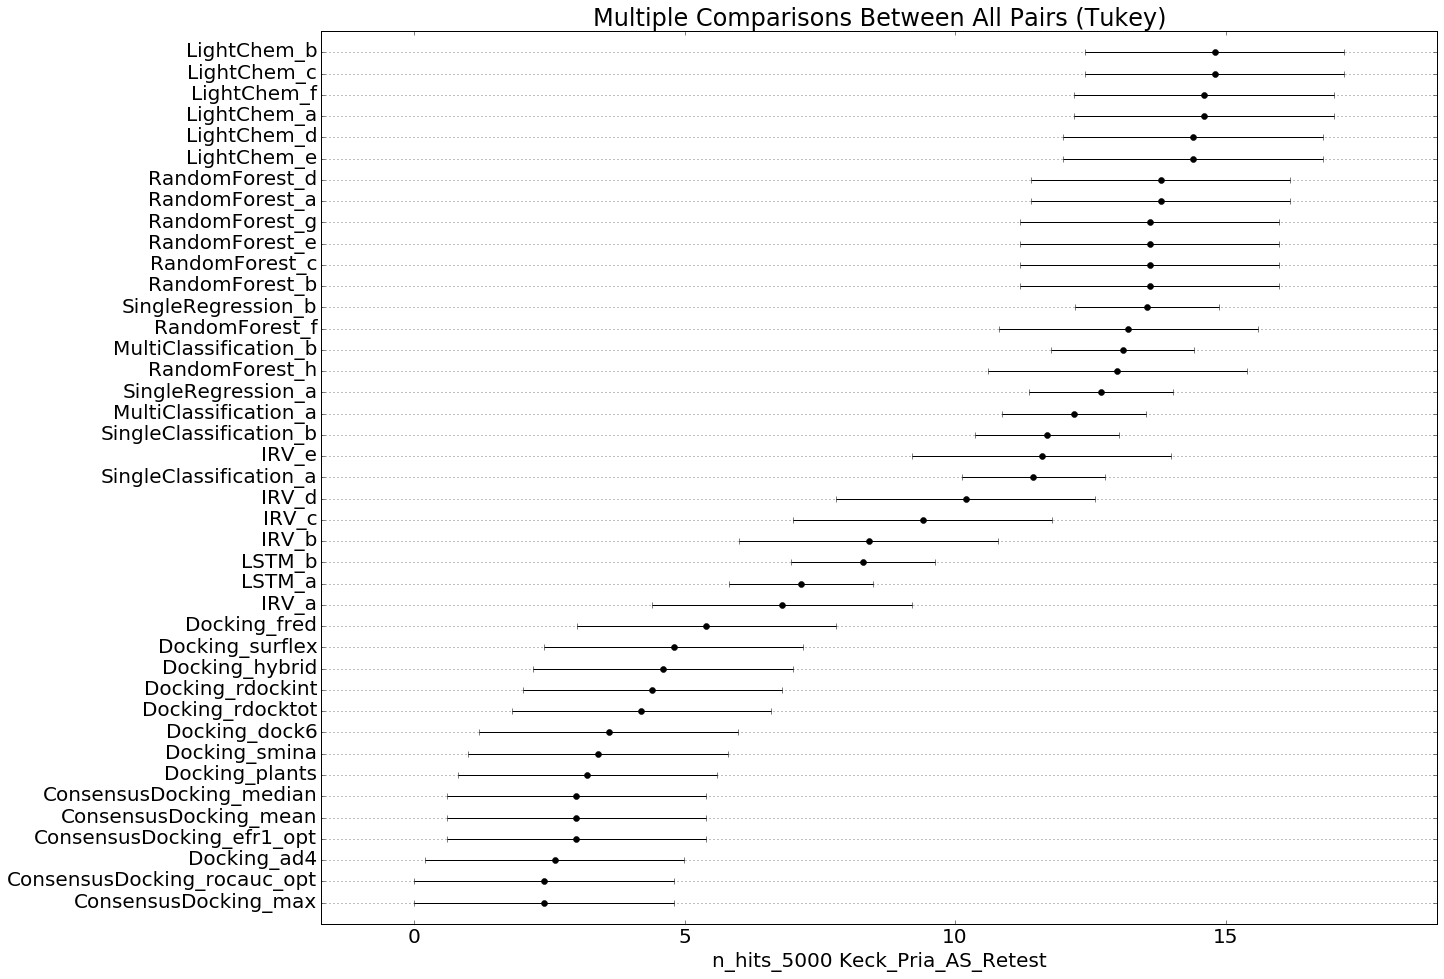

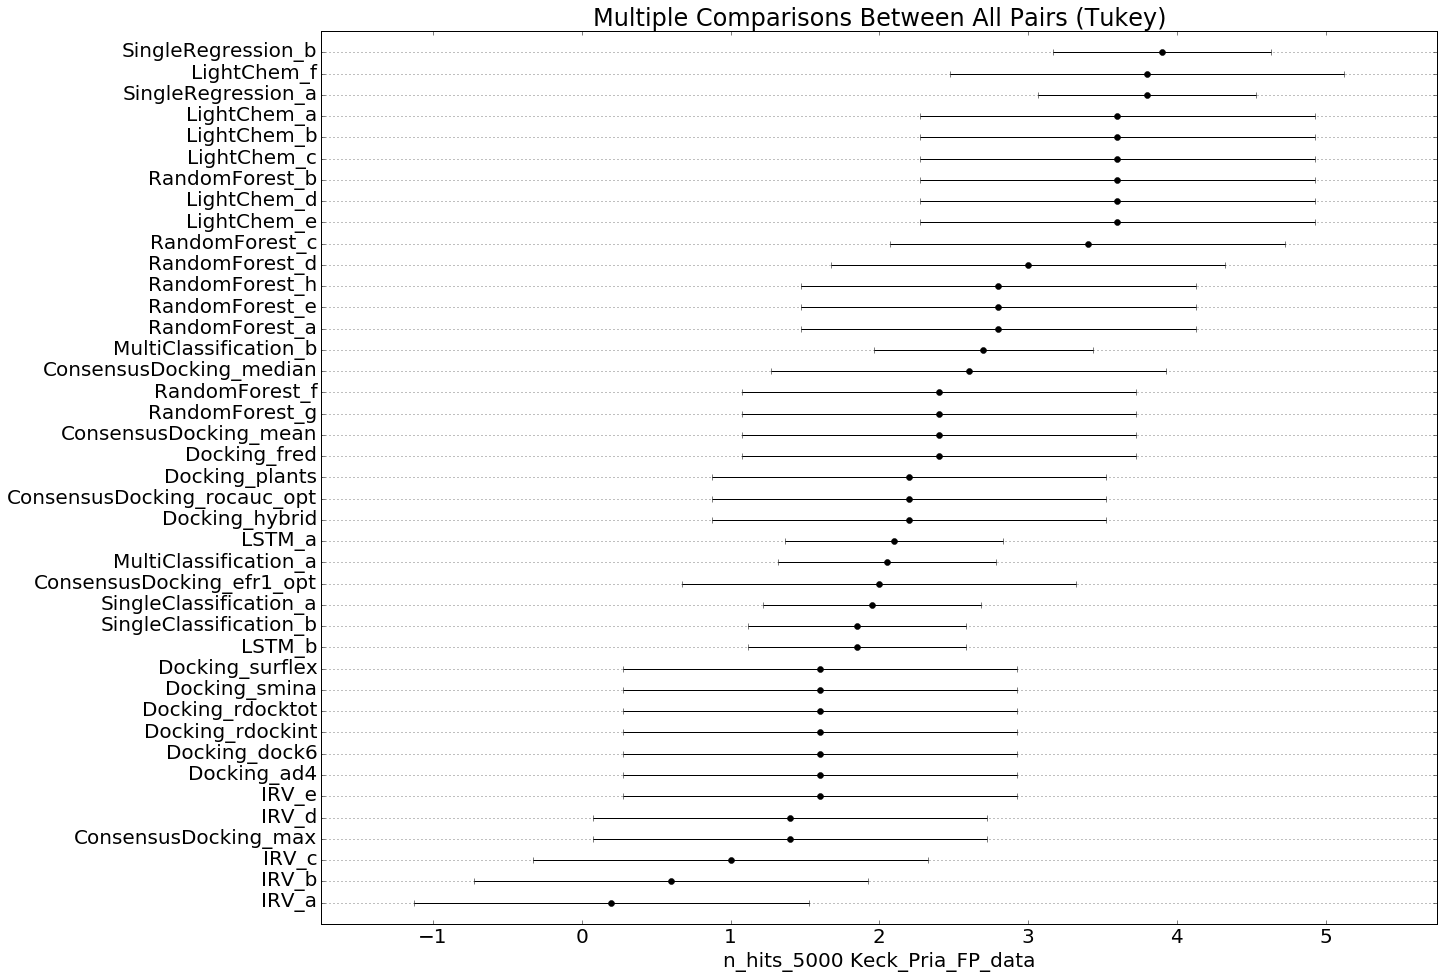

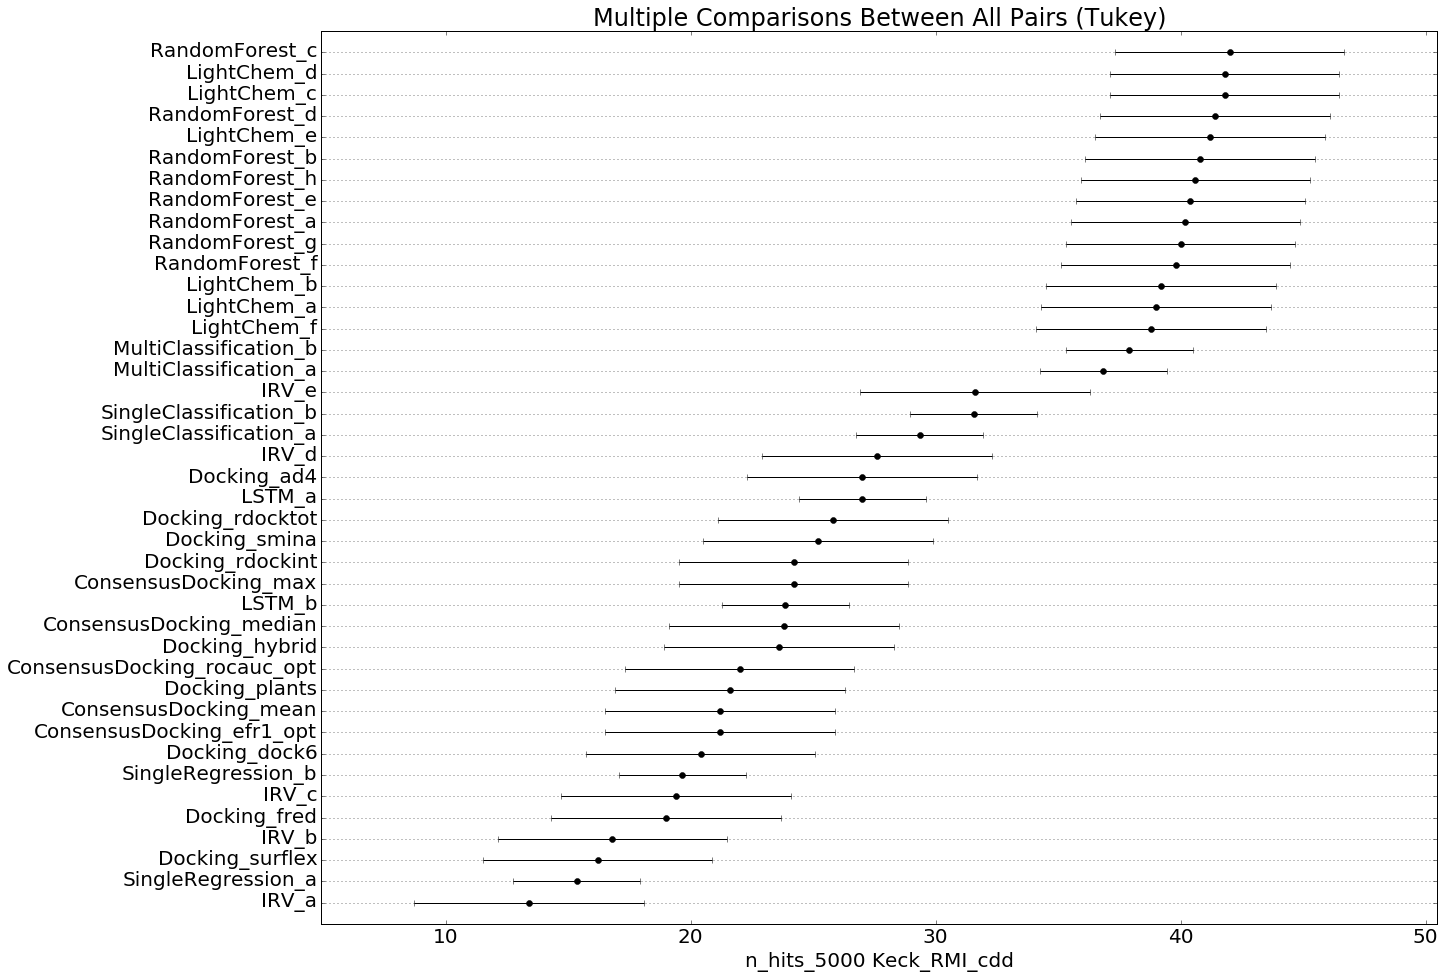

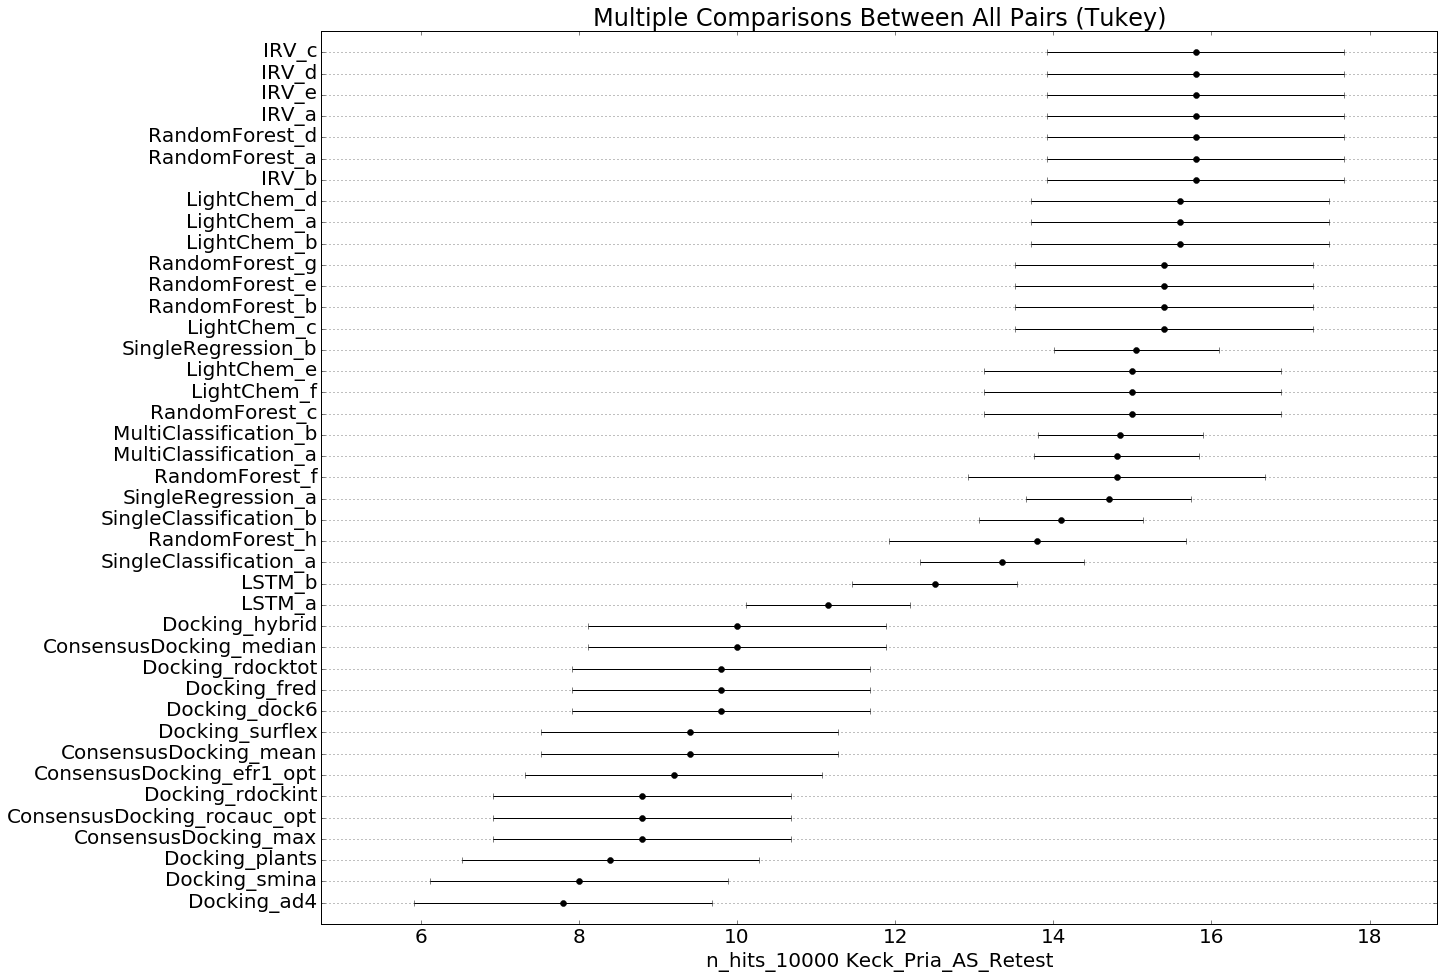

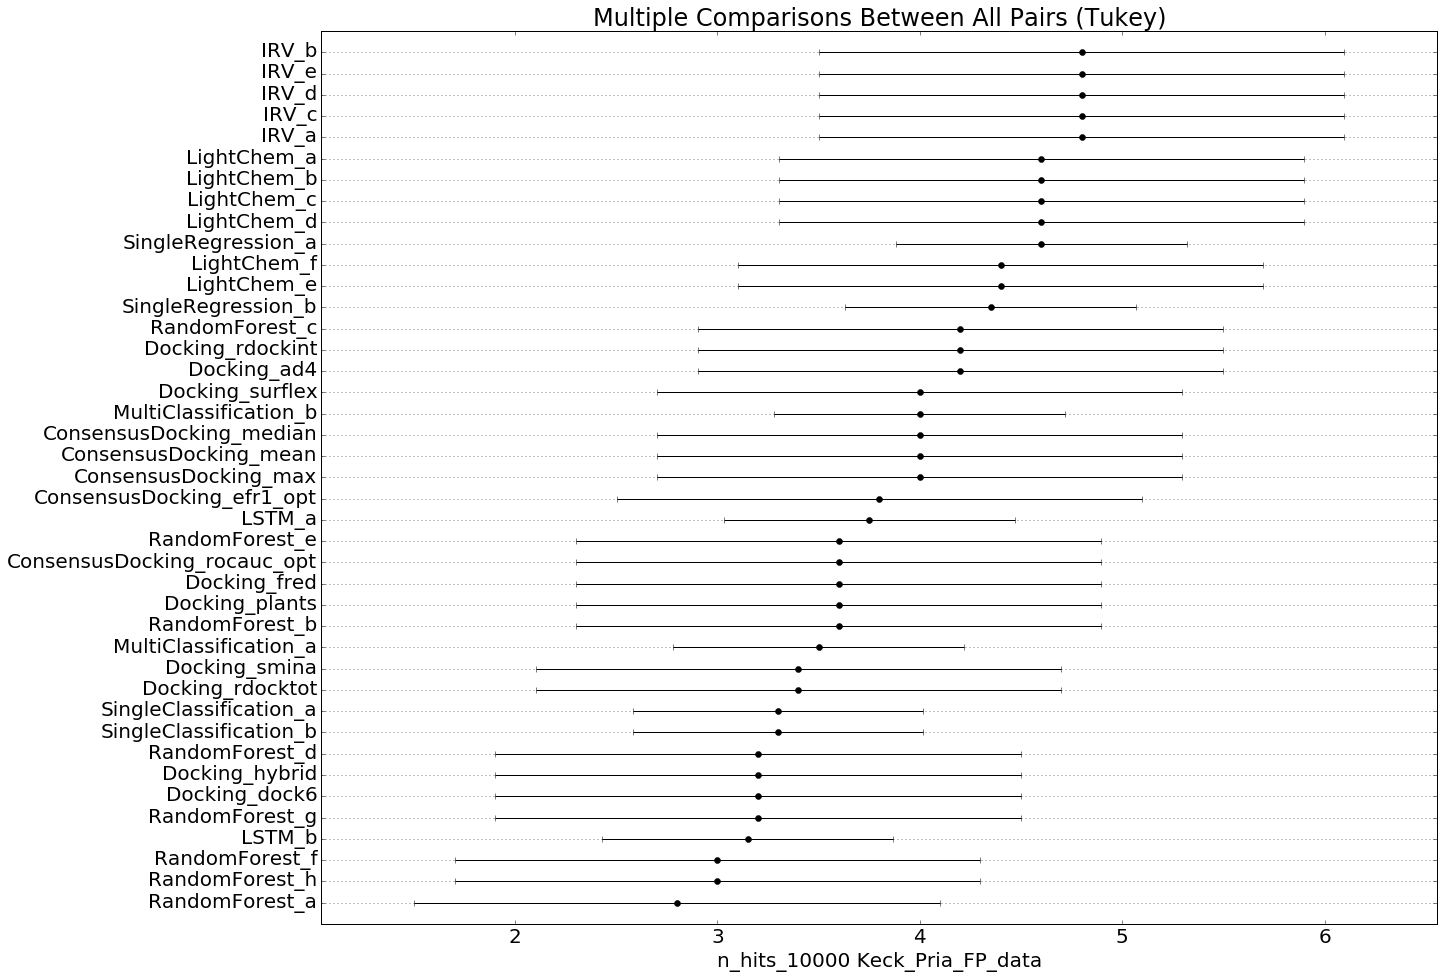

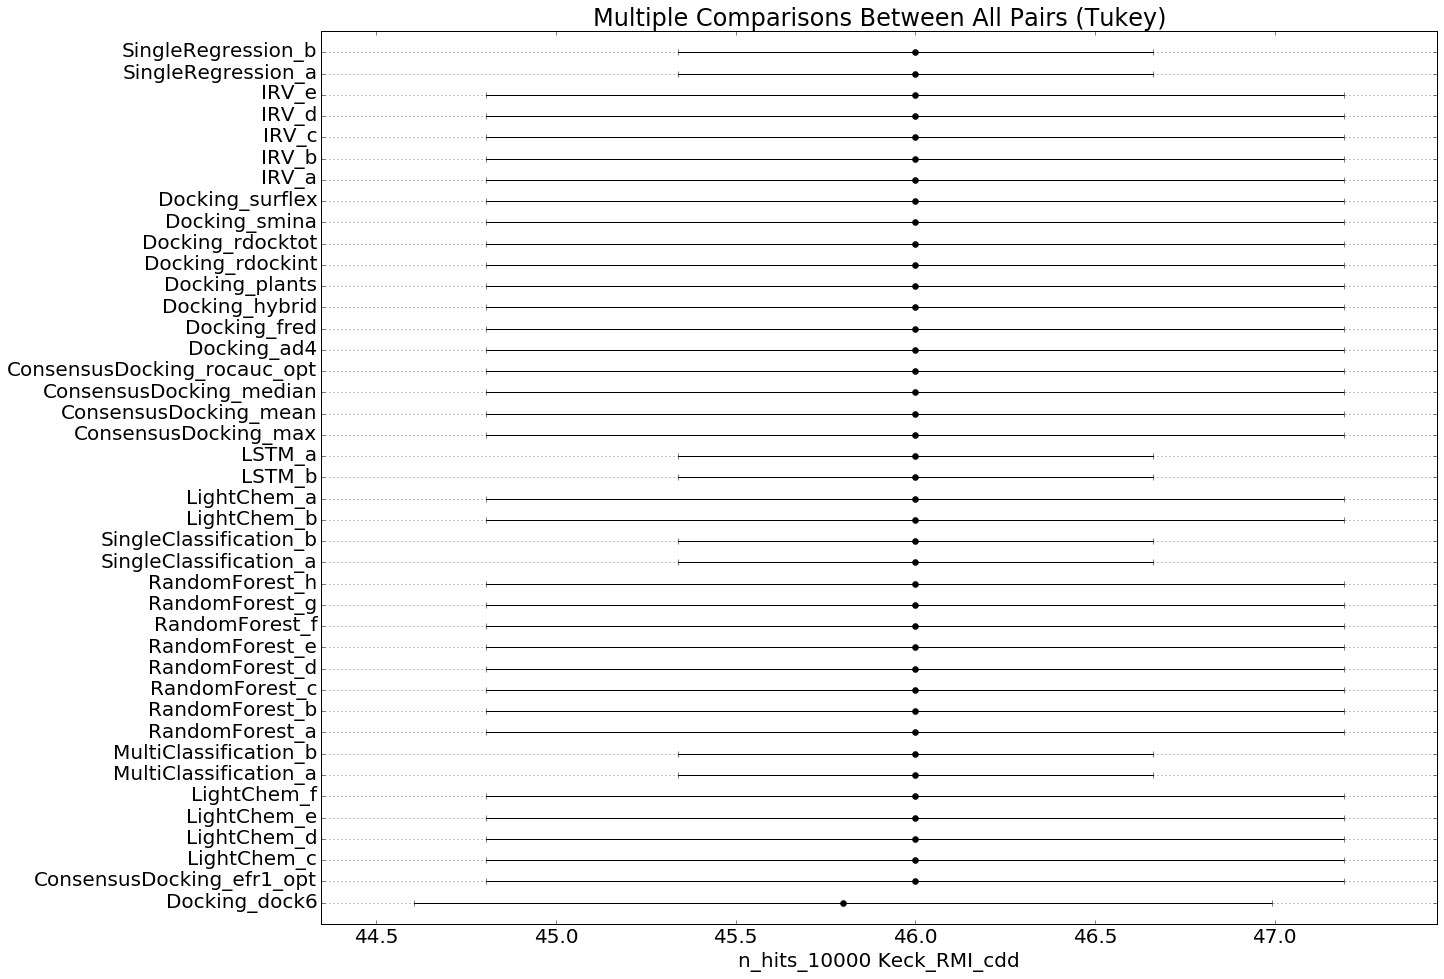

In [4]:
#plot uconf for all metrics
matplotlib.rcParams.update({'font.size': 20})
plot_uconf_simple(tukey_dict, metric_names, figsize=(20,16))

####  The confidence intervals are computed for the 'means' at the 0.05 significance using Tukey's Q critical value, so this confidence interval will capture the true-mean 95% of the time. If confidence intervals don't overlap, then we can conclude there is significance.

[1] Hochberg, Y., and A. C. Tamhane. Multiple Comparison Procedures.
           Hoboken, NJ: John Wiley & Sons, 1987.

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [5]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

ROC AUC Keck_Pria_AS_Retest          ROC AUC Keck_Pria_FP_data  \
0                    LightChem_a, 1.0            SingleRegression_b, 1.0   
1                    LightChem_b, 1.0            SingleRegression_a, 1.0   
2                    LightChem_d, 1.0                   LightChem_b, 3.0   
3             SingleRegression_b, 4.0                   LightChem_a, 4.0   
4                    LightChem_f, 4.0                   LightChem_f, 5.0   
5                    LightChem_c, 4.0                   LightChem_d, 5.0   
6                 RandomForest_c, 4.0                   LightChem_c, 7.0   
7                 RandomForest_b, 4.0                   LightChem_e, 7.0   
8                 RandomForest_a, 4.0         MultiClassification_b, 9.0   
9                    LightChem_e, 4.0               RandomForest_c, 10.0   
10                        IRV_d, 11.0               RandomForest_b, 10.0   
11                        IRV_e, 11.0               Docking_hybrid, 12.0   
12           SingleRegression_a, 11.0                        IRV_a, 12.0   
13        MultiClassification_b, 11.0               Docking_plants, 12.0   
14        MultiClassification_a, 11.0                 Docking_fred, 12.0   
15               RandomForest_d, 11.0                Docking_dock6, 12.0   
16               RandomForest_e, 11.0                  Docking_ad4, 12.0   
17               RandomForest_f, 11.0  ConsensusDocking_rocauc_opt, 12.0   
18               RandomForest_g, 11.0      ConsensusDocking_median, 12.0   
19               RandomForest_h, 11.0        ConsensusDocking_mean, 12.0   
20       SingleClassification_a, 11.0         ConsensusDocking_max, 12.0   
21       SingleClassification_b, 11.0             Docking_rdockint, 12.0   
22                        IRV_c, 11.0             Docking_rdocktot, 12.0   
23                        IRV_b, 24.0                Docking_smina, 12.0   
24                        IRV_a, 24.0              Docking_surflex, 12.0   
25                       LSTM_b, 26.0                       LSTM_b, 12.0   
26                       LSTM_a, 27.0                        IRV_b, 12.0   
27              Docking_surflex, 28.0                        IRV_c, 12.0   
28                Docking_smina, 28.0                        IRV_d, 12.0   
29             Docking_rdocktot, 28.0                        IRV_e, 12.0   
30             Docking_rdockint, 28.0                       LSTM_a, 12.0   
31               Docking_plants, 28.0        MultiClassification_a, 12.0   
32               Docking_hybrid, 28.0               RandomForest_a, 12.0   
33                 Docking_fred, 28.0               RandomForest_d, 12.0   
34                Docking_dock6, 28.0               RandomForest_e, 12.0   
35                  Docking_ad4, 28.0               RandomForest_f, 12.0   
36  ConsensusDocking_rocauc_opt, 28.0               RandomForest_g, 12.0   
37      ConsensusDocking_median, 28.0               RandomForest_h, 12.0   
38        ConsensusDocking_mean, 28.0       SingleClassification_a, 12.0   
39         ConsensusDocking_max, 28.0       SingleClassification_b, 12.0   
40    ConsensusDocking_efr1_opt, 28.0    ConsensusDocking_efr1_opt, 12.0   

                 ROC AUC Keck_RMI_cdd     BEDROC AUC Keck_Pria_AS_Retest  \
0                    LightChem_d, 1.0                   LightChem_b, 1.0   
1                 RandomForest_d, 1.0                   LightChem_d, 2.0   
2                    LightChem_e, 1.0                RandomForest_d, 3.0   
3                 RandomForest_b, 1.0                   LightChem_e, 3.0   
4                 RandomForest_c, 1.0                RandomForest_c, 3.0   
5                 RandomForest_a, 1.0                   LightChem_c, 3.0   
6                 RandomForest_h, 1.0                RandomForest_a, 7.0   
7                 RandomForest_f, 8.0                   LightChem_a, 7.0   
8                 RandomForest_e, 8.0                RandomForest_g, 9.0   
9                 RandomForest_g, 8.0                Rand

---
## Metrics Most Similar to N-Hits

In [15]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

n_hits_100 Keck_Pria_AS_Retest  \
0                         NEF_1 %   
1                       NEF_0.5 %   
2                         NEF_5 %   
3                      BEDROC AUC   
4                         NEF_2 %   
5                 PR auc.integral   
6                      NEF_0.15 %   
7                       NEF_0.1 %   
8               NEF_10 %, NEF AUC   
9                         ROC AUC   
10                       NEF_20 %   
11                                  

                         n_hits_100 Keck_Pria_FP_data  \
0   BEDROC AUC, NEF_0.15 %, NEF_0.5 %, NEF_1 %, NE...   
1                                    NEF_5 %, NEF AUC   
2                 ROC AUC, PR auc.integral, NEF_0.1 %   
3                                            NEF_20 %   
4                                                       
5                                                       
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      

         n_hits_100 Keck_RMI_cdd n_hits_250 Keck_Pria_AS_Retest  \
0                        NEF_1 %               NEF_1 %, NEF_2 %   
1                      NEF_0.5 %                     BEDROC AUC   
2   BEDROC AUC, NEF_2 %, NEF_5 %                        NEF_5 %   
3                PR auc.integral                       NEF_10 %   
4                     NEF_0.15 %                        NEF AUC   
5                      NEF_0.1 %                        ROC AUC   
6                        NEF AUC                      NEF_0.5 %   
7                       NEF_10 %                       NEF_20 %   
8                        ROC AUC                     NEF_0.15 %   
9                       NEF_20 %     PR auc.integral, NEF_0.1 %   
10                                                                
11                                                                

                n_hits_250 Keck_Pria_FP_data n_hits_250 Keck_RMI_cdd  \
0   BEDROC AUC, NEF_0.15 %, NEF_1 %, NEF_2 %                 NEF_2 %   
1                                  NEF_0.5 %              BEDROC AUC   
2                 PR auc.integral, NEF_0.1 %                 NEF_1 %   
3                          NEF_5 %, NEF_10 %                 NEF_5 %   
4                                    NEF AUC                NEF_10 %   
5                                    ROC AUC                 NEF AUC   
6                                   NEF_20 %         PR auc.integral   
7                                                          NEF_0.5 %   
8                                                         NEF_0.15 %   
9                                                            ROC AUC   
10                                                         NEF_0.1 %   
11                                                          NEF_20 %   

   n_hits_500 Keck_Pria_AS_Retest  \
0                         NEF_2 %   
1                         NEF_5 %   
2                      BEDROC AUC   
3                         NEF_1 %   
4               NEF_10 %, NEF AUC   
5                         ROC AUC   
6                        NEF_20 %   
7                       NEF_0.5 %   
8                      NEF_0.15 %   
9      PR auc.integral, NEF_0.1 %   
10                                  
11                                  

                         n_hits_500 Keck_Pria_FP_data  \
0   PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....   
1              ROC AUC, BEDROC AUC, NEF_5 %, NEF_20 %   
2                                   NEF_2 %, NEF_10 %   
3                                             NEF_1 %   
4                                                       
5                                                       
6                                                       
7                               

---
## Overlapping top 1 models over all metrics

In [7]:
overlapping_models

overlap_perc
SingleRegression_b      0.173913
LightChem_b             0.152174
LightChem_d             0.152174
RandomForest_c          0.097826
RandomForest_d          0.097826
LightChem_a             0.086957
RandomForest_a          0.065217
LightChem_e             0.043478
RandomForest_b          0.043478
SingleRegression_a      0.043478
RandomForest_g          0.032609
LightChem_c             0.010870

In [8]:
get_overlap(agg_comp_dict, N=5)

overlap_perc
RandomForest_c              0.500000
LightChem_b                 0.478261
RandomForest_d              0.467391
LightChem_d                 0.434783
LightChem_e                 0.391304
LightChem_a                 0.369565
LightChem_c                 0.271739
RandomForest_a              0.260870
RandomForest_b              0.239130
SingleRegression_b          0.239130
RandomForest_g              0.206522
SingleRegression_a          0.184783
LightChem_f                 0.163043
RandomForest_e              0.152174
RandomForest_f              0.152174
IRV_d                       0.108696
IRV_c                       0.097826
IRV_b                       0.043478
Docking_rdockint            0.043478
RandomForest_h              0.043478
IRV_e                       0.043478
LSTM_a                      0.032609
SingleClassification_b      0.032609
IRV_a                       0.021739
SingleClassification_a      0.021739

## Spearman's Rank-order correlation coefficient 

In [12]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

In [13]:
ordered_spearman_df

n_hits_100 Keck_Pria_AS_Retest n_hits_100 Keck_Pria_FP_data  \
0                         NEF_1 %                      NEF_1 %   
1                         NEF_2 %                      NEF_2 %   
2                         NEF_5 %                     NEF_10 %   
3                       NEF_0.5 %                      NEF_5 %   
4                      BEDROC AUC                    NEF_0.5 %   
5                         NEF AUC                   BEDROC AUC   
6                        NEF_10 %                      ROC AUC   
7                      NEF_0.15 %                      NEF AUC   
8                       NEF_0.1 %                     NEF_20 %   
9                         ROC AUC                    NEF_0.1 %   
10                PR auc.integral              PR auc.integral   
11                       NEF_20 %                   NEF_0.15 %   

   n_hits_100 Keck_RMI_cdd n_hits_250 Keck_Pria_AS_Retest  \
0                NEF_0.5 %                        NEF_2 %   
1                  NEF_1 %                        NEF_1 %   
2                  NEF_5 %                        NEF_5 %   
3                  NEF_2 %                     BEDROC AUC   
4          PR auc.integral                        NEF AUC   
5               BEDROC AUC                       NEF_10 %   
6               NEF_0.15 %                        ROC AUC   
7                NEF_0.1 %                      NEF_0.5 %   
8                 NEF_10 %                       NEF_20 %   
9                  NEF AUC                     NEF_0.15 %   
10                 ROC AUC                      NEF_0.1 %   
11                NEF_20 %                PR auc.integral   

   n_hits_250 Keck_Pria_FP_data n_hits_250 Keck_RMI_cdd  \
0                       NEF_2 %                 NEF_2 %   
1                       NEF_5 %                 NEF_5 %   
2                      NEF_10 %              BEDROC AUC   
3                       NEF_1 %                 NEF_1 %   
4                       NEF AUC                NEF_10 %   
5                       ROC AUC               NEF_0.5 %   
6                      NEF_20 %                 NEF AUC   
7                    BEDROC AUC         PR auc.integral   
8                     NEF_0.5 %              NEF_0.15 %   
9                     NEF_0.1 %                 ROC AUC   
10              PR auc.integral               NEF_0.1 %   
11                   NEF_0.15 %                NEF_20 %   

   n_hits_500 Keck_Pria_AS_Retest n_hits_500 Keck_Pria_FP_data  \
0                         NEF_5 %                      NEF_2 %   
1                         NEF_2 %                      NEF_5 %   
2                      BEDROC AUC                     NEF_10 %   
3                         NEF AUC                      NEF AUC   
4                         NEF_1 %                     NEF_20 %   
5                        NEF_10 %                      ROC AUC   
6                         ROC AUC                   BEDROC AUC   
7                        NEF_20 %                      NEF_1 %   
8                       NEF_0.5 %                    NEF_0.5 %   
9                      NEF_0.15 %                    NEF_0.1 %   
10                      NEF_0.1 %              PR auc.integral   
11                PR auc.integral                   NEF_0.15 %   

   n_hits_500 Keck_RMI_cdd n_hits_1000 Keck_Pria_AS_Retest  \
0                  NEF_5 %                        NEF_10 %   
1                  NEF_2 %                         NEF AUC   
2               BEDROC AUC                      BEDROC AUC   
3                  NEF AUC                         NEF_5 %   
4                 NEF_10 %                         ROC AUC   
5                  NEF_1 %                         NEF_2 %   
6          PR auc.integral                         NEF_1 %   
7                NEF_0.5 %                        NEF_20 %   
8               NEF_0.15 %                       NEF_0.5 %   
9                  ROC AUC                      NEF_0.15 %   
10                NEF_20 %               

In [14]:
spearman_df

n_hits_100 Keck_Pria_AS_Retest  n_hits_100 Keck_Pria_FP_data  \
ROC AUC                                0.831730                      0.553213   
BEDROC AUC                             0.930293                      0.561477   
PR auc.integral                        0.815150                     -0.044426   
NEF_0.1 %                              0.863134                     -0.044426   
NEF_0.15 %                             0.877400                           NaN   
NEF_0.5 %                              0.942528                      0.562731   
NEF_1 %                                0.971646                      0.793781   
NEF_2 %                                0.948420                      0.682325   
NEF_5 %                                0.944130                      0.595833   
NEF_10 %                               0.896717                      0.601550   
NEF_20 %                               0.778066                      0.517982   
NEF AUC                                0.913103                      0.533217   

                 n_hits_100 Keck_RMI_cdd  n_hits_250 Keck_Pria_AS_Retest  \
ROC AUC                         0.860970                        0.902841   
BEDROC AUC                      0.939253                        0.974639   
PR auc.integral                 0.942532                        0.680402   
NEF_0.1 %                       0.907483                        0.737758   
NEF_0.15 %                      0.915529                        0.772443   
NEF_0.5 %                       0.974998                        0.896816   
NEF_1 %                         0.956003                        0.983986   
NEF_2 %                         0.945357                        0.994037   
NEF_5 %                         0.953865                        0.976107   
NEF_10 %                        0.905868                        0.946517   
NEF_20 %                        0.816564                        0.859772   
NEF AUC                         0.905735                        0.957223   

                 n_hits_250 Keck_Pria_FP_data  n_hits_250 Keck_RMI_cdd  \
ROC AUC                              0.821693                 0.890481   
BEDROC AUC                           0.811617                 0.961329   
PR auc.integral                      0.346659                 0.921973   
NEF_0.1 %                            0.346659                 0.865616   
NEF_0.15 %                                NaN                 0.891636   
NEF_0.5 %                            0.367051                 0.930622   
NEF_1 %                              0.858718                 0.961110   
NEF_2 %                              0.999594                 0.992007   
NEF_5 %                              0.893076                 0.967542   
NEF_10 %                             0.891244                 0.935995   
NEF_20 %                             0.815854                 0.838271   
NEF AUC                              0.828560                 0.927667   

                 n_hits_500 Keck_Pria_AS_Retest  n_hits_500 Keck_Pria_FP_data  \
ROC AUC                                0.918501                      0.774566   
BEDROC AUC                             0.980684                      0.761624   
PR auc.integral                        0.642791                      0.424050   
NEF_0.1 %                              0.706945                      0.424050   
NEF_0.15 %                             0.746047                           NaN   
NEF_0.5 %                              0.864332                      0.424050   
NEF_1 %                                0.956630                      0.734450   
NEF_2 %                                0.983297                      0.932767   
NEF_5 %                                0.984596                      0.845302   
NEF_10 %                               0.954613                      0.829984   
NEF_20 %                               0.883622                      0.786559   
NEF AUC                                